# H-1B Visa Applications 2010-2018 Insights
## Eimis Pacheco
<img src="http://professional-guru.com/wp-content/uploads/2017/12/AAEAAQAAAAAAAAadAAAAJGYzNjcwY2E5LWZiZGMtNDlhYi1iMDYwLTYyNDk1NDA2YmIyOA-640x430.jpg" alt="drawing" width="200"/> 

**H-1B Visa Applications DataSets taken from Enigma Public repository (https://public.enigma.com/)**

The Foreign Labor Certification Office of the United States Department of Labor publishes annual data on various visa applications, including the H-1B. The H-1B is a nonimmigrant visa that allows U.S. companies and organizations to temporarily employ foreign workers in specialized occupations. The data topic includes personal data of the employer applying for the temporary work certification and the function itself.

The objective of the analysis and its different visualizations would be to identify a trend in terms of the most sought-after and most likely professions to be successful in being granted a visa. Also to investigate which types of industries H-1B visa workers depend on.

It is also intended to present which states have the most visa applications according to the professions.

It is intended to answer questions such as (to name just a few):

What are the top employers that file the most H-1B visa applications?

Discover if most H-1B visa applications correspond to IT jobs throughout the years (Top 10)

The states that present the most H-1B visa applications in the last 10 years

Find out if the change in the United States government administration impacted the approvals of H-1B visa applications.

The ultimate goal of this project is to go through the entire Data Science project cycle ending with a machine-learning algorithm of classification to determine whether or not a visa will be approved. Therefore, it is necessary to clean the data in order to improve the performance of the algorithms on that data.


### Data source description:

The data was extracted from the public data repository "Enigma Public", since unlike the datasets contained on the kaggle page, the data here is really raw data, they have more information, they are constantly updated, they are very dirty data , which will perfectly serve the purpose of the project, which is to demonstrate the skills acquired in terms of cleaning and data transformation.

In total there are 9 files in csv format that are intended to be joined, which have different numbers of columns, the format of these files has changed over time, so there are several unification jobs to do to these files.


### Number of observations

4,617,502 among all files in the repository
     
     
### Number of attributes (these are some of the most significant data for the project.)

22 columns

### Attribute content

**case_number**

Unique identifier assigned to each request submitted for processing at the National Processing Center.
 
**case_status**

Status associated with the last significant event or decision. Valid values include "Certificate", "Certificate Retired", "Denied" and "Retired"
         
**case_submitted**

Date and time the request was submitted
 
   
**decision_date**

Date the Chicago National Processing Center recorded the last major event or decision
      
**visa_class**

Indicates the type of temporary request submitted for processing.
 
**employment_start_date**

Employment start date.
 
**employment_end_date**

Employment end date.
 
**employer_name**

Name of the employer submitting the application for employment status.
 
**employer_address**

Employee address
 
**employer_city**

Employer City
        
**employer_state**

Employer status
 
**employer_postal_code**

Employer Zip Code
 
**soc_code**

Occupational code associated with the job being applied for for a temporary work condition, as classified by the Standard Occupational Classification System (SOC)
                
**soc_name**

Job name associated with the SOC Code.
             
**job_title**

Job title
          
**wage_rate_of_pay_from**

Salary proposed by the employer
 
**wage_rate_of_pay_to**

Payment wage rate a
 
**pw_unit_of_pay**

Payment unit. Valid values include "Hour", "Week", "Biweekly", "Month", or "Year".
    
**worksite_city**

city of the workplace

**worksite_state**

job site status
 
**pw_source**

Predominant source of salary. Variables include "OES", "CBA", "DBA", "SCA" or "Other".
 
**pw_source_year**

Year in which the reference salary was taken
     


**Let's do the entire Data Science Project Cycle**
<img src="https://ep-images.s3-us-west-1.amazonaws.com/WhatDataScientistDoes.JPG" alt="drawing" width="500"/>
**We will mostly focus our attention on the certified visa applications and TI Jobs, especially Data related jobs.**
<br>
**We will obtain useful information, discover trends, and top ten rankings.**

## First Step - Let's Import all the libraries we might need to handle our datasets

In [1]:
%matplotlib inline
import io
import os
import re
import random
import requests
import numpy as np
import pandas as pd
import statistics as stat 
import matplotlib.pyplot as plt
import seaborn as sns

#Maximum 10 observations will be shown each time a result is displayed
pd.options.display.max_rows = 10
#Display all the columns in the datasets, we will need to see all of them in order to compare one with each other.
pd.set_option('display.max_columns', None)

## Second Step - Let's Import all our DataSets
### <span style="color:#063e99">Data Acquition Phase</span>

In [2]:
%%time
H1BVisa2010_df = pd.read_csv("D:\VIU\Project\Originals\H-1BVisaApplications-2010.csv")
H1BVisa2011_df = pd.read_csv("D:\VIU\Project\Originals\H-1BVisaApplications-2011.csv")
H1BVisa2012_df = pd.read_csv("D:\VIU\Project\Originals\H-1BVisaApplications-2012.csv")
H1BVisa2013_df = pd.read_csv("D:\VIU\Project\Originals\H-1BVisaApplications-2013.csv")
H1BVisa2014_df = pd.read_csv("D:\VIU\Project\Originals\H-1BVisaApplications-2014.csv")
H1BVisa2015_df = pd.read_csv("D:\VIU\Project\Originals\H-1BVisaApplications-2015.csv")
H1BVisa2016_df = pd.read_csv("D:\VIU\Project\Originals\H-1BVisaApplications-2016.csv")
H1BVisa2017_df = pd.read_csv("D:\VIU\Project\Originals\H-1BVisaApplications-2017.csv")
H1BVisa2018_df = pd.read_csv("D:\VIU\Project\Originals\H-1BVisaApplications-2018.csv")

<string>:2: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
<string>:2: DtypeWarning: Columns (10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 1min 37s


## Third Step - Let's prepare our Datasets
### <span style="color:#063e99">Data Preparation Phase</span>
<img src="https://ep-images.s3-us-west-1.amazonaws.com/Data+Preparation.JPG" alt="drawing" width="500"/>
**First, we are going to find out if we can directly concat our datasets or if we need to do previous steps before joining them into a single dataset**

In [3]:
print('Number of colummns in each dataset')

dfs_column_number = {'H1BVisa2010_df': H1BVisa2010_df.shape[1],
                     'H1BVisa2011_df': H1BVisa2011_df.shape[1],
                     'H1BVisa2012_df': H1BVisa2012_df.shape[1],
                     'H1BVisa2013_df': H1BVisa2013_df.shape[1],
                     'H1BVisa2014_df': H1BVisa2014_df.shape[1],
                     'H1BVisa2015_df': H1BVisa2015_df.shape[1],
                     'H1BVisa2016_df': H1BVisa2016_df.shape[1],
                     'H1BVisa2017_df': H1BVisa2017_df.shape[1],
                     'H1BVisa2018_df': H1BVisa2018_df.shape[1]}

dfs_column_number

Number of colummns in each dataset


{'H1BVisa2010_df': 36,
 'H1BVisa2011_df': 36,
 'H1BVisa2012_df': 36,
 'H1BVisa2013_df': 36,
 'H1BVisa2014_df': 36,
 'H1BVisa2015_df': 41,
 'H1BVisa2016_df': 41,
 'H1BVisa2017_df': 52,
 'H1BVisa2018_df': 52}

**We can see that the datasets have different number of columns, so we need to investigate more about the columns that they share**

In [4]:
df_column_names  = pd.DataFrame([list(H1BVisa2010_df.columns),
                                  list(H1BVisa2011_df.columns),
                                  list(H1BVisa2012_df.columns),
                                  list(H1BVisa2013_df.columns),
                                  list(H1BVisa2014_df.columns),
                                  list(H1BVisa2015_df.columns),
                                  list(H1BVisa2016_df.columns),
                                  list(H1BVisa2017_df.columns),
                                  list(H1BVisa2018_df.columns)],
index=['H1BVisa2010_df', 'H1BVisa2011_df', 'H1BVisa2012_df', 'H1BVisa2013_df', 'H1BVisa2014_df', 
       'H1BVisa2015_df', 'H1BVisa2016_df', 'H1BVisa2017_df', 'H1BVisa2018_df'])

df_column_names

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
H1BVisa2010_df,lca_case_number,status,lca_case_submit,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,lca_case_employer_state,lca_case_employer_postal_code,lca_case_soc_code,lca_case_soc_name,lca_case_job_title,lca_case_wage_rate_from,lca_case_wage_rate_to,lca_case_wage_rate_unit,full_time_pos,total_workers,lca_case_workloc1_city,lca_case_workloc1_state,pw_1,pw_unit_1,pw_source_1,other_wage_source_1,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code,decision_date,serialid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
H1BVisa2011_df,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,lca_case_employer_state,lca_case_employer_postal_code,lca_case_soc_code,lca_case_soc_name,lca_case_job_title,lca_case_wage_rate_from,lca_case_wage_rate_to,lca_case_wage_rate_unit,full_time_pos,total_workers,lca_case_workloc1_city,lca_case_workloc1_state,pw_1,pw_unit_1,pw_source_1,other_wage_source_1,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code,serialid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
H1BVisa2012_df,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,lca_case_employer_state,lca_case_employer_postal_code,lca_case_soc_code,lca_case_soc_name,lca_case_job_title,lca_case_wage_rate_from,lca_case_wage_rate_to,lca_case_wage_rate_unit,full_time_pos,total_workers,lca_case_workloc1_city,lca_case_workloc1_state,pw_1,pw_unit_1,pw_source_1,other_wage_source_1,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code,serialid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
H1BVisa2013_df,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,lca_case_employer_state,lca_case_employer_postal_code,lca_case_soc_code,lca_case_soc_name,lca_case_job_title,lca_case_wage_rate_from,lca_case_wage_rate_to,lca_case_wage_rate_unit,full_time_pos,total_workers,lca_case_workloc1_city,lca_case_workloc1_state,pw_1,pw_unit_1,pw_source_1,other_wage_source_1,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code,serialid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
H1BVisa2014_df,lca_case_number,status,lca_case_submit,decision_date,visa_class,lca_case_employment_start_date,lca_case_employment_end_date,lca_case_employer_name,lca_case_employer_address,lca_case_employer_city,lca_case_employer_state,lca_case_employer_postal_code,lca_case_soc_code,lca_case_soc_name,lca_case_job_title,lca_case_wage_rate_from,lca_case_wage_rate_to,lca_case_wage_rate_unit,full_time_pos,total_workers,lca_case_workloc1_city,lca_case_workloc1_state,pw_1,pw_unit_1,pw_source_1,other_wage_source_1,yr_source_pub_1,lca_case_workloc2_city,lca_case_workloc2_state,pw_2,pw_unit_2,pw_source_2,other_wage_source_2,yr_source_pub_2,lca_case_naics_code,serialid,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
H1BVisa2015_df,case_number,case_status,case_submitted,decision_date,visa_class,employment_start_date,employment_end_da

**We have deleted visa class column because we already know that we are analyzing H-1B Visas**
<br>
**We are taking H1BVisa2010_df as the based dataframe, as this is one with the least number of columns**

In [5]:
#We are selecting the column names that they share
H1BVisa2010_df = H1BVisa2010_df[['lca_case_number', 'status', 'lca_case_submit', 'decision_date',#4
                                   'lca_case_employment_start_date', 'lca_case_employment_end_date',#6
                                   'lca_case_employer_name', 'lca_case_employer_address',#8
                                   'lca_case_employer_city', 'lca_case_employer_state',#10
                                   'lca_case_employer_postal_code', 'lca_case_soc_code',#12
                                   'lca_case_soc_name', 'lca_case_job_title','lca_case_wage_rate_from',#15
                                   'lca_case_wage_rate_to', 'lca_case_wage_rate_unit', 'full_time_pos',#18
                                   'total_workers', 'lca_case_workloc1_city', 'lca_case_workloc1_state',#21
                                   'pw_1', 'pw_unit_1', 'pw_source_1', 'other_wage_source_1',#25
                                   'yr_source_pub_1']]#26

print('10')
H1BVisa2011_df = H1BVisa2011_df[['lca_case_number', 'status', 'lca_case_submit', 'decision_date',#4
                                   'lca_case_employment_start_date', 'lca_case_employment_end_date',#6
                                   'lca_case_employer_name', 'lca_case_employer_address',#8
                                   'lca_case_employer_city', 'lca_case_employer_state',#10
                                   'lca_case_employer_postal_code', 'lca_case_soc_code',#12
                                   'lca_case_soc_name', 'lca_case_job_title','lca_case_wage_rate_from',#15
                                   'lca_case_wage_rate_to', 'lca_case_wage_rate_unit', 'full_time_pos',#18
                                   'total_workers', 'lca_case_workloc1_city', 'lca_case_workloc1_state',#21
                                   'pw_1', 'pw_unit_1', 'pw_source_1', 'other_wage_source_1',#25
                                   'yr_source_pub_1']]#26

print('11')
H1BVisa2012_df = H1BVisa2012_df[['lca_case_number', 'status', 'lca_case_submit', 'decision_date',#4
                                   'lca_case_employment_start_date', 'lca_case_employment_end_date',#6
                                   'lca_case_employer_name', 'lca_case_employer_address',#8
                                   'lca_case_employer_city', 'lca_case_employer_state',#10
                                   'lca_case_employer_postal_code', 'lca_case_soc_code',#12
                                   'lca_case_soc_name', 'lca_case_job_title','lca_case_wage_rate_from',#15
                                   'lca_case_wage_rate_to', 'lca_case_wage_rate_unit', 'full_time_pos',#18
                                   'total_workers', 'lca_case_workloc1_city', 'lca_case_workloc1_state',#21
                                   'pw_1', 'pw_unit_1', 'pw_source_1', 'other_wage_source_1',#25
                                   'yr_source_pub_1']]#26

H1BVisa2013_df = H1BVisa2013_df[['lca_case_number', 'status', 'lca_case_submit', 'decision_date',#4
                                   'lca_case_employment_start_date', 'lca_case_employment_end_date',#6
                                   'lca_case_employer_name', 'lca_case_employer_address',#8
                                   'lca_case_employer_city', 'lca_case_employer_state',#10
                                   'lca_case_employer_postal_code', 'lca_case_soc_code',#12
                                   'lca_case_soc_name', 'lca_case_job_title','lca_case_wage_rate_from',#15
                                   'lca_case_wage_rate_to', 'lca_case_wage_rate_unit', 'full_time_pos',#18
                                   'total_workers', 'lca_case_workloc1_city', 'lca_case_workloc1_state',#21
                                   'pw_1', 'pw_unit_1', 'pw_source_1', 'other_wage_source_1',#25
                                   'yr_source_pub_1']]#26
print('13')
H1BVisa2014_df = H1BVisa2014_df[['lca_case_number', 'status', 'lca_case_submit', 'decision_date',#4
                                   'lca_case_employment_start_date', 'lca_case_employment_end_date',#6
                                   'lca_case_employer_name', 'lca_case_employer_address',#8
                                   'lca_case_employer_city', 'lca_case_employer_state',#10
                                   'lca_case_employer_postal_code', 'lca_case_soc_code',#12
                                   'lca_case_soc_name', 'lca_case_job_title','lca_case_wage_rate_from',#15b
                                   'lca_case_wage_rate_to', 'lca_case_wage_rate_unit', 'full_time_pos',#18
                                   'total_workers', 'lca_case_workloc1_city', 'lca_case_workloc1_state',#21
                                   'pw_1', 'pw_unit_1', 'pw_source_1', 'other_wage_source_1',#25
                                   'yr_source_pub_1']]#26

print('14')
print('Something different have to be done with H1BVisa2015_df, as this has lca_case_wage_rate_from and lca_case_wage_rate_to columns')
print('in just a column called wage_rate_of_pay')
print('15')

#Notice that I have used 'wage_rate_of_pay_from','pw_unit_of_pay' columns in the following Datasets to match with 
#'pw_1', 'pw_unit_1'columns from the previous Datasets
H1BVisa2016_df = H1BVisa2016_df[['case_number', 'case_status', 'case_submitted', 'decision_date',#4
                                   'employment_start_date', 'employment_end_date',#6
                                   'employer_name', 'employer_address', #8
                                   'employer_city', 'employer_state',#10
                                   'employer_postal_code', 'soc_code', #12
                                   'soc_name','job_title','wage_rate_of_pay_from',#15
                                   'wage_rate_of_pay_to', 'wage_unit_of_pay', 'full_time_position',#18
                                   'total_workers', 'worksite_city', 'worksite_state',#21
                                   'wage_rate_of_pay_from','pw_unit_of_pay','pw_wage_source','pw_wage_source_other',#25
                                   'pw_wage_source_year']]#26
print('16')
H1BVisa2017_df = H1BVisa2017_df[['case_number', 'case_status', 'case_submitted', 'decision_date',#4
                                   'employment_start_date', 'employment_end_date',#6
                                   'employer_name', 'employer_address', #8
                                   'employer_city', 'employer_state',#10
                                   'employer_postal_code', 'soc_code', #12
                                   'soc_name','job_title','wage_rate_of_pay_from',#15
                                   'wage_rate_of_pay_from', 'wage_unit_of_pay', 'full_time_position',#18
                                   'total_workers', 'worksite_city', 'worksite_state',#21
                                   'wage_rate_of_pay_from','pw_unit_of_pay','pw_source','pw_source_other',#25
                                   'pw_source_year']]#26
print('17')
H1BVisa2018_df = H1BVisa2018_df[['case_number', 'case_status', 'case_submitted', 'decision_date',#4
                                   'employment_start_date', 'employment_end_date',#6
                                   'employer_name', 'employer_address', #8
                                   'employer_city', 'employer_state',#10
                                   'employer_postal_code', 'soc_code', #12
                                   'soc_name','job_title','wage_rate_of_pay_from',#15
                                   'wage_rate_of_pay_from', 'wage_unit_of_pay', 'full_time_position',#18
                                   'total_workers', 'worksite_city', 'worksite_state',#21
                                   'wage_rate_of_pay_from','pw_unit_of_pay','pw_source','pw_source_other',#25
                                   'pw_source_year']]#26
print('18')

10
11
13
14
Something different have to be done with H1BVisa2015_df, as this has lca_case_wage_rate_from and lca_case_wage_rate_to columns
in just a column called wage_rate_of_pay
15
16
17
18


**Now we are going to built the H1BVisa2015_df dataframe by doing the following activities**

In [6]:
#Use an auxiliary dataframe for some of the columns
H1BVisa2015_dfaux1 = H1BVisa2015_df[['case_number', 'case_status', 'case_submitted', 'decision_date',#4
                                       'employment_start_date', 'employment_end_date',#6
                                       'employer_name', 'employer_address1', #8
                                       'employer_city', 'employer_state',#10
                                       'employer_postal_code', 'soc_code', #12
                                       'soc_name','job_title']] #14

In [7]:
#Use another auxiliary dataframe for getting lca_case_wage_rate_from and lca_case_wage_rate_to colummns
H1BVisa2015_dfaux2 = pd.DataFrame(list(H1BVisa2015_df['wage_rate_of_pay'].str.split('-').values))
H1BVisa2015_dfaux2.head()

,0,1,2
0,72000,77000,None
1,69389,,None
2,83661,,None
3,98000,,None
4,114840,,None


In [8]:
#We need to get rid of the last column
H1BVisa2015_dfaux2 = H1BVisa2015_dfaux2[[0, 1]]
#and rename the column names
H1BVisa2015_dfaux2.columns = ['lca_case_wage_rate_from', 'lca_case_wage_rate_to']
print(H1BVisa2015_dfaux2.head())
print(H1BVisa2015_dfaux2.shape)

  lca_case_wage_rate_from lca_case_wage_rate_to
0                  72000                  77000
1                  69389                       
2                  83661                       
3                  98000                       
4                 114840                       
(618804, 2)


In [9]:
#Now we will concatenate DataFrames by column, we can specify the axis parameter as 1 
#Note that we can concatenate Pandas DataFrames with Pandas series as well, not just other DataFrames
H1BVisa2015_df_col_list = [H1BVisa2015_dfaux1,H1BVisa2015_dfaux2, 
                            H1BVisa2015_df[[ 'wage_unit_of_pay', 'full_time_position', 'total_workers', 'worksite_city', 'worksite_state']],
                            H1BVisa2015_dfaux2['lca_case_wage_rate_from'], 
                            H1BVisa2015_df[['pw_unit_of_pay','pw_source','pw_source_other','pw_wage_source_year']]]

H1BVisa2015_df = pd.concat(H1BVisa2015_df_col_list, axis=1)

#let's rename the column names, to shorten them, make them more readable and to create a standard among all dataframes
list_col_names = ['case_number', 'status', 'case_submit', 'decision_date',
                  'employment_start_date', 'employment_end_date',
                   'employer_name', 'employer_address',
                   'employer_city', 'employer_state',
                   'employer_postal_code', 'soc_code',
                   'soc_name', 'job_title','wage_rate_from',
                   'wage_rate_to', 'wage_rate_unit', 'full_time_pos',
                   'total_workers', 'work_loc_city', 'work_loc_state',
                   'pay_wage', 'pay_wage_unit', 'pay_wage_source', 'pay_wage_source_desc',
                   'year_pw_source_pub']

#Our H1BVisa2015_df dataframe is done
H1BVisa2015_df.columns = list_col_names

print(H1BVisa2015_df.shape)
H1BVisa2015_df.head()

(618804, 26)


,case_number,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub
0,I-200-14297-093080,CERTIFIED,2014-10-24T00:00:00,2014-10-30T00:00:00,2014-11-01T00:00:00,2017-09-16T00:00:00,TOYO PUMPS NORTH AMERICA LLC,1815 W. 2300 S,SALT LAKE CITY,UT,84119,17-2141,MECHANICAL ENGINEERS,SENIOR DESIGN ENGINEER - CENTRIFUGAL PUMPS,72000,77000,Year,Y,1.0,DENVER,CO,72000,Year,OES,OFLC ONLINE DATA CENTER,2014.0
1,I-200-14295-530514,CERTIFIED,2014-10-22T00:00:00,2014-10-28T00:00:00,2014-10-22T00:00:00,2017-09-12T00:00:00,SUN-IT SOLUTIONS INC,7400 BAYMEADOWS WAY,JACKSONVILLE,FL,32256,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",QUALITY ANALYST,69389,,Year,Y,1.0,KANSAS CITY,MO,69389,Year,OES,OFLC ONLINE DATA CENTER,2014.0
2,I-200-14293-865982,CERTIFIED,2014-10-23T00:00:00,2014-10-29T00:00:00,2014-11-03T00:00:00,2017-11-02T00:00:00,BAKER HUGHES INCORPORATED,2929 ALLEN PARKWAY,HOUSTON,TX,77019-2118,17-2141,MECHANICAL ENGINEERS,FISHING SERVICES PRODUCT LINE COORDINATOR,83661,,Year,Y,1.0,HOUSTON,TX,83661,Year,OES,OFLC ONLINE DATA CENTER,2014.0
3,I-200-14297-094022,CERTIFIED,2014-10-29T00:00:00,2014-11-04T00:00:00,2014-11-17T00:00:00,2017-11-17T00:00:00,PAREXEL INTERNATIONAL,195 WEST STREET,WALTHAM,MA,02451,15-2041,STATISTICIANS,SR. CLINICAL DATABASE PROGRAMMER,98000,,Year,Y,1.0,BILLERICA,MA,98000,Year,OES,OFLC ONLINE DATA CENTER,2014.0
4,I-200-14297-094843,CERTIFIED,2014-10-27T00:00:00,2014-10-31T00:00:00,2014-11-24T00:00:00,2017-11-23T00:00:00,SANDISK CORPORATION,951 SANDISK DRIVE,MILPITAS,CA,95035,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",SENIOR SOFTWARE DEVELOPMENT ENGINEER,114840,,Year,Y,1.0,SAN JOSE,CA,114840,Year,OES,OFLC ONLINE DATA CENTER,2014.0


**Let's assign column names for the other Dataframes**

In [10]:
H1BVisa2010_df.columns = list_col_names
H1BVisa2011_df.columns = list_col_names
H1BVisa2012_df.columns = list_col_names
H1BVisa2013_df.columns = list_col_names
H1BVisa2014_df.columns = list_col_names
H1BVisa2016_df.columns = list_col_names
H1BVisa2017_df.columns = list_col_names
H1BVisa2018_df.columns = list_col_names

**Now it is time to join the datasets to work with them as a single one**

In [11]:
dataframes = [H1BVisa2018_df, H1BVisa2017_df, H1BVisa2016_df, H1BVisa2015_df, H1BVisa2014_df, 
              H1BVisa2013_df, H1BVisa2012_df, H1BVisa2011_df, H1BVisa2010_df]

#labeling the DataFrames so that we know which data came from which DataFrame with keys option, 
#by doing this we are creating a multiIndex column
H1BVisa20102018_df = pd.concat(dataframes,  keys=[2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010])
#Just giving a name to the indexes
H1BVisa20102018_df.index.names = ['year', 'aux_index']
#just checking that alll rows are in the new dataframe
print(H1BVisa2010_df.shape[0]+ H1BVisa2011_df.shape[0] + H1BVisa2012_df.shape[0] + H1BVisa2013_df.shape[0] + H1BVisa2014_df.shape[0] 
      + H1BVisa2015_df.shape[0] + H1BVisa2016_df.shape[0] + H1BVisa2017_df.shape[0] + H1BVisa2018_df.shape[0]) 

#This code is the same as the above, I just wanted to show it :)
#print(len(H1BVisa2010_df.index)+ len(H1BVisa2011_df.index)+ len(H1BVisa2012_df.index) + len(H1BVisa2013_df.index) + len(H1BVisa2014_df.index) 
 #   + len(H1BVisa2015_df.index) + len(H1BVisa2016_df.index) + len(H1BVisa2017_df.index) + len(H1BVisa2018_df.index)) 

print(H1BVisa20102018_df.shape)
H1BVisa20102018_df

4617502
(4617502, 26)


case_number     status          case_submit  \
year aux_index                                                       
2018 0          I-200-18069-389598  CERTIFIED           2018-03-09   
     1          I-200-18052-999937  CERTIFIED           2018-02-20   
     2          I-200-18061-129235  CERTIFIED           2018-03-01   
     3          I-200-18101-272140  CERTIFIED           2018-04-10   
     4          I-200-18067-019506  WITHDRAWN           2018-03-07   
...                            ...        ...                  ...   
2010 335323     I-200-10229-793311  CERTIFIED  2010-08-17T00:00:00   
     335324     I-200-10229-998721  CERTIFIED  2010-08-17T00:00:00   
     335325     I-200-10230-134088  CERTIFIED  2010-08-18T00:00:00   
     335326     I-200-10230-618973  CERTIFIED  2010-08-18T00:00:00   
     335327     I-200-10230-473559     DENIED  2010-08-18T00:00:00   

                      decision_date employment_start_date  \
year aux_index                                              
2018 0                   2018-03-14            2018-09-06   
     1                   2018-02-26            2018-08-02   
     2                   2018-03-07            2018-08-27   
     3                   2018-04-16            2018-04-10   
     4                   2018-03-11            2018-09-04   
...                             ...                   ...   
2010 335323     2010-08-23T00:00:00   2010-09-09T00:00:00   
     335324     2010-08-23T00:00:00   2010-09-27T00:00:00   
     335325     2010-08-24T00:00:00   2010-08-18T00:00:00   
     335326     2010-08-24T00:00:00   2010-08-23T00:00:00   
     335327     2010-08-19T00:00:00   2010-10-02T00:00:00   

                employment_end_date                      employer_name  \
year aux_index                                                           
2018 0                   2021-09-05  TATA CONSULTANCY SERVICES LIMITED   
     1                   2021-08-02     KOHL'S DEPARTMENT STORES, INC.   
     2                   2021-08-26              ANS CONSULTANTS, INC.   
     3                   2021-04-10                      INSPIRAGE LLC   
     4                   2021-09-03             GREENFIELD WORLD TRADE   
...                             ...                                ...   
2010 335323     2013-09-08T00:00:00  VOLKSWAGEN GROUP OF AMERICA, INC.   
     335324     2013-09-26T00:00:00                  BPO SYSTEMS, INC.   
     335325     2010-09-23T00:00:00                           HRD INC.   
     335326     2011-09-12T00:00:00                   MULTIVISION INC.   
     335327     2013-10-01T00:00:00   PRODUCTION TECHNOLOGY & SERVICES   

                            employer_address     employer_city employer_state  \
year aux_index                                                                  
2018 0              9201 CORPORATE BOULEVARD         ROCKVILLE             MD   
     1            N56 W17000 RIDGEWOOD DRIVE   MENOMONEE FALLS             WI   
     2               4405 SOUTH CLINTON AVE.  SOUTH PLAINFIELD             NJ   
     3                      600 108TH AVE NE          BELLEVUE             WA   
     4                3355 ENTERPRISE AVENUE   FORT LAUDERDALE             FL   
...                                      ...               ...            ...   
2010 335323     2200 FERDINAND PORSCHE DRIVE           HERNDON             VA   
     335324                 1501 N. BROADWAY      WALNUT CREEK             CA   
     335325              7827 SOMERSET COURT         GREENBELT             MD   
     335326              10565 FAIRFAX BLVD.           FAIRFAX             VA   
     335327                6911 SIGNAT DRIVE           HOUSTON             TX   

               employer_postal_code    soc_code  \
year aux_index                                    
2018 0                        20850     15-1199   
     1                        53051     15-1132   
     2                        07080     15-1132   
     3                        98004     17-211

### \*\*\***Let's do a good usage of our computer memory**\*\*\*
<br>
We are going to find out useful information about our dataset in order to check memory usage. Since we are working with millions of rows.

In [12]:
%%time
H1BVisa20102018_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4617502 entries, (2018, 0) to (2010, 335327)
Data columns (total 26 columns):
case_number              object
status                   object
case_submit              object
decision_date            object
employment_start_date    object
employment_end_date      object
employer_name            object
employer_address         object
employer_city            object
employer_state           object
employer_postal_code     object
soc_code                 object
soc_name                 object
job_title                object
wage_rate_from           object
wage_rate_to             object
wage_rate_unit           object
full_time_pos            object
total_workers            float64
work_loc_city            object
work_loc_state           object
pay_wage                 object
pay_wage_unit            object
pay_wage_source          object
pay_wage_source_desc     object
year_pw_source_pub       float64
dtypes: float64(2), object(24)
memory 

**We are going to do several tasks in order to downcast the memory usage**

In [13]:
%%time
print('Total number of null values for total_workers column: {}'.format(H1BVisa20102018_df['total_workers'].isnull().sum()))
#Filling NaN values with total_workers mode value
H1BVisa20102018_df.total_workers.fillna(stat.mode(H1BVisa20102018_df.total_workers), inplace = True)

#Changing float64 dtypes to int dtypes
H1BVisa20102018_df.total_workers = H1BVisa20102018_df.total_workers.astype('int')

print('Total number of null values for year_pw_source_pub column: {}'.format(H1BVisa20102018_df['year_pw_source_pub'].isnull().sum()))
#we are going to improve the consistency of these values later
H1BVisa20102018_df.year_pw_source_pub.fillna(0, inplace = True)
#Changing float64 dtypes to int dtypes
H1BVisa20102018_df.year_pw_source_pub = H1BVisa20102018_df.year_pw_source_pub.astype('int')

Total number of null values for total_workers column: 371
Total number of null values for year_pw_source_pub column: 648823
Wall time: 1.65 s


**Each data type is stored separately, we’re going to examine the memory usage by data type. Let’s start by looking at the average memory usage for data type**

In [14]:
for dtype in ['float','int','object']:
    selected_dtype = H1BVisa20102018_df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 27.01 MB
Average memory usage for int columns: 20.75 MB
Average memory usage for object columns: 276.12 MB


**Optimizing Numeric Columns with Subtypes**
<br>
We can see that the average memory usage for each columns is too high, we've got to reduce it

In [15]:
# We're going to be calculating memory usage a lot,
# so we'll create a function to save us some time!
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

**This code is for int columns**

In [16]:
df_int = H1BVisa20102018_df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(df_int)) 
print(mem_usage(converted_int))
compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

62.24 MB
53.43 MB


,before,after
uint16,NaN,1.0
int32,2.0,NaN
uint32,NaN,1.0


**This code is for float columns**

In [17]:
%%time
df_float = H1BVisa20102018_df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')
print(mem_usage(df_float))
print(mem_usage(converted_float))
compare_floats = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

27.01 MB
27.01 MB
Wall time: 326 ms


**Let’s create a copy of our original dataframe, assign these optimized numeric columns in place of the originals**

In [18]:
%%time
optimized_df = H1BVisa20102018_df.copy()
optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float
print(mem_usage(H1BVisa20102018_df))
print(mem_usage(optimized_df))

print(converted_int.head())
print(converted_float.head())

6938.23 MB
6929.42 MB
                total_workers  year_pw_source_pub
year aux_index                                   
2018 0                      1                2017
     1                      1                2017
     2                      1                2017
     3                      1                2017
     4                      1                2018
Empty DataFrame
Columns: []
Index: [(2018, 0), (2018, 1), (2018, 2), (2018, 3), (2018, 4)]
Wall time: 43 s


**Let's assign the optimized_df to our original DataFrame**

In [19]:
H1BVisa20102018_df = optimized_df

**Now it is time to downcast object dtype by creating Categories**
<br>
**We have to work on the consistency of the <span style="color:#063e99">employer_postal_code</span> column a little bit before using it as a category**

In [20]:
%%time
#By the following activities, we are making sure of the consistency of the employer_postal_code values
#before transformation
print(max(H1BVisa20102018_df.employer_postal_code.astype(str).str.len()))

#Postal code is 5 digits long
H1BVisa20102018_df.employer_postal_code = H1BVisa20102018_df.employer_postal_code.astype(str).apply(lambda x: x[0:5], convert_dtype=True)

#after transformation
print(max(H1BVisa20102018_df.employer_postal_code.astype(str).str.len()))

14
5
Wall time: 10.3 s


In [21]:
%%time
#They are some not numeric values, we are identifying them, in order to fill them with 0
H1BVisa20102018_df.employer_postal_code = H1BVisa20102018_df.employer_postal_code.astype(str).apply(lambda x: '0' if x.isnumeric() == False else x)

Wall time: 2.89 s


In [22]:
#There were some null values too, we are checking that they are not there any more
H1BVisa20102018_df[H1BVisa20102018_df['employer_postal_code'].isnull() == True]

,,case_number,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub
year,aux_index,,,,,,,,,,,,,,,,,,,,,,,,,,


**It is a good practice to change the format of the string values that are going to be converted into a category to be in uppercase**

In [23]:
%%time
H1BVisa20102018_df.status = H1BVisa20102018_df.status.str.upper()
H1BVisa20102018_df.employer_name = H1BVisa20102018_df.employer_name.str.upper()
H1BVisa20102018_df.employer_city = H1BVisa20102018_df.employer_city.str.upper()
H1BVisa20102018_df.employer_state = H1BVisa20102018_df.employer_state.str.upper()
H1BVisa20102018_df.soc_name = H1BVisa20102018_df.soc_name.str.upper()
H1BVisa20102018_df.job_title = H1BVisa20102018_df.job_title.str.upper()
H1BVisa20102018_df.work_loc_city = H1BVisa20102018_df.work_loc_city.str.upper()
H1BVisa20102018_df.work_loc_state = H1BVisa20102018_df.work_loc_state.str.upper()
H1BVisa20102018_df.pay_wage_source = H1BVisa20102018_df.pay_wage_source.str.upper()
H1BVisa20102018_df.pay_wage_source_desc = H1BVisa20102018_df.pay_wage_source_desc.str.upper()
H1BVisa20102018_df.wage_rate_unit = H1BVisa20102018_df.wage_rate_unit.str.upper()
H1BVisa20102018_df.pay_wage_unit = H1BVisa20102018_df.pay_wage_unit.str.upper()

Wall time: 30.8 s


**Let's see if we find any missing value for <span style="color:#063e99">status</span> column**

In [24]:
H1BVisa20102018_df[H1BVisa20102018_df.status.isnull()]

,,case_number,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub
year,aux_index,,,,,,,,,,,,,,,,,,,,,,,,,,
2012,183805,I-200-11315-674212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0


In [25]:
#As be saw above, we can get rif of this record because this has not any useful information
H1BVisa20102018_df.drop((2012, 183805), inplace=True)
H1BVisa20102018_df[H1BVisa20102018_df.status.isnull()]

,,case_number,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub
year,aux_index,,,,,,,,,,,,,,,,,,,,,,,,,,


In [26]:
#By now, let's fill missing values for soc_name column with 'Others'  we are going to elaborate more on this later
H1BVisa20102018_df.soc_name.fillna('OTHERS', inplace = True)

**Now we are ready to create our categories**

In [27]:
%%time
#list of categorical values, the list of the values that are going to be converted into categories
categorical_values = ['status', 'employer_name', 'employer_city', 'employer_state',
                      'employer_postal_code', 'soc_code', 'soc_name', 'job_title', 
                      'wage_rate_unit', 'full_time_pos', 'work_loc_city','work_loc_state',
                      'pay_wage_unit','pay_wage_source', 'pay_wage_source_desc', 'year_pw_source_pub']

v_mem_usage = mem_usage(H1BVisa20102018_df[categorical_values])

print('Memory usage before optimizing: {} '.format(v_mem_usage))

Memory usage before optimizing: 4467.82 MB 
Wall time: 14.7 s


In [28]:
%%time
categorical_values = ['status', 'employer_name', 'employer_city', 'employer_state',
                      'employer_postal_code', 'soc_code', 'soc_name', 'job_title', 
                      'wage_rate_unit', 'full_time_pos', 'work_loc_city','work_loc_state',
                      'pay_wage_unit','pay_wage_source', 'pay_wage_source_desc', 'year_pw_source_pub']
for col in categorical_values:
    H1BVisa20102018_df[col] = H1BVisa20102018_df[col].astype('category')
        
v_mem_usage = mem_usage(H1BVisa20102018_df[categorical_values])
print('Memory usage after optimizing: {} '.format(v_mem_usage))

Memory usage after optimizing: 250.20 MB 
Wall time: 44.2 s


In [29]:
#We can see inconsistent soc_name values, let's clean it as much as we can
H1BVisa20102018_df.soc_name.cat.categories

Index(['11-9121', '13-1111', '13-2011', '13-2011.01', '15-1121', '15-1132',
       '15-1141', '15-1199', '15-1199.01',
       '15-1199.01 SW QUALITY ASSURANCE ENGNRS & TESTERS',
       ...
       'WELDERS, CUTTERS, SOLDERERS, AND BRAZERS',
       'WELDING, SOLDERING, AND BRAZING MACHINE SETTERS,',
       'WELDING, SOLDERING, AND BRAZING MACHINE SETTERS, O',
       'WHOLESALE AND RETAIL BUYERS, EXCEPT FARM PRODUCTS',
       'WIND ENERGY ENGINEERS', 'WIND TURBINE SERVICE TECHNICIANS',
       'WOODWORKERS, ALL OTHER', 'WOODWORKING MACHINE SETTERS, OPERATORS, AND',
       'WRITERS AND AUTHORS', 'ZOOLOGISTS AND WILDLIFE BIOLOGISTS'],
      dtype='object', length=1944)

In [30]:
#Let's look for those soc_name values that just contain numbers instead of letters
letters_out = 'A|B|C|D|E|F|G|H|I|J|k|L|M|N|O|P|Q|R|S|T|U|V|W|X|Y|Z'
#We are creating a dictionary with bad soc_name values to use later
dict_bad_soc_name = dict(H1BVisa20102018_df[(H1BVisa20102018_df.soc_name.str.contains('1|2|3|4|5|6|7|8|9|0')==True)
                             & (H1BVisa20102018_df.soc_name.str.contains(letters_out)==False)].groupby('soc_name').soc_name.count().loc[lambda x: x>0].sort_values())
print(dict_bad_soc_name.keys())
dict_bad_soc_name

dict_keys(['11-9121', '27-3031', '17-2141', '17-2072', '17-2071', '15-1199.01', '15-1199', '17-2051', '13-2011.01', '13-1111', '15-1141', '53-2011', '29-1069', '13-2011', '17-2199', '17-3029', '27-1024', '15-1132', '15-1121'])


{'11-9121': 1,
 '27-3031': 1,
 '17-2141': 1,
 '17-2072': 1,
 '17-2071': 1,
 '15-1199.01': 1,
 '15-1199': 1,
 '17-2051': 1,
 '13-2011.01': 1,
 '13-1111': 1,
 '15-1141': 1,
 '53-2011': 1,
 '29-1069': 2,
 '13-2011': 2,
 '17-2199': 2,
 '17-3029': 2,
 '27-1024': 2,
 '15-1132': 12,
 '15-1121': 573}

In [31]:
dict_bad_soc_name.values()
#Let's use this list comprehension to obtain the list of keys that are the bad values
listOfKeys = [(key) for (key, value) in dict_bad_soc_name.items()]

print(len(listOfKeys))
listOfKeys

19


['11-9121',
 '27-3031',
 '17-2141',
 '17-2072',
 '17-2071',
 '15-1199.01',
 '15-1199',
 '17-2051',
 '13-2011.01',
 '13-1111',
 '15-1141',
 '53-2011',
 '29-1069',
 '13-2011',
 '17-2199',
 '17-3029',
 '27-1024',
 '15-1132',
 '15-1121']

In [32]:
#We are changing inconsistent values for good values
for key in listOfKeys:
    print(key)
    #To accomplish this we are looking for the mode of the bad value in soc_name column, which represent a good value for soc_code column 
    print(stat.mode(H1BVisa20102018_df[H1BVisa20102018_df.soc_code == key].soc_name))
    H1BVisa20102018_df.loc[H1BVisa20102018_df.soc_name == key, 'soc_name'] = stat.mode(H1BVisa20102018_df[H1BVisa20102018_df.soc_code == key].soc_name)

11-9121
NATURAL SCIENCES MANAGERS
27-3031
PUBLIC RELATIONS SPECIALISTS
17-2141
MECHANICAL ENGINEERS
17-2072
ELECTRONICS ENGINEERS, EXCEPT COMPUTER
17-2071
ELECTRICAL ENGINEERS
15-1199.01
SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS
15-1199
COMPUTER OCCUPATIONS, ALL OTHER
17-2051
CIVIL ENGINEERS
13-2011.01
ACCOUNTANTS
13-1111
MANAGEMENT ANALYSTS
15-1141
DATABASE ADMINISTRATORS
53-2011
AIRLINE PILOTS, COPILOTS, AND FLIGHT ENGINEERS
29-1069
PHYSICIANS AND SURGEONS, ALL OTHER
13-2011
ACCOUNTANTS AND AUDITORS
17-2199
ENGINEERS, ALL OTHER
17-3029
ENGINEERING TECHNICIANS, EXCEPT DRAFTERS, ALL
27-1024
GRAPHIC DESIGNERS
15-1132
SOFTWARE DEVELOPERS, APPLICATIONS
15-1121
COMPUTER SYSTEMS ANALYSTS


In [33]:
#We can see here that we have cleaned a little bit, we are going to do more cleaning tasks related to IT Jobs later.
H1BVisa20102018_df.soc_name.cat.remove_unused_categories(inplace=True)
H1BVisa20102018_df.soc_name.cat.categories

Index(['15-1199.01 SW QUALITY ASSURANCE ENGNRS & TESTERS',
       '15-1199.08, BUSINESS INTELLIGENCE ANALYSTS',
       '29-1064.00-OBSTETRICIANS AND GYNECOLOGISTS',
       '<FONT><FONT>CARPINTEROS</FONT></FONT>', 'ABLE SEAMEN',
       'ACCONTANTS AND AUDITORS', 'ACCOUNTANT', 'ACCOUNTANTA AND AUDITORS',
       'ACCOUNTANTS', 'ACCOUNTANTS & AUDITORS',
       ...
       'WELDERS, CUTTERS, SOLDERERS, AND BRAZERS',
       'WELDING, SOLDERING, AND BRAZING MACHINE SETTERS,',
       'WELDING, SOLDERING, AND BRAZING MACHINE SETTERS, O',
       'WHOLESALE AND RETAIL BUYERS, EXCEPT FARM PRODUCTS',
       'WIND ENERGY ENGINEERS', 'WIND TURBINE SERVICE TECHNICIANS',
       'WOODWORKERS, ALL OTHER', 'WOODWORKING MACHINE SETTERS, OPERATORS, AND',
       'WRITERS AND AUTHORS', 'ZOOLOGISTS AND WILDLIFE BIOLOGISTS'],
      dtype='object', length=1925)

**We are going to parse all date columns to DateTime format**

In [34]:
H1BVisa20102018_df.decision_date = pd.to_datetime(H1BVisa20102018_df.decision_date)
H1BVisa20102018_df.case_submit = pd.to_datetime(H1BVisa20102018_df.case_submit)
H1BVisa20102018_df.employment_start_date = pd.to_datetime(H1BVisa20102018_df.employment_start_date)
H1BVisa20102018_df.employment_end_date = pd.to_datetime(H1BVisa20102018_df.employment_end_date)

**Let's see again the memory usage information, now that we have optimized the memory usage**

In [35]:
#We see that we have downcast the memory usage dramatically
H1BVisa20102018_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4617501 entries, (2018, 0) to (2010, 335327)
Data columns (total 26 columns):
case_number              object
status                   category
case_submit              datetime64[ns]
decision_date            datetime64[ns]
employment_start_date    datetime64[ns]
employment_end_date      datetime64[ns]
employer_name            category
employer_address         object
employer_city            category
employer_state           category
employer_postal_code     category
soc_code                 category
soc_name                 category
job_title                category
wage_rate_from           object
wage_rate_to             object
wage_rate_unit           category
full_time_pos            category
total_workers            uint32
work_loc_city            category
work_loc_state           category
pay_wage                 object
pay_wage_unit            category
pay_wage_source          category
pay_wage_source_desc     category
year_pw_so

In [36]:
%who_ls

['H1BVisa20102018_df',
 'H1BVisa2010_df',
 'H1BVisa2011_df',
 'H1BVisa2012_df',
 'H1BVisa2013_df',
 'H1BVisa2014_df',
 'H1BVisa2015_df',
 'H1BVisa2015_df_col_list',
 'H1BVisa2015_dfaux1',
 'H1BVisa2015_dfaux2',
 'H1BVisa2016_df',
 'H1BVisa2017_df',
 'H1BVisa2018_df',
 'categorical_values',
 'col',
 'compare_floats',
 'compare_ints',
 'converted_float',
 'converted_int',
 'dataframes',
 'df_column_names',
 'df_float',
 'df_int',
 'dfs_column_number',
 'dict_bad_soc_name',
 'dtype',
 'io',
 'key',
 'letters_out',
 'listOfKeys',
 'list_col_names',
 'mean_usage_b',
 'mean_usage_mb',
 'mem_usage',
 'np',
 'optimized_df',
 'os',
 'pd',
 'plt',
 'random',
 're',
 'requests',
 'selected_dtype',
 'sns',
 'stat',
 'v_mem_usage']

**Getting rid of some DataFrames as they are not needed any more**

In [37]:
del H1BVisa2010_df 
del H1BVisa2011_df 
del H1BVisa2012_df 
del	H1BVisa2013_df 
del	H1BVisa2014_df 
del	H1BVisa2015_df
del H1BVisa2015_df_col_list
del	H1BVisa2015_dfaux1 
del	H1BVisa2015_dfaux2 
del	H1BVisa2016_df 
del	H1BVisa2017_df
del	H1BVisa2018_df
del	categorical_values 
del	col 
del	compare_floats 
del	compare_ints
del	converted_float
del	converted_int
del df_float
del	df_int 
del	dfs_column_number 
del	dtype 
del	mean_usage_b
del	mean_usage_mb
del	mem_usage
del	optimized_df
del	selected_dtype
del	v_mem_usage
del df_column_names

In [38]:
%who_ls

['H1BVisa20102018_df',
 'dataframes',
 'dict_bad_soc_name',
 'io',
 'key',
 'letters_out',
 'listOfKeys',
 'list_col_names',
 'np',
 'os',
 'pd',
 'plt',
 'random',
 're',
 'requests',
 'sns',
 'stat']

<img src="https://ep-images.s3-us-west-1.amazonaws.com/Data+Wrangling.JPG" alt="drawing" width="500"/> 

**We will be covering all these data preparation subphases, as these datasets taken from <span style="color:#063e99">enigma repository</span> are dirty and messy, we need to clean and tidy them (as the datasets that we will find in real life).**
<br>
**<span style="color:#063e99">Kaggle datasets</span> are usually already cleaned and ready for us to use, <span style="color:#063e99">the idea here is to showcase your real data wrangling skills</span>, how you deal with required data transformation.**
<br>
**In fact, we already have done a lot of cleaning task before converting to categories some columns in order to downcast the memory usage**

<img src="https://ep-images.s3-us-west-1.amazonaws.com/Data+Preparation+Sub+Phases.JPG" alt="drawing" width="200"/> 

**First, we are going to validate the integrity of the column <span style="color:#063e99">case_number</span> that we want to use as one of our index later**

In [39]:
#let's see if there is any missing case_number value
print(H1BVisa20102018_df['case_number'].isnull().sum())

H1BVisa20102018_df[H1BVisa20102018_df['case_number'].isnull() == True]

5


case_number              status case_submit decision_date  \
year aux_index                                                             
2013 46837             NaN           CERTIFIED  2013-06-25    2013-07-01   
     89524             NaN  I-200-13176-470107         NaT           NaT   
     245784            NaN  I-200-13050-136807         NaT           NaT   
     269518            NaN           CERTIFIED  2013-02-20    2013-02-26   
2012 183806            NaN           CERTIFIED  2011-11-14    2011-11-18   

               employment_start_date employment_end_date  \
year aux_index                                             
2013 46837                2013-07-15          2016-07-15   
     89524                       NaT                 NaT   
     245784                      NaT                 NaT   
     269518               2013-02-21          2016-02-21   
2012 183806               2011-11-25          2014-11-24   

                                    employer_name          employer_address  \
year aux_index                                                                
2013 46837               SAICON CONSULTANTS, INC.    9300 WEST 110TH STREET   
     89524                                    NaN                       NaN   
     245784                                   NaN                       NaN   
     269518               DELOITTE CONSULTING LLP        1700 MARKET STREET   
2012 183806     HALLIBURTON ENERGY SERVICES, INC.  2107 CITY WEST BOULEVARD   

                employer_city employer_state employer_postal_code soc_code  \
year aux_index                                                               
2013 46837      OVERLAND PARK             KS                66210  15-1121   
     89524                NaN            NaN                    0      NaN   
     245784               NaN            NaN                    0      NaN   
     269518      PHILADELPHIA             PA                19103  15-1121   
2012 183806           HOUSTON             TX                77042  17-2051   

                                 soc_name  \
year aux_index                              
2013 46837      COMPUTER SYSTEMS ANALYSTS   
     89524                         OTHERS   
     245784                        OTHERS   
     269518     COMPUTER SYSTEMS ANALYSTS   
2012 183806               CIVIL ENGINEERS   

                                                        job_title  \
year aux_index                                                      
2013 46837                               COMPUTER SYSTEMS ANALYST   
     89524                                                    NaN   
     245784                                                   NaN   
     269518                                     SENIOR CONSULTANT   
2012 183806     SR. TECH PROF - ENGINEERING/PETROPHYSICAL APPL...   

               wage_rate_from wage_rate_to wage_rate_unit full_time_pos  \
year aux_index                                                            
2013 46837              70000          NaN           YEAR             Y   
     89524                NaN          NaN            NaN           NaN   
     245784               NaN          NaN            NaN           NaN   
     269518             82415          NaN           YEAR             Y   
2012 183806             80004          NaN           YEAR             Y   

                total_workers work_loc_city work_loc_state pay_wage  \
year aux_index                                                        
2013 46837                  1      BELLEVUE             WA    67371   
     89524                  1           NaN            NaN      NaN   
     245784                 1           NaN            NaN      NaN   
     269518                 1  PHILADELPHIA             PA    71510   
2012 183806                 1       HOUSTON             TX    73621   

               pay_wage_unit pay_wage_source  \
year aux_index                                 
2013 46837              YEAR           O

In [40]:
%%time
#We are going to delete row index 89524 and 245784 because they do not have any information
H1BVisa20102018_df.drop((2013, 89524), inplace=True)

H1BVisa20102018_df.drop((2013, 245784), inplace=True)
print('We now have {} rows'.format(len(H1BVisa20102018_df.index)))
H1BVisa20102018_df.loc[H1BVisa20102018_df['case_number'].isnull() == True].case_number

We now have 4617499 rows
Wall time: 27.8 s


In [41]:
%%time
#We are going to generate a case_number value for the rest of the case_number with null value  
#because they have useful information
List_ind_null_values =  H1BVisa20102018_df.index[H1BVisa20102018_df['case_number'].isnull() == True].tolist()

for i in List_ind_null_values:
    randomNumber =random.randint(100000,999999)
    print('New case_number: l-200-'+str(i[0])+str(i[0])+ '-'+str(randomNumber) + ' for index {}'.format(i))
    print('l-200-'+str(i[0])+str(i[0])+ '-'+str(randomNumber))
    H1BVisa20102018_df.loc[i,'case_number']= 'l-200-'+str(i[0])+str(i[0])+ '-'+str(randomNumber)

H1BVisa20102018_df.loc[List_ind_null_values,'case_number']


New case_number: l-200-20132013-435299 for index (2013, 46837)
l-200-20132013-435299
New case_number: l-200-20132013-747610 for index (2013, 269518)
l-200-20132013-747610
New case_number: l-200-20122012-573600 for index (2012, 183806)
l-200-20122012-573600
Wall time: 2.37 s


**This code do the same as the above, I just wanted to show it :)**

In [42]:
%%time
List_ind_null_values =  H1BVisa20102018_df.index[H1BVisa20102018_df['case_number'].isnull() == True].tolist()

H1BVisa20102018_df.loc[List_ind_null_values,'case_number'] = H1BVisa20102018_df.loc[List_ind_null_values].case_number.apply(
          lambda x: 'l-200-'+str(np.random.randint(0,99999))+'-'+str(np.random.randint(0,999999)) 
          if str(x) == 'nan' else x)

H1BVisa20102018_df.loc[List_ind_null_values,'case_number']

Wall time: 1.54 s


**Looking for duplicated values for case_number**

In [43]:
%%time
if len(H1BVisa20102018_df.case_number.unique()) < len(H1BVisa20102018_df.index):
    print ('There are {} case_number unique values'.format(len(H1BVisa20102018_df.case_number.unique())))
    #these are the same as the above if we want to find out the lenght in other way
    #H1BVisa20102018_df.groupby('case_number').case_number.count()
    #H1BVisa20102018_df.groupby('case_number').case_number.size()
    print ('There are a difference of {} values'.format(len(H1BVisa20102018_df.index)-len(H1BVisa20102018_df.case_number.unique())))
    print ('There are {} case_number duplicate values'.format(H1BVisa20102018_df.case_number.duplicated().sum()))
    #this is the same as the above
    #H1BVisa20102018_df.loc[H1BVisa20102018_df.case_number.duplicated(keep='last')].shape[0]
    
#Just checking 
print(H1BVisa20102018_df.case_number.duplicated().sum() + len(H1BVisa20102018_df.case_number.unique()))

There are 4446712 case_number unique values
There are a difference of 170787 values
There are 170787 case_number duplicate values
4617499
Wall time: 15.8 s


In [44]:
%%time
#We can do a having like in SQL, to know which are the values that are more than one record in the dataframe
H1BVisa20102018_df.groupby('case_number').case_number.count().loc[lambda x: x>1].sort_values()

Wall time: 14.7 s


case_number
I-200-09105-890703     2
I-200-15077-429632     2
I-200-15077-430690     2
I-200-15077-431588     2
I-200-15077-432986     2
                      ..
I-200-15070-312015     4
I-200-15054-406343     4
I-200-15070-889948     4
I-200-15061-542522    10
I-200-15076-013913    11
Name: case_number, Length: 170742, dtype: int64

In [45]:
#Trying to find more information about the reason of repeated values, in this case we can see that it is because  
#The employeer TECHTU BUSINESS SOLUTIONS, INC has submitted several visa applications for diffents professionals
#so this data is OK
H1BVisa20102018_df[H1BVisa20102018_df.case_number =='I-200-15076-013913']

case_number     status case_submit decision_date  \
year aux_index                                                            
2015 439317     I-200-15076-013913  CERTIFIED  2015-03-18    2015-03-24   
     439318     I-200-15076-013913  CERTIFIED  2015-03-18    2015-03-24   
     439319     I-200-15076-013913  CERTIFIED  2015-03-18    2015-03-24   
     503933     I-200-15076-013913  CERTIFIED  2015-03-18    2015-03-24   
     503934     I-200-15076-013913  CERTIFIED  2015-03-18    2015-03-24   
...                            ...        ...         ...           ...   
     508109     I-200-15076-013913  CERTIFIED  2015-03-18    2015-03-24   
     508110     I-200-15076-013913  CERTIFIED  2015-03-18    2015-03-24   
     508111     I-200-15076-013913  CERTIFIED  2015-03-18    2015-03-24   
     508112     I-200-15076-013913  CERTIFIED  2015-03-18    2015-03-24   
     508113     I-200-15076-013913  CERTIFIED  2015-03-18    2015-03-24   

               employment_start_date employment_end_date  \
year aux_index                                             
2015 439317               2015-09-15          2018-09-14   
     439318               2015-09-15          2018-09-14   
     439319               2015-09-15          2018-09-14   
     503933               2015-09-15          2018-09-14   
     503934               2015-09-15          2018-09-14   
...                              ...                 ...   
     508109               2015-09-15          2018-09-14   
     508110               2015-09-15          2018-09-14   
     508111               2015-09-15          2018-09-14   
     508112               2015-09-15          2018-09-14   
     508113               2015-09-15          2018-09-14   

                                  employer_name  \
year aux_index                                    
2015 439317     TECHTU BUSINESS SOLUTIONS, INC.   
     439318     TECHTU BUSINESS SOLUTIONS, INC.   
     439319     TECHTU BUSINESS SOLUTIONS, INC.   
     503933     TECHTU BUSINESS SOLUTIONS, INC.   
     503934     TECHTU BUSINESS SOLUTIONS, INC.   
...                                         ...   
     508109     TECHTU BUSINESS SOLUTIONS, INC.   
     508110     TECHTU BUSINESS SOLUTIONS, INC.   
     508111     TECHTU BUSINESS SOLUTIONS, INC.   
     508112     TECHTU BUSINESS SOLUTIONS, INC.   
     508113     TECHTU BUSINESS SOLUTIONS, INC.   

                             employer_address employer_city employer_state  \
year aux_index                                                               
2015 439317     4900 HOPYARD ROAD , SUITE 100    PLEASANTON             CA   
     439318     4900 HOPYARD ROAD , SUITE 100    PLEASANTON             CA   
     439319     4900 HOPYARD ROAD , SUITE 100    PLEASANTON             CA   
     503933     4900 HOPYARD ROAD , SUITE 100    PLEASANTON             CA   
     503934     4900 HOPYARD ROAD , SUITE 100    PLEASANTON             CA   
...                                       ...           ...            ...   
     508109     4900 HOPYARD ROAD , SUITE 100    PLEASANTON             CA   
     508110     4900 HOPYARD ROAD , SUITE 100    PLEASANTON             CA   
     508111     4900 HOPYARD ROAD , SUITE 100    PLEASANTON             CA   
     508112     4900 HOPYARD ROAD , SUITE 100    PLEASANTON             CA   
     508113     4900 HOPYARD ROAD , SUITE 100    PLEASANTON             CA   

               employer_postal_code soc_code  \
year aux_index                                 
2015 439317                   94588  15-1142   
     439318                   94588  15-1121   
     439319                   94588  15-1132   
     503933                   94588  15-1131   
     503934                   94588  15-1141   
...                             ...      ...   
     508109                   94588  15-1121   
     508110                   94588  15-1131   
     508111                   94588  15-1132   
     508112                   94588  15-1131   
     508113

***We discovered that they are duplicate values because of some changes in the visas applications or because the employer is submitting several visa petitions under the same case number***

In [46]:
H1BVisa20102018_df[H1BVisa20102018_df.case_number =='I-200-15070-889948']

case_number               status case_submit  \
year aux_index                                                        
2016 288215     I-200-15070-889948  CERTIFIED-WITHDRAWN  2015-03-11   
     292033     I-200-15070-889948  CERTIFIED-WITHDRAWN  2015-03-23   
2015 474773     I-200-15070-889948            CERTIFIED  2015-03-23   
     475532     I-200-15070-889948            CERTIFIED  2015-03-11   

               decision_date employment_start_date employment_end_date  \
year aux_index                                                           
2016 288215       2016-02-18            2015-09-01          2018-03-30   
     292033       2016-02-18            2015-09-22          2017-12-30   
2015 474773       2015-03-27            2015-09-22          2017-12-30   
     475532       2015-03-18            2015-09-01          2018-03-30   

                        employer_name           employer_address  \
year aux_index                                                     
2016 288215     UNIFY SOLUTIONS, INC.  4 WEST ROLLING CROSSROADS   
     292033     UNIFY SOLUTIONS, INC.  4 WEST ROLLING CROSSROADS   
2015 474773     UNIFY SOLUTIONS, INC.  4 WEST ROLLING CROSSROADS   
     475532     UNIFY SOLUTIONS, INC.  4 WEST ROLLING CROSSROADS   

               employer_city employer_state employer_postal_code soc_code  \
year aux_index                                                              
2016 288215      CATONSVILLE             MD                21228  15-1131   
     292033      CATONSVILLE             MD                21228  15-1142   
2015 474773      CATONSVILLE             MD                21228  15-1142   
     475532      CATONSVILLE             MD                21228  15-1131   

                                                   soc_name  \
year aux_index                                                
2016 288215                            COMPUTER PROGRAMMERS   
     292033     NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS   
2015 474773     NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS   
     475532                            COMPUTER PROGRAMMERS   

                            job_title wage_rate_from wage_rate_to  \
year aux_index                                                      
2016 288215        PROGRAMMER ANALYST          60000            0   
     292033     SYSTEMS ADMINISTRATOR          57000            0   
2015 474773     SYSTEMS ADMINISTRATOR      57000.00                 
     475532        PROGRAMMER ANALYST      60000.00                 

               wage_rate_unit full_time_pos  total_workers work_loc_city  \
year aux_index                                                             
2016 288215              YEAR           NaN              1   CATONSVILLE   
     292033              YEAR           NaN              1   CATONSVILLE   
2015 474773              YEAR             Y              1   CATONSVILLE   
     475532              YEAR             Y              1   CATONSVILLE   

               work_loc_state   pay_wage pay_wage_unit pay_wage_source  \
year aux_index                                                           
2016 288215                MD      60000          YEAR             OES   
     292033                MD      57000          YEAR             OES   
2015 474773                MD  57000.00           YEAR             OES   
     475532                MD  60000.00           YEAR             OES   

                   pay_wage_source_desc year_pw_source_pub  
year aux_index                                              
2016 288215     OFLC ONLINE DATA CENTER                  0  
     292033     OFLC ONLINE DATA CENTER                  0  
2015 474773     OFLC ONLINE DATA CENTER               2015  
     475532     OFLC ONLINE DATA CENTER               2014

In [47]:
#Let's removed duplicated records
display(H1BVisa20102018_df[H1BVisa20102018_df.duplicated(keep=False)])
#Let's keep the last one instead of the first one that is the default
H1BVisa20102018_df.drop_duplicates(keep='last', inplace = True)

case_number     status case_submit decision_date  \
year aux_index                                                            
2015 177701     I-200-15061-542522  CERTIFIED  2015-03-02    2015-03-10   
     291834     I-200-15065-313133  CERTIFIED  2015-03-06    2015-03-12   
     291835     I-200-15065-313133  CERTIFIED  2015-03-06    2015-03-12   
     291836     I-200-15065-313133  CERTIFIED  2015-03-06    2015-03-12   
     462262     I-200-15061-542522  CERTIFIED  2015-03-02    2015-03-10   

               employment_start_date employment_end_date  \
year aux_index                                             
2015 177701               2015-09-01          2018-09-01   
     291834               2015-09-01          2018-09-01   
     291835               2015-09-01          2018-09-01   
     291836               2015-09-01          2018-09-01   
     462262               2015-09-01          2018-09-01   

                             employer_name      employer_address  \
year aux_index                                                     
2015 177701                 INOVALON, INC.  4321 COLLINGTON ROAD   
     291834     PRECISION TASK GROUP, INC.  9801 WESTHEIMER ROAD   
     291835     PRECISION TASK GROUP, INC.  9801 WESTHEIMER ROAD   
     291836     PRECISION TASK GROUP, INC.  9801 WESTHEIMER ROAD   
     462262                 INOVALON, INC.  4321 COLLINGTON ROAD   

               employer_city employer_state employer_postal_code soc_code  \
year aux_index                                                              
2015 177701            BOWIE             MD                20716  13-1111   
     291834          HOUSTON             TX                77042  15-1121   
     291835          HOUSTON             TX                77042  15-1121   
     291836          HOUSTON             TX                77042  15-1121   
     462262            BOWIE             MD                20716  13-1111   

                                 soc_name                job_title  \
year aux_index                                                       
2015 177701           MANAGEMENT ANALYSTS  SENIOR BUSINESS ANALYST   
     291834     COMPUTER SYSTEMS ANALYSTS       PROGRAMMER ANALYST   
     291835     COMPUTER SYSTEMS ANALYSTS       PROGRAMMER ANALYST   
     291836     COMPUTER SYSTEMS ANALYSTS       PROGRAMMER ANALYST   
     462262           MANAGEMENT ANALYSTS  SENIOR BUSINESS ANALYST   

               wage_rate_from wage_rate_to wage_rate_unit full_time_pos  \
year aux_index                                                            
2015 177701            80413         90413           YEAR             Y   
     291834         60091.00                         YEAR             Y   
     291835         60091.00                         YEAR             Y   
     291836         60091.00                         YEAR             Y   
     462262            80413         90413           YEAR             Y   

                total_workers work_loc_city work_loc_state   pay_wage  \
year aux_index                                                          
2015 177701                 1         BOWIE             MD     80413    
     291834                 1       HOUSTON             TX  60091.00    
     291835                 1       HOUSTON             TX  60091.00    
     291836                 1       HOUSTON             TX  60091.00    
     462262                 1         BOWIE             MD     80413    

               pay_wage_unit pay_wage_source     pay_wage_source_desc  \
year aux_index                                                          
2015 177701             YEAR             OES  OFLC ONLINE DATA CENTER   
     291834             YEAR             OES  OFLC ONLINE DATA CENTER   
     291835             YEAR             OES  OFLC ONLINE DATA CENTER   
     291836             YEAR             OES  OFLC ONLINE DATA CENTER   
     462262             YEAR             OES  OFLC ONLINE DATA CENTER   

               yea

**Now, we are going to set are new indexes**

In [48]:
H1BVisa20102018_df.reset_index().head()

,year,aux_index,case_number,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub
0,2018,0,I-200-18069-389598,CERTIFIED,2018-03-09,2018-03-14,2018-09-06,2021-09-05,TATA CONSULTANCY SERVICES LIMITED,9201 CORPORATE BOULEVARD,ROCKVILLE,MD,20850,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",CONSULTANT,88317,88317,YEAR,Y,1,NEW YORK,NY,88317,YEAR,OES,OFLC ONLINE DATA CENTER,2017
1,2018,1,I-200-18052-999937,CERTIFIED,2018-02-20,2018-02-26,2018-08-02,2021-08-02,"KOHL'S DEPARTMENT STORES, INC.",N56 W17000 RIDGEWOOD DRIVE,MENOMONEE FALLS,WI,53051,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",SENIOR SOFTWARE ENGINEER,98322,98322,YEAR,Y,1,MENOMONEE FALLS,WI,98322,YEAR,OES,OFLC ONLINE DATA CENTER,2017
2,2018,2,I-200-18061-129235,CERTIFIED,2018-03-01,2018-03-07,2018-08-27,2021-08-26,"ANS CONSULTANTS, INC.",4405 SOUTH CLINTON AVE.,SOUTH PLAINFIELD,NJ,07080,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",SOFTWARE DEVELOPER,72000,72000,YEAR,Y,1,SOUTH PLAINFIELD,NJ,72000,YEAR,OTHER,ONLINE WAGE LIBRARY,2017
3,2018,3,I-200-18101-272140,CERTIFIED,2018-04-10,2018-04-16,2018-04-10,2021-04-10,INSPIRAGE LLC,600 108TH AVE NE,BELLEVUE,WA,98004,17-2112,INDUSTRIAL ENGINEERS,PRINCIPAL CONSULTANT,110000,110000,YEAR,Y,1,WARREN,MI,110000,YEAR,OES,OFLC ONLINE DATA CENTER,2017
4,2018,4,I-200-18067-019506,WITHDRAWN,2018-03-07,2018-03-11,2018-09-04,2021-09-03,GREENFIELD WORLD TRADE,3355 ENTERPRISE AVENUE,FORT LAUDERDALE,FL,33331,17-2199,"ENGINEERS, ALL OTHER",MANUFACTURING ENGINEER,62000,62000,YEAR,Y,1,SACRAMENTO,CA,62000,YEAR,OTHER,OFLC ONLINE DATA CENTER,2018


In [49]:
H1BVisa20102018_df.reset_index(inplace = True)
#Now case_number is part of the index
H1BVisa20102018_df.set_index(['year', 'case_number'], inplace = True)
H1BVisa20102018_df.head()

aux_index     status case_submit decision_date  \
year case_number                                                          
2018 I-200-18069-389598          0  CERTIFIED  2018-03-09    2018-03-14   
     I-200-18052-999937          1  CERTIFIED  2018-02-20    2018-02-26   
     I-200-18061-129235          2  CERTIFIED  2018-03-01    2018-03-07   
     I-200-18101-272140          3  CERTIFIED  2018-04-10    2018-04-16   
     I-200-18067-019506          4  WITHDRAWN  2018-03-07    2018-03-11   

                        employment_start_date employment_end_date  \
year case_number                                                    
2018 I-200-18069-389598            2018-09-06          2021-09-05   
     I-200-18052-999937            2018-08-02          2021-08-02   
     I-200-18061-129235            2018-08-27          2021-08-26   
     I-200-18101-272140            2018-04-10          2021-04-10   
     I-200-18067-019506            2018-09-04          2021-09-03   

                                             employer_name  \
year case_number                                             
2018 I-200-18069-389598  TATA CONSULTANCY SERVICES LIMITED   
     I-200-18052-999937     KOHL'S DEPARTMENT STORES, INC.   
     I-200-18061-129235              ANS CONSULTANTS, INC.   
     I-200-18101-272140                      INSPIRAGE LLC   
     I-200-18067-019506             GREENFIELD WORLD TRADE   

                                   employer_address     employer_city  \
year case_number                                                        
2018 I-200-18069-389598    9201 CORPORATE BOULEVARD         ROCKVILLE   
     I-200-18052-999937  N56 W17000 RIDGEWOOD DRIVE   MENOMONEE FALLS   
     I-200-18061-129235     4405 SOUTH CLINTON AVE.  SOUTH PLAINFIELD   
     I-200-18101-272140            600 108TH AVE NE          BELLEVUE   
     I-200-18067-019506      3355 ENTERPRISE AVENUE   FORT LAUDERDALE   

                        employer_state employer_postal_code soc_code  \
year case_number                                                       
2018 I-200-18069-389598             MD                20850  15-1199   
     I-200-18052-999937             WI                53051  15-1132   
     I-200-18061-129235             NJ                07080  15-1132   
     I-200-18101-272140             WA                98004  17-2112   
     I-200-18067-019506             FL                33331  17-2199   

                                                  soc_name  \
year case_number                                             
2018 I-200-18069-389598    COMPUTER OCCUPATIONS, ALL OTHER   
     I-200-18052-999937  SOFTWARE DEVELOPERS, APPLICATIONS   
     I-200-18061-129235  SOFTWARE DEVELOPERS, APPLICATIONS   
     I-200-18101-272140               INDUSTRIAL ENGINEERS   
     I-200-18067-019506               ENGINEERS, ALL OTHER   

                                        job_title wage_rate_from wage_rate_to  \
year case_number                                                                
2018 I-200-18069-389598                CONSULTANT          88317        88317   
     I-200-18052-999937  SENIOR SOFTWARE ENGINEER          98322        98322   
     I-200-18061-129235        SOFTWARE DEVELOPER          72000        72000   
     I-200-18101-272140      PRINCIPAL CONSULTANT         110000       110000   
     I-200-18067-019506    MANUFACTURING ENGINEER          62000        62000   

                        wage_rate_unit full_time_pos  total_workers  \
year case_number                                                      
2018 I-200-18069-389598           YEAR             Y              1   
     I-200-18052-999937           YEAR             Y              1   
     I-200-18061-129235           YEAR             Y              1   
     I-200-18101-272140           YEAR             Y              1   
     I-200-18067-019506           YEAR             Y              1   

                            work_loc_city work_loc_state pay_w

In [50]:
#We are getting rid of this aux_index columns as this is not needed now
del H1BVisa20102018_df['aux_index']

\*** **We are going to do more cleaning tasks** \***
<br>
**There are some missing values in <span style="color:#063e99">year_pw_source_pub</span> column, let's fill them with the last valid observation**

In [51]:
H1BVisa20102018_df.year_pw_source_pub.fillna(method ='ffill', inplace = True)

**We want to see how many <span style="color:#063e99">year_pw_source_pub</span> do not have a normal year value length**

In [52]:
H1BVisa20102018_df.year_pw_source_pub.apply(str).apply(len).apply(lambda x: True if x != 4 else False).sum()

648839

In [53]:
#year_pw_source_pub value should not have a length different to 4
len_dif_than_4 =  H1BVisa20102018_df.year_pw_source_pub.apply(str).apply(len).apply(lambda x: True if x != 4 else False)
len_dif_than_4

year  case_number       
2018  I-200-18069-389598    False
      I-200-18052-999937    False
      I-200-18061-129235    False
      I-200-18101-272140    False
      I-200-18067-019506    False
                            ...  
2010  I-200-10229-793311    False
      I-200-10229-998721    False
      I-200-10230-134088    False
      I-200-10230-618973    False
      I-200-10230-473559    False
Name: year_pw_source_pub, Length: 4617496, dtype: bool

In [54]:
#We are looking for inconsistent year_pw_source_pub values, for example, the year_pw_source_pub should be a year before the visa year or igual to the visa year
#the year_pw_source_pub should not be later than the visa year 
inconsistents_year_pw = ((H1BVisa20102018_df.index.get_level_values('year') < H1BVisa20102018_df.year_pw_source_pub) | 
                         ((H1BVisa20102018_df.year_pw_source_pub != H1BVisa20102018_df.index.get_level_values('year') - 1) & 
                          (H1BVisa20102018_df.year_pw_source_pub != H1BVisa20102018_df.index.get_level_values('year'))))
#see some of the inconsistent year_pw_source_pub values
H1BVisa20102018_df[(H1BVisa20102018_df.index.get_level_values('year') < H1BVisa20102018_df.year_pw_source_pub ) | 
                   ((H1BVisa20102018_df.year_pw_source_pub != H1BVisa20102018_df.index.get_level_values('year') - 1) & 
                    (H1BVisa20102018_df.year_pw_source_pub != H1BVisa20102018_df.index.get_level_values('year')))].year_pw_source_pub

year  case_number       
2018  I-200-16336-536098    2016
      I-200-15120-117169    2014
      I-200-17166-864796    2016
      I-200-17049-623543    2016
      I-202-17037-202415    2016
                            ... 
2010  I-200-10224-580023    2007
      I-200-10228-316574    2007
      I-200-10228-729359    2007
      I-200-10229-211782    2008
      I-200-10229-575263    2008
Name: year_pw_source_pub, Length: 797031, dtype: category
Categories (39, uint64): [0, 1, 2, 10, ..., 2017, 2018, 2031, 2107]

In [55]:
inconsistents_year_pw

year  case_number       
2018  I-200-18069-389598    False
      I-200-18052-999937    False
      I-200-18061-129235    False
      I-200-18101-272140    False
      I-200-18067-019506    False
                            ...  
2010  I-200-10229-793311    False
      I-200-10229-998721    False
      I-200-10230-134088    False
      I-200-10230-618973    False
      I-200-10230-473559    False
Length: 4617496, dtype: bool

In [56]:
#These are all the indexes with inconsistent year_pw_source_pub values
List_ind_inc_values = H1BVisa20102018_df.index[(len_dif_than_4) | (inconsistents_year_pw)].tolist()
List_ind_inc_values

[(2018, 'I-200-16336-536098'),
 (2018, 'I-200-15120-117169'),
 (2018, 'I-200-17166-864796'),
 (2018, 'I-200-17049-623543'),
 (2018, 'I-202-17037-202415'),
 (2018, 'I-201-17349-144088'),
 (2018, 'I-200-16243-274534'),
 (2018, 'I-200-17036-893254'),
 (2018, 'I-200-18080-633392'),
 (2018, 'I-200-17056-991742'),
 (2018, 'I-200-16061-191607'),
 (2018, 'I-200-16033-389028'),
 (2018, 'I-200-18138-213419'),
 (2018, 'I-200-16105-056884'),
 (2018, 'I-200-17074-713859'),
 (2018, 'I-200-17088-648132'),
 (2018, 'I-200-18225-727973'),
 (2018, 'I-200-17077-416120'),
 (2018, 'I-200-16061-630722'),
 (2018, 'I-200-17027-536077'),
 (2018, 'I-200-16298-818849'),
 (2018, 'I-200-15267-146041'),
 (2018, 'I-200-16295-159043'),
 (2018, 'I-200-16058-226707'),
 (2018, 'I-200-18260-744580'),
 (2018, 'I-200-17069-046621'),
 (2018, 'I-200-17061-926299'),
 (2018, 'I-200-16127-507540'),
 (2018, 'I-200-17095-563884'),
 (2018, 'I-200-15191-949473'),
 (2018, 'I-200-17136-471529'),
 (2018, 'I-200-17077-774579'),
 (2018, 

In [57]:
#We are going to replace all inconsistent values with the year index value
H1BVisa20102018_df.loc[List_ind_inc_values,'year_pw_source_pub'] = H1BVisa20102018_df.loc[List_ind_inc_values].index.get_level_values('year') 

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


In [58]:
H1BVisa20102018_df.year_pw_source_pub.cat.categories

UInt64Index([   0,    1,    2,   10,   15,   45,  201,  212, 1010, 1012, 1970,
             1981, 1985, 1986, 1990, 1993, 1998, 1999, 2000, 2001, 2002, 2003,
             2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
             2015, 2016, 2017, 2018, 2031, 2107],
            dtype='uint64')

In [59]:
#remove unsued categories
H1BVisa20102018_df.year_pw_source_pub.cat.remove_unused_categories(inplace =True)
#Now let's check the final result, we will see that now it looks OK
H1BVisa20102018_df.year_pw_source_pub.cat.categories

UInt64Index([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype='uint64')

**We are filling <span style="color:#063e99">full_time_pos, pay_wage_unit, pay_wage_source, pay_wage_source_desc</span> values with the mode for each case**

In [60]:
H1BVisa20102018_df.full_time_pos.fillna(stat.mode(H1BVisa20102018_df.full_time_pos), inplace = True)
H1BVisa20102018_df.pay_wage_unit.fillna(stat.mode(H1BVisa20102018_df.pay_wage_unit), inplace = True)
H1BVisa20102018_df.pay_wage_source.fillna(stat.mode(H1BVisa20102018_df.pay_wage_source), inplace = True)
H1BVisa20102018_df.pay_wage_source_desc.fillna(stat.mode(H1BVisa20102018_df.pay_wage_source_desc), inplace = True)

**Let's check if there are any missing values for <span style="color:#063e99">pay_wage</span> column**

In [61]:
H1BVisa20102018_df[H1BVisa20102018_df.pay_wage.isnull()]

status case_submit decision_date  \
year case_number                                               
2014 I-200-13346-415642     DENIED  2013-12-12    2013-12-19   
     I-200-14015-332790     DENIED  2014-01-15    2014-01-17   
     I-200-14023-227122     DENIED  2014-01-28    2014-02-03   
     I-200-13354-980268     DENIED  2013-12-20    2013-12-27   
     I-200-13100-985751  WITHDRAWN  2014-05-19    2014-05-19   
...                            ...         ...           ...   
2010 I-200-10270-624914  WITHDRAWN  2010-09-27    2010-09-27   
     I-203-10257-133609     DENIED  2010-09-14    2010-09-17   
     I-200-10263-465710     DENIED  2010-09-20    2010-09-24   
     I-200-10202-911655  WITHDRAWN  2010-09-03    2010-09-03   
     I-203-10211-493252     DENIED  2010-07-30    2010-08-05   

                        employment_start_date employment_end_date  \
year case_number                                                    
2014 I-200-13346-415642            2014-01-01          2015-01-01   
     I-200-14015-332790            2014-03-28          2016-03-28   
     I-200-14023-227122            2014-07-01          2017-06-30   
     I-200-13354-980268            2014-05-01          2017-04-30   
     I-200-13100-985751            2013-07-01          2015-06-30   
...                                       ...                 ...   
2010 I-200-10270-624914                   NaT                 NaT   
     I-203-10257-133609            2010-09-15          2012-09-15   
     I-200-10263-465710            2010-08-23          2011-08-23   
     I-200-10202-911655                   NaT                 NaT   
     I-203-10211-493252            2010-09-01          2012-08-30   

                                            employer_name  \
year case_number                                            
2014 I-200-13346-415642  MEDICAL SCHOOL OF SOUTH CAROLINA   
     I-200-14015-332790                  LOGIKSYSTEMS INC   
     I-200-14023-227122                            GOT IT   
     I-200-13354-980268     J. F. SHEA CONSTRUCTION, INC.   
     I-200-13100-985751        JERSEY CITY MEDICAL CENTER   
...                                                   ...   
2010 I-200-10270-624914                               NaN   
     I-203-10257-133609     WATKINS LANDMARK CONSTRUCTION   
     I-200-10263-465710        ZWICKER & ASSOCIATES, P.C.   
     I-200-10202-911655                               NaN   
     I-203-10211-493252                       IGENIX INC.   

                                       employer_address      employer_city  \
year case_number                                                             
2014 I-200-13346-415642                   19 HAGOOD AVE         CHARLESTON   
     I-200-14015-332790             10833 WILSHIRE BLVD        LOS ANGELES   
     I-200-14023-227122             14428 BIG BASIN WAY           SARATOGA   
     I-200-13354-980268  667 BREA CANYON ROAD, SUITE 30             WALNUT   
     I-200-13100-985751                355 GRAND STREET        JERSEY CITY   
...                                                 ...                ...   
2010 I-200-10270-624914                             NaN                NaN   
     I-203-10257-133609         2195 SAN DIEGUITO DRIVE            DEL MAR   
     I-200-10263-465710                80 MINUTEMAN RD.            ANDOVER   
     I-200-10202-911655                             NaN                NaN   
     I-203-10211-493252         3071 POINT WHITE DR. NE  BAINBRIDGE ISLAND   

                        employer_state employer_postal_code    soc_code  \
year case_number                                                          
2014 I-200-13346-415642             SC                29425     19-1022   
     I-200-14015-332790             CA                90024     41-3099   
     I-200-14023-227122             CA                95070  2021-11-01   
     I-200-13354-980268             CA                91789     17-2051   
     I-200-13100-985751             NJ

In [62]:
#As we can see here, the pay_wage missing values correspond to DENIED, WITHDRAWN, VOIDED status, 
#so we are not anything else in this case, as we will be working mostly with CERTIFIED and CERTIFIED-WITHDRAWN status
H1BVisa20102018_df[H1BVisa20102018_df.pay_wage.isnull()].status.unique()

[DENIED, WITHDRAWN, VOIDED]
Categories (3, object): [DENIED, WITHDRAWN, VOIDED]

**Let's check if there are any missing values for <span style="color:#063e99">decision_date</span> column**

In [63]:
print(H1BVisa20102018_df[H1BVisa20102018_df.decision_date.isnull()].status.unique())
H1BVisa20102018_df.decision_date.fillna(H1BVisa20102018_df.case_submit, inplace = True)

[REJECTED, VOIDED]
Categories (2, object): [REJECTED, VOIDED]


**Let's check the consistency in the values for <span style="color:#063e99">soc_name</span> column**

In [64]:
#Looking for any soc_name missing value
H1BVisa20102018_df[H1BVisa20102018_df.soc_name.isnull()]

,,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub
year,case_number,,,,,,,,,,,,,,,,,,,,,,,,,


In [65]:
H1BVisa20102018_df[H1BVisa20102018_df.soc_name.isnull()].status.unique()

[], Categories (0, object): []

In [66]:
#We mostly care about CERTIFIED and CERTIFIED-WITHDRAWN status. We can see that they do not have null vaules in soc_name
H1BVisa20102018_df[(H1BVisa20102018_df.soc_name.isnull()) & (H1BVisa20102018_df.status.isin(['CERTIFIED', 'CERTIFIED-WITHDRAWN']))]

,,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub
year,case_number,,,,,,,,,,,,,,,,,,,,,,,,,


**We are looking for any <span style="color:#063e99">case_submit</span> missing value, as we are going to use this later for time series analysis**

In [67]:
H1BVisa20102018_df[H1BVisa20102018_df.case_submit.isnull()]

,,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub
year,case_number,,,,,,,,,,,,,,,,,,,,,,,,,
2018,I-200-18070-575236,CERTIFIED,NaT,2018-03-29,2018-09-09,2021-09-08,"HEXAWARE TECHNOLOGIES, INC.",101 WOOD AVENUE SOUTH,ISELIN,NJ,08830,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",SOFTWARE ENGINEER,84406,84406,YEAR,Y,5,NEW CASTLE,DE,84406,YEAR,OES,OFLC ONLINE DATA CENTER,2017


In [68]:
#We encountered only a missing case_submit value, We are going to put a valid value for this missing value 
H1BVisa20102018_df.loc[H1BVisa20102018_df.case_submit.isnull(), 'case_submit'] = '2018-01-01'
H1BVisa20102018_df[H1BVisa20102018_df.index.get_level_values('case_number')=='I-200-18070-575236']

,,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub
year,case_number,,,,,,,,,,,,,,,,,,,,,,,,,
2018,I-200-18070-575236,CERTIFIED,2018-01-01,2018-03-29,2018-09-09,2021-09-08,"HEXAWARE TECHNOLOGIES, INC.",101 WOOD AVENUE SOUTH,ISELIN,NJ,08830,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",SOFTWARE ENGINEER,84406,84406,YEAR,Y,5,NEW CASTLE,DE,84406,YEAR,OES,OFLC ONLINE DATA CENTER,2017


\*\***At this point, we can start transforming the data to the way we need for the purposes of our analysis**\**\**

In [69]:
H1BVisa20102018_df[H1BVisa20102018_df['soc_name'].str.contains('SOFTWARE')==True].soc_name.unique()

[SOFTWARE DEVELOPERS, APPLICATIONS, SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE, SOFTWARE DEVELOPERS,APPLICATIONS, SOFTWARE DEVELOPER, APPLICATIONS, SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS, ..., COMPUTER SOFTWARE ENGINEERS, APPLICATIONS, NON..., COMPUTER SOFTWARE ENGINEERS, APPLICATIONS,R&D, COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE,..., COMPUTER SOFTWARE ENGINEERS, APPLICATIONS, NON..., COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE,R&D]
Length: 128
Categories (128, object): [SOFTWARE DEVELOPERS, APPLICATIONS, SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE, SOFTWARE DEVELOPERS,APPLICATIONS, SOFTWARE DEVELOPER, APPLICATIONS, ..., COMPUTER SOFTWARE ENGINEERS, APPLICATIONS,R&D, COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE,..., COMPUTER SOFTWARE ENGINEERS, APPLICATIONS, NON..., COMPUTER SOFTWARE ENGINEERS, SYSTEMS SOFTWARE,R&D]

In [70]:
#With the above instruction, it is really hard to visualize the data, let's show all of them in a more convenient way
for i in H1BVisa20102018_df[H1BVisa20102018_df['soc_name'].str.contains('SOFTWARE')==True].soc_name.unique():
    print(i)

SOFTWARE DEVELOPERS, APPLICATIONS
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE
SOFTWARE DEVELOPERS,APPLICATIONS
SOFTWARE DEVELOPER, APPLICATIONS
SOFTWARE QUALITY ASSURANCE ENGINEERS AND TESTERS
SOFTWARE DEVELOPERS, APPLICATIONS, NON R&D
SOFTWARE DEVELOPERS APPLICATIONS
SOFTWARE DEVELOPERS, APPLICAITONS
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE, NON R&D
SOFTWARE DEVELOPERS, APPLICATIONS, R&D
SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE, R&D
SOFTWARE DEVELOPER - APPLICATIONS
SOFTWARE ENGINEER, APPLICATIONS
SOFTWARE DEVELOPER APPLICATIONS
SOFTWARE DEVELOPERS
SOFTWARE DEVELOPER
SOFTWARE ENGINEER
COMPUTER SOFTWARE ENGINEERS, APPLICATIONS NON R&D
SOFTWARE DEVELOPERS, APPLICATIONS, NON R & D
SOFTWARE DEVELOPER, APPLICAITONS
SOFTWARE DEVELOPER, SYSTEMS SOFTWARE
SOFTWARE DEVELOPERS-SYSTEMS SOFTWARE
SOFTWARE DEVELOPER SYSTEMS
SOFTWARE DEVELOPERS, APPLICATIONS, NON R&AMP;D
SOFTWARE DEVELOPERS, APPLICATION
SOFTWARE ENGINEER & TESTER
SOFTWARE DEVELOPERS, APPLICAIONS
SOFTWARE DEVELOEPRS, APPLICATIONS
COMPUTER SOFTWAR

In [71]:
#As we could see above, some SOFTWARE DEVELOPERS, APPLICATIONS soc_name are misspelled, so let's correct them with the mode
print(stat.mode(H1BVisa20102018_df[H1BVisa20102018_df['soc_name'].str.contains('SOFTWARE')==True].soc_name))

H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('SOFTWARE')==True,'soc_name'] = stat.mode(H1BVisa20102018_df[H1BVisa20102018_df['soc_name'].str.contains('SOFTWARE')==True].soc_name)

SOFTWARE DEVELOPERS, APPLICATIONS


In [72]:
#We are looking for IT related Jobs 
word_in = 'SYSTEMS|COMPUTER|NETWORK|QUALITY ASSURANCE|TESTER|DATABASE ARCHITECTS|DATABASE|SOFTWARE|DEVELOPER|INFORMATION|WEB DEVELOPER|PROGRAMMER|INFORMATION SECURITY|INFORMATION TECH'
for index, desc in enumerate(H1BVisa20102018_df[H1BVisa20102018_df['soc_name'].str.contains(word_in)==True].soc_name.unique()):
    print(str(index)  + ' - '  + desc)

0 - COMPUTER OCCUPATIONS, ALL OTHER
1 - SOFTWARE DEVELOPERS, APPLICATIONS
2 - COMPUTER SYSTEMS ANALYSTS
3 - COMPUTER SYSTEMS ANALYST
4 - ELECTRONICS ENGINEERS, EXCEPT COMPUTER
5 - COMPUTER PROGRAMMERS
6 - DATABASE ADMINISTRATORS
7 - COMPUTER SYSTEMS ENGINEERS/ARCHITECTS
8 - WEB DEVELOPERS
9 - COMPUTER SCIENCE TEACHERS, POSTSECONDARY
10 - INFORMATION SECURITY ANALYSTS
11 - COMPUTER NETWORK ARCHITECTS
12 - NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS
13 - COMPUTER AND INFORMATION RESEARCH SCIENTISTS
14 - COMPUTER AND INFORMATION SYSTEMS MANAGERS
15 - INFORMATION TECHNOLOGY PROJECT MANAGERS
16 - ELECTRONICS ENGINEERS, EXCEPT COMPUTER, R&D
17 - COMPUTER HARDWARE ENGINEERS
18 - COMPUTER OCCUPATION, ALL OTHERS
19 - COMPUTER NETWORK SUPPORT SPECIALISTS
20 - COMPUTER SYSTEM ANALYST
21 - COMPUTER USER SUPPORT SPECIALISTS
22 - COMPUTER PROGRAMMERS, NON R&D
23 - COMPUTER PROGRAMMER
24 - COMPUTER SYTSEMS ANALYSTS
25 - NETWORK AND COMPUTER SYSTEMS ADMINISTRATOR
26 - COMPUTER SYSTEMS ANALYSTS, NON R&

In [73]:
#By the following, we are keeping IT related jobs and discarding non-IT related jobs 
word_out = 'EXCEPT COMPUTER|EXCEPT COMPUTERS|RECEPTIONISTS|MEDICAL RECORDS|AIRCRAFT STRUCTURE|SOLAR ENERGY|SORTERS, SAMPLERS|OFFICE MACHINE REP|TOOL OPERATORS, METAL|AND OFFICE MACHINE|INFORMATION AND RECORD CLERKS|ELECTRONICS ENGINEERS|MICROSYSTEMS ENGINEERS|GEOSPATIAL INFORMATION'
for index, desc in enumerate(H1BVisa20102018_df[(H1BVisa20102018_df['soc_name'].str.contains(word_in) == True)
                                             & (H1BVisa20102018_df['soc_name'].str.contains(word_out) == False)].soc_name.unique()):
    print(str(index)  + ' - '  + desc)

0 - COMPUTER OCCUPATIONS, ALL OTHER
1 - SOFTWARE DEVELOPERS, APPLICATIONS
2 - COMPUTER SYSTEMS ANALYSTS
3 - COMPUTER SYSTEMS ANALYST
4 - COMPUTER PROGRAMMERS
5 - DATABASE ADMINISTRATORS
6 - COMPUTER SYSTEMS ENGINEERS/ARCHITECTS
7 - WEB DEVELOPERS
8 - COMPUTER SCIENCE TEACHERS, POSTSECONDARY
9 - INFORMATION SECURITY ANALYSTS
10 - COMPUTER NETWORK ARCHITECTS
11 - NETWORK AND COMPUTER SYSTEMS ADMINISTRATORS
12 - COMPUTER AND INFORMATION RESEARCH SCIENTISTS
13 - COMPUTER AND INFORMATION SYSTEMS MANAGERS
14 - INFORMATION TECHNOLOGY PROJECT MANAGERS
15 - COMPUTER HARDWARE ENGINEERS
16 - COMPUTER OCCUPATION, ALL OTHERS
17 - COMPUTER NETWORK SUPPORT SPECIALISTS
18 - COMPUTER SYSTEM ANALYST
19 - COMPUTER USER SUPPORT SPECIALISTS
20 - COMPUTER PROGRAMMERS, NON R&D
21 - COMPUTER PROGRAMMER
22 - COMPUTER SYTSEMS ANALYSTS
23 - NETWORK AND COMPUTER SYSTEMS ADMINISTRATOR
24 - COMPUTER SYSTEMS ANALYSTS, NON R&D
25 - COMPUTER SYSTEMS ANALYSTS, R&D
26 - COMPUTER APPLICATIONS: ALL OTHERS
27 - COMPUTER PR

In [74]:
#Now we are looking for data analysis related jobs
for index, desc in enumerate(H1BVisa20102018_df[(H1BVisa20102018_df.job_title.str.contains('DATA') == True) 
                                               & (H1BVisa20102018_df.soc_name.str.contains(word_in) == True)].job_title.unique()):
     print(str(index)  + ' - '  + desc)

0 - SENIOR SOLUTIONS ARCHITECT (BIG DATA)
1 - DATA ENGINEER
2 - DATABASE ADMINISTRATOR
3 - SR DATABASE MANAGER
4 - DATA MODELER
5 - PORFOLIO DATA ANALYST
6 - DEVELOPER MARKETING ANALYST (DATA ANALYTICS)
7 - BIG DATA ARCHITECT
8 - SENIOR DATABASE ADMINISTRATOR
9 - SOFTWARE DEVELOPER/BIG DATA
10 - HEALTHCARE DATA WAREHOUSE SPECIALIST
11 - SENIOR DATA ANALYST
12 - DATA SPECIALIST
13 - DATA CONVERSION ENGINEER
14 - HADOOP ADMIN/BID DATA CLOUD ENGINEER
15 - DATA SCIENTIST
16 - BIG DATA ENGINEER
17 - DATABASE SOFTWARE DEVELOPER
18 - DATA WAREHOUSE ENGINEER
19 - DATA ANALYTICS ENGINEER
20 - MASTER DATA TECHNICAL LEAD
21 - SOFTWARE DEVELOPER, DATA INFRASTRUCTURE APPLICATIONS
22 - DATABASE ADMINISTRATOR II
23 - MEMBER OF TECHNICAL STAFF (DATA SCIENTIST)
24 - SALESFORCE DATABASE ANALYST
25 - DISTRIBUTED SYSTEMS ENGINEER - DATA
26 - SENIOR DATA SCIENTIST
27 - ARCHITECT - DATABASE ADMINISTRATION
28 - SR. DATA ENGINEER
29 - DATABASE ENGINEER
30 - LEAD DATABASE DEVELOPER
31 - DATA SERVICES ENGINEER


1275 - PROGRAMMER ANALYST/DATAWAREHOUSE DEVELOPER
1276 - SOFTWARE ENGINEER DATA ENGINEERING
1277 - DATABASE DEVELOPER/DBA
1278 - HR STRATEGIC DATA ANALYST
1279 - DATA-WAREHOUSE DEVELOPER II
1280 - DATA SCIENCE ENGINEER - III
1281 - DATA ENGINEER (20012.2254)
1282 - SOFTWARE DEVELOPER ( BIG DATA)
1283 - DATA ANALYST/DEVELOPER
1284 - IT ORACLE DATABASE ADMINISTRATOR
1285 - SENIOR CONSULTANT DATA SCIENTIST
1286 - SPECIALIST IV - DATABASE
1287 - DATA SECURITY ANALYST
1288 - DATA INFRASTRUCTURE ENGINEER
1289 - MANAGER, DATA ARCHITECTURE
1290 - DATABASE SOFTWARE SPECIALIST
1291 - LEAD CLINICAL DATA ANALYST
1292 - SENIOR CONSULTANT, DATA MANAGEMENT
1293 - DATA WAREHOUSE ANALYST - INTERMEDIATE
1294 - SENIOR DATA SCIENCE ENGINEER
1295 - DATABASE SQL DEVELOPER
1296 - SENIOR DATA ENGINEER / SOFTWARE DEVELOPER
1297 - DATABASE EXPERT
1298 - DATABASE ADMINISTRATOR SENIOR SPECIALIST
1299 - DATA ENGINEER (4)
1300 - DATA INTEGRATION BUSINESS ANALYST
1301 - TERADATA ETL DEVELOPER
1302 - DATA CONVERSION 

2275 - BIG DATA/ETL DATASTAGE DEVELOPER
2276 - ETL DATA WAREHOUSE CONSULTANT
2277 - PRINCIPAL SOFTWARE DATA ENGINEER
2278 - DEVELOPMENT DATABASE ADMINISTRATOR
2279 - COMPUTER PROGRAMMER/BIG DATA DEVELOPER
2280 - TECHNICAL DATABASE ENGINEER
2281 - LEAD DATA ENGINEER - DRUID
2282 - DEVELOPER - BIG DATA ANALYTICS
2283 - DATA ANALYST/SYSTEMS ANALYST
2284 - PRINCIPAL, DATABASE ENGINEER
2285 - TEAM LEAD DATA ENGINEERING
2286 - ENGINEER BIG DATA SENIOR
2287 - ENGINEERED DATABASE APPLIANCE CONSULTANT
2288 - DIRECTOR, DATA ENGINEERING
2289 - SENIOR ANALYST- DATA AND ANALYTICS PRACTICE
2290 - DATABASE DEVELOPER / ADMINISTRATOR
2291 - APPLICATION ARCHITECT: BIG DATA
2292 - ASSOCIATE DATA ANALYST
2293 - DATABASE/DATA WAREHOUSE SPECIALIST
2294 - DATA ENGINEER INFRASTRUCTURE
2295 - SR. ASSOCIATE DATA MANAGEMENT
2296 - DATABASE ADMINISTRATOR II - ENT
2297 - ORACLE DATA BASE ADMINISTRATOR
2298 - PRINCIPAL CONSULTANT, DATA MANAGEMENT
2299 - TEST DATA MANAGEMENT LEAD
2300 - TEAM LEAD DATA INTEGRATION
23

3274 - DATA ENGINEER (15-1199.06)
3275 - BIG DATA DEVELOPER (SYSTEM ENGINEER).
3276 - ETL DATAWAREHOUSING DEVELOPER
3277 - CUSTOMER FACING DATA SCIENTIST
3278 - DATA SCIENTIST/RESEARCH TECHNOLOGIST
3279 - SENIOR DATA ANALYTICS INTERNAL AUDITOR
3280 - ENGINEER III, DATA ENGINEERING
3281 - DATA ANALYST LEAD
3282 - DATA/BUSINESS INTELLIGENCE ENGINEER
3283 - SENIOR APPLICATIONS DATABASE ADMINISTRATOR
3284 - BUSINESS INTELLIGENCE DATA WAREHOUSE ARCHITECT II
3285 - DATA WAREHOUSING SPECIALIST (SAP)
3286 - IT DATA ANALYST  (15-1199.06)
3287 - DATA PORTAL PROJECT MANAGER
3288 - SOFTWARE DEVELOPER - DATAWAREHOUSE (SAP BODS)
3289 - PRINCIPAL ARCHITECT - DATA
3290 - SENIOR ENGINEER, DATA CENTER NETWORK OPERATIONS
3291 - SOFTWARE DEVELOPER - BIG DATA/HADOOP
3292 - CLINICAL DATA INTEGRATION ANALYST
3293 - APPLICATION/DATABASE DEVELOPER
3294 - SENIOR DATA PROTECTION ENGINEER
3295 - MANAGER, DATABASE TECHNOLOGY
3296 - SOFTWARE ARCHITECT II- DATA
3297 - SENIOR DATA AND REPORTING ANALYST
3298 - AVP, DA

4274 - SENIOR BIOMEDICAL DATA ANALYST
4275 - DATABASE ADMINISTRATORS (SQL)
4276 - DATA INTEGRATION SPECIALIST 3
4277 - PROGRAM/DATA ANALYST
4278 - DATA SCIENTIST, MARKETING ANALYTICS
4279 - SENIOR DATA WAREHOUSE & BUSINESS INTELLIGENCE DEVELOPER
4280 - SR. TERADATA DATABASE ADMINISTRATOR
4281 - SQL / MYSQL DATABASE ADMINISTRATOR / ARCHITECT
4282 - SOFTWARE DEVELOPER - BIGDATA/HADOOP
4283 - SENIOR SOFTWARE ENGINEER, MASTER DATA MANAGEMENT
4284 - DATA MODELER SENIOR
4285 - MTS CONSULTANT - DATA MANAGEMENT
4286 - SENIOR SOFTWARE/DATABASE DEVELOPER
4287 - MANAGER, DATA VALIDATION & TAGGING
4288 - VICE PRESIDENT, DATABASE MANAGEMENT LEAD
4289 - IT DATA ANALYST-SENIOR
4290 - PRINCIPAL ADMINISTRATOR, DATABASE ORACLE
4291 - DATA MODELER/ ENGINEER
4292 - SR. DATABASE ENGINEER I
4293 - INFORMATION SERVICES DATA ARCHITECT
4294 - SR. SYSTEM ANALYST/SR. DATA ANALYST
4295 - APPLICATION DATABASE ADMINISTRATOR,
4296 - SOFTWARE ENGINEER, DATA PORTAL SUPPORT
4297 - SPECIALIST, IT DATA AND ANALYTICS
4298

5273 - SOFTWARE DEVELOPER-TERADATA
5274 - SR. REPORT AND DATABASE DEVELOPER
5275 - DATA WAREHOUSING SPECIALIST/ BI ANALYST
5276 - PEOPLESOFT, DATABASE ADMINISTRATOR
5277 - DATA/SYSTEMS ANALYST
5278 - BI DATA ARCHITECT/DEVELOPER ADVISOR
5279 - SOFTWARE ENGINEER, DATA ANALYTICS
5280 - LEAD MANAGER, DATA ANALYSIS
5281 - FIELD DATA SCIENTIST
5282 - SENIOR DATA ENGINEER BIG DATA PLATFORM
5283 - SENIOR MANAGER, DATA AND ANALYTICS STRATEGY
5284 - INFORMATICS DATA SCIENTIST
5285 - SR. DATABASE ADMINISTRATOR - TIBCO
5286 - SR. DATASTAGE CONSULTANT
5287 - MASTER DATA MANAGEMENT ENGINEER
5288 - ANALYST-DATABASE ADMIN
5289 - MANAGER, QUALITY DATA SUPPORT
5290 - LEAD NETWORK ENGINEER (ARCHITECT) DATA CENTER
5291 - SYSTEM/DATABASE DEVELOPER
5292 - METADATA ANALYST
5293 - DATABASE ADMINISTRATOR IV (ETL)
5294 - IBM DATAPOWER ANALYST
5295 - MANAGER OF DATA INTEGRATION (15-1199.09)
5296 - SENIOR DATA VALIDATION TESTER
5297 - DATA SCIENCES DEVELOPER
5298 - SMTS, ENTERPRISE DATA SERVICES
5299 - SENIOR ANA

6273 - PI DATA ANALYSIS ENGINEER
6274 - DATABASE ARCHITECT STAFF
6275 - DATA QUALITY ASSURANCE ENGINEER
6276 - PRINCIPAL ORACLE DATABASE ADMINISTRATOR (DBA)
6277 - ANALYST, DATA & INSIGHT
6278 - SYSTEMS ADMINISTRATOR & DATA ARCHITECT
6279 - REPORTING & DATA ANALYTICS PROGRAM MANAGER (15-1199.08)
6280 - VP, SENIOR BIG DATA DEVELOPER
6281 - SOFTWARE ENGINEER,DATA MINING/DATA ANALYSIS/MACHINE LEARNING
6282 - DATABASE DEVELOPER, FLEET MANAGEMENT & ANALYTICS
6283 - SOFTWARE DEVELOPER, IT & DATA ANALYSIS
6284 - SOFTWARE DEVELOPER-BIG DATA / HADOOP
6285 - DATA AND DOCUMENTATION SPECIALIST
6286 - AGGREGATION DATA MAINTENANCE ASSOCIATE
6287 - SOFTWARE ENGINEER PRINCIPAL - BIG DATA
6288 - DATA  ANALYST/ETL
6289 - TEST DATA ENGINEER
6290 - RISK DATA REPORTING MANAGER
6291 - DATA WAREHOUSE ANALYST/ETL DEVELOPER
6292 - IT SYSTEMS ANALYST/DATA ANALYST
6293 - DATA MANAGER-LABS
6294 - GENOMICS DATA SCIENTIST
6295 - DATA SCIENTIST, GROWTH ANALYTICS
6296 - TECHNICAL BI DATA ANALYST
6297 - DATABASE MARKE

7272 - SQL SERVER DATABASE ADMINISTARTOR
7273 - ORACLE DATABASE ADMINISTRATOR, SENIOR
7274 - SENIOR DATA BASE ADMINISTRATOR
7275 - SR. ADMINISTRATOR, DATABASE CASSANDRA
7276 - SR. DATABASE PROGRAMMER/ANALYST
7277 - ADMINISTRATOR, DATABASE SQL SERVER
7278 - SENIOR ADMINISTRATOR, TERADATA
7279 - DATABASE ANALYST, TECH LEAD
7280 - DATABASE ADIMINISTRATOR
7281 - BI DATABASE ANALYST & ADMINISTRATOR
7282 - SQL DBA (DATABASE ADMINISTRATOR)
7283 - STRATEGIC MARKETING DATABASE ADMINISTRATOR
7284 - DATABASE ADMINISTRATOR AND SUPPORT SPECIALIST
7285 - WEB DEVELOPER AND DATA ADMINISTRATOR
7286 - PROGRESS DATABASE ADMINISTRATOR
7287 - DATABASE ADMIN (DBA)
7288 - ORACLE DATABASE/MIDDLEWARE ADMINISTRATOR
7289 - CONSULTING. DATABASE ADMINISTRATOR
7290 - TECHNICAL DATABASE SPECIALIST
7291 - DATABASE DESIGNER / DEVELOPER
7292 - RISK INFRASTRUCTURE RISK DATA ARCHITECT III - DATA MAPPING
7293 - SQL SERVER DBA (DATABASE ENGINEER)
7294 - DATABASE ADMINISTRATOR - CARDIOLOGY
7295 - DATABASE ADMIN - CAREER
729

8272 - TECHNOLOGY DIRECTOR - DATA LOADING
8273 - MAPS SR. SOFTWARE ENGINEER - BIG DATA/HADOOP
8274 - MARKET DATA BUSINESS ANALYST
8275 - MANAGER, DATA OPS
8276 - SQL SERVER DATABASE ADMINSTRATOR
8277 - DATA SPECIALIST - DATASTAGE
8278 - COGNOS/DATA WAREHOUSE DEVELOPER
8279 - ADMINISTRATOR DATA WAREHOUSE III (IS)
8280 - DATA POWER ADMINSTRATOR
8281 - SOFTWARE ENGINEER - DATA TEAM
8282 - DATA WAREHOUSE ANALYST- ASSOCIATE
8283 - ETL- DATA SPECIALIST
8284 - SQL DATA WAREHOUSE CONSULTANT
8285 - SALESFORCE ADMINISTRATOR (DATABASE)
8286 - SR. SOFTWARE ENGINEER - DATABASE DESIGN
8287 - PL/SQL DEVELOPER (DATABASE DEVELOPER)
8288 - DATABASE ADMINIDTRATOR
8289 - ANALYTICS & DATA ENGINEER
8290 - SAS PROGRAMMER I-DATASETS
8291 - APPLICATION CONSULTANT - TERADATA
8292 - DATABASE ADMINISTRATOR : TERADATA
8293 - SR. SOFTWARE ENGINEER - DATA ENGINEERING - VISUALIZATION
8294 - DATA ACQUISITION ANALYST
8295 - ADVISORY DATA SECURITY AND PRIVACY CONSULTANT
8296 - DATA WARE HOUSING SPECIALISTS
8297 - DATA A

9271 - DATABASE ANALYST//DEVELOPER
9272 - COMPUTER SYSTEM ANALYST (DATA WAREHOUSE TESTER)
9273 - DATASTAG ARCHITECT
9274 - DATABSE ANALYST
9275 - DATABASE ADMINISTRATOR, PROFESSIONAL
9276 - DATABASE PROGRAMMER 2.1
9277 - BUSINESS INTELLIGENCE (BI) DATABASE DEVELOPER
9278 - ANALYST, DATA INTERGRATION
9279 - ENTERPRISE RISK DATA ANALYST
9280 - SENIOR ENGINEER, REAL TIME SUBSCRIBER DATA
9281 - IT SYSTEMS ARCHITECT I (DATA WAREHOUSE ARCHITECT)
9282 - SOFTWARE ENGINEER (DATA WAREHOUSE ENGINEER)
9283 - WEB-DATABASE DEVELOPER/COMPUTER INFORMATION SPECIALIST
9284 - SOFTWARE ENGINEER (DATABASE DEVELOPER II)
9285 - SOFTWARE ENGINEER (HADOOP DATA ENGINEER)
9286 - DATA CENTER OPERATIONS MANAGER
9287 - DATA SCIENTIST-INFORMATION SECURITY SPECIALIST
9288 - DATABASE ADMINISTRRATOR/DEVELOPER
9289 - IT BUSINESS SPECIALIST - MASTER DATA MANAGEMENT
9290 - SR. CLINICAL DATA INTEGRATION PROGRAMMER
9291 - DATA ENGINEER FUNCTIONAL
9292 - LEAD/ SENIOR DATA ANALYTICS ENGINEER
9293 - PRINC SYSTEMS DATA ANALYST


10271 - R & D DEVELOPMENT MANAGER, DATA MANAGEMENT
10272 - SENIOR DATABASE ENGINEER (DATA INTEGRATION)
10273 - CONSULTANT (DATA ARCHITECT)
10274 - SENIOR DATA WAREHOUSE SUPPORT ENGINEER
10275 - SOFTWARE/DATABASE DEVELOPER
10276 - SR. SOFTWARE DATABASE ENGINGEER
10277 - PRINCIPAL CLINICAL DATA PROGRAMMER
10278 - SR. DATAWAREHOUSE ENGINEER, HADOOP
10279 - CONSULTANT - DATA INTEGRATION
10280 - SENIOR NETEZZA DATABASE ADMINISTRATOR
10281 - LEAD MANAGER - DATA ANALYST
10282 - MS SQL SERVER DATABASE ADMINISTRATOR & DEVELOPER
10283 - SENIOR DW ENGINEER - HADOOP/BIG DATA
10284 - DATABASE ADMINISTRATION EXPERT
10285 - DATA ANALYST, QUALITY ASSESSMENT
10286 - DATABASE ADMINISTRATOR ( SQL SEVER DBA )
10287 - DATA TRANSFERSA DN MONITORING MANAGER
10288 - PRINCIPAL DATA WAREHOUSE BUSINESS INTELLIGENCE DEV
10289 - DATABASE ADMINISTRATOR SENIOR (TERADATA)
10290 - ANJUS DATABASE DEVELOPER
10291 - SR ENTERPRISE APPLICATION AND DATA SERVICES CONSUL
10292 - AVP, SENIOR REFERENCE DATA BUSINESS ANALYST
102

11270 - SENIOR DATA WAREHOUSE ANALYST/PROGRAMMER
11271 - MANAGER - HYPERION DATA BASE ADMINISTRATOR
11272 - LEAD DATABASE ADMINISTATOR
11273 - BUSINESS CONSULTANT COMP TECH DATA MGMT SPECIALIST
11274 - PROGRAMMER ANALYST III - IT DATA INTEGRATIONS
11275 - SENIOR SOFTWARE/ DATABSE ENGINEER
11276 - DIRECTOR, SENIOR DATABASE ARCHITECTURE
11277 - DATABASE DEVELOPER, BUSINESS INTELLIGENCE
11278 - SW ENGINEER / DATA SCIENTIST
11279 - BUSINESS ANALYST/DATABASE ADMINISTRATOR
11280 - DATABASE SERVICES SPECIALIST
11281 - TEAM LEAD DATA MANAGEMENT
11282 - DATABASE PROGRAMMER 2
11283 - SENIOR DATABASE ADMINISTRATOR,
11284 - SENIOR ORACLE EBS DATABASE ADMINISTRATOR
11285 - SENIOR IT EIM TERADATA DATABASE ADMINISTRATOR
11286 - ASST. VICE PRESIDENT, INFORMIX DATABASE ADMINISTRA
11287 - COMPUTER, DATABASE ADMINISTRATOR
11288 - DATABASE ADMINISTRATOR STAFF
11289 - SATELLITE DATA SOFTWARE ENGINEER
11290 - ASSOCIATE DIRECTOR CLINICAL DATA MANAGEMENT
11291 - DATA QUALITY APPLICATION ENGINEER
11292 - SENIO

12270 - TECHNICAL SPECIALIST, DATA WAREHOUSING
12271 - SOFTWARE ENGINEER(DATAWAREHOUSE SOFTWARE ENGINEER 
12272 - ASSOCIATE SQL SERVER DATABASE ADMINISTRATOR (DBA)
12273 - GEOLOGIC DATABASE COORDINATOR
12274 - DATA DELIVERY SPECIALIST
12275 - TECH SR. DEVELOPER ANALYST (LEAD DATA INTEGRATION 
12276 - SR. TERADATA SECURITY CONSULTANT
12277 - DATA STORAGE SYSTEMS ENGINEER & ADMINISTRATOR
12278 - SENIOR DISTRIBUTED-DATA ENGINEER
12279 - SENIOR ANALYTICS AND DATABASE SPECIALIST
12280 - SENIOR DATAWAREHOUSE DEVELOPER- MICROSTRATEGY
12281 - ENGINEER - DATABASE DEVELOPMENT AND ADMINISTRATION
12282 - WEB AND DATABASE ADMINISTRATOR
12283 - DACC DATABASE ADMINISTRATOR
12284 - AVP, IT, DATA MINING
12285 - BI CONSULTANT (DATABASE DBA/DEVELOPER)
12286 - WEB DATABASE ADMINISTRATOR
12287 - SUPERVISOR - PRODUCTION DATABASE ADMINISTRATION
12288 - TECHNICAL PROJECT MANAGER - DATA TECHNOLOGY
12289 - DATA INFO ANALYST
12290 - SR. SYSTEM ANALYST/DATABASE ADMINISTRATOR
12291 - DATAMART DEVELOPER
12292 - COM

In [75]:
#We are doing a more specific search regarding data analysis related jobs
data_related_jobs1 = 'DATA ENGINEER|DATA MODELER|BIG DATA|DATA WAREHOUSE|DATA SCIENTIST|BUSINESS INTELLIGENCE|DATA ANALYST|ANALYTICS|'
data_related_jobs2 = 'MACHINE LEARNING|DATA ANALYTICS|DATA CONVERSION ENGINEER|DATA CLOUD|HADOOP|DATA SPECIALIST|MASTER DATA|'
data_related_jobs3 = 'DATA INFRASTRUCTURE APPLICATIONS|DATA SERVICE|DATABASE DEVELOPER|DATA INTEGRATION|DATA ENGINEERING ANALYST|'
data_related_jobs4 = 'BIG-DATA|BI DEVELOPER|DATA VISUALIZATION|ETL DEVELOPER|ETL|DATA QUALITY|DATA SCIENCE|DATA MIGRATION|ADVANCED ANALYTICS|'
data_related_jobs5 = 'DATA SCIENCES|INFORMATION TECHNOLOGY, DATA|DATA POWER SPECIALIST|DATA WAREHOUSING|DATAPOWER DEVELOPER|'
data_related_jobs6 = 'DATA MANAGER|DATA LOADING|DATA ARCHITECT|TERADATA DEVELOPER|DATA FULFILLMENT ANALYSTS|DATA DEVELOPER|'
data_related_jobs7 = 'DATA MINING|DATA & ANALYTICS|DATA ANALYSIS|DATA ENGINEERING|DATA APPLICATION|ANALYTICS|ENTERPRISE DATA|'
data_related_jobs8 = 'DATA PRODUCT ENGINEER|DATA MANAGEMENT|ENGINEER, DATA|DATA SYSTEM ANALYST|DATA SYSTEMS|DATA SOFTWARE ENGINEER|DATA'

data_related_jobs = data_related_jobs1 + data_related_jobs2 + data_related_jobs3 + data_related_jobs4 + data_related_jobs5 + data_related_jobs6 + data_related_jobs7 + data_related_jobs8

no_data_analysis_jobs = 'DATA CENTER|DATACENTER|DATABASE ADMI|DATABASE ADMINISTRATOR|DATA ENGINE AND QUERYING FEATURES|DATA SECURITY|DATABASE QUERY OPTIMIZER|METADATA LIBRARIA'

H1BVisa20102018_df[(H1BVisa20102018_df.job_title.str.contains(data_related_jobs) == True)  
                   & (H1BVisa20102018_df.job_title.str.contains(no_data_analysis_jobs) == False)
                   & (H1BVisa20102018_df.soc_name.str.contains(no_data_analysis_jobs) == False)
                   & (H1BVisa20102018_df.soc_name.str.contains(word_in) == True)]

status          case_submit decision_date  \
year case_number                                                        
2018 I-200-18012-250886  CERTIFIED  2018-01-11 00:00:00    2018-01-18   
     I-200-18065-481045  CERTIFIED  2018-03-10 00:00:00    2018-03-14   
     I-200-18084-954557  CERTIFIED  2018-03-24 00:00:00    2018-03-28   
     I-200-17353-230968  CERTIFIED  2017-12-18 00:00:00    2017-12-25   
     I-200-18046-168274  CERTIFIED  2018-02-14 00:00:00    2018-02-21   
...                            ...                  ...           ...   
2010 I-200-10223-735204  CERTIFIED  2010-08-30 00:00:00    2010-09-03   
     I-200-10223-516583  CERTIFIED  2010-08-11 00:00:00    2010-08-17   
     I-200-10229-700092  CERTIFIED  2010-08-17 00:00:00    2010-08-23   
     I-200-10229-740469  CERTIFIED  2010-08-17 00:00:00    2010-08-23   
     I-200-10229-351276  CERTIFIED  2010-08-27 00:00:00    2010-09-02   

                        employment_start_date employment_end_date  \
year case_number                                                    
2018 I-200-18012-250886            2018-01-18          2019-01-27   
     I-200-18065-481045            2018-09-01          2021-08-31   
     I-200-18084-954557            2018-09-23          2021-09-22   
     I-200-17353-230968            2017-12-18          2020-09-13   
     I-200-18046-168274            2018-06-30          2021-06-29   
...                                       ...                 ...   
2010 I-200-10223-735204            2010-09-07          2013-09-06   
     I-200-10223-516583            2011-01-01          2014-01-01   
     I-200-10229-700092            2011-02-01          2014-01-31   
     I-200-10229-740469            2010-10-01          2013-10-01   
     I-200-10229-351276            2011-01-18          2014-01-17   

                                                   employer_name  \
year case_number                                                   
2018 I-200-18012-250886                    MITCHELL/MARTIN, INC.   
     I-200-18065-481045                     JPMORGAN CHASE & CO.   
     I-200-18084-954557  BLUE FUSION ENTERPRISE TECHNOLOGIES INC   
     I-200-17353-230968                           ITCOMMENCE INC   
     I-200-18046-168274                            DIVERSANT LLC   
...                                                          ...   
2010 I-200-10223-735204                      SVB FINANCIAL GROUP   
     I-200-10223-516583                        NETPOLARITY, INC.   
     I-200-10229-700092                                EBAY INC.   
     I-200-10229-740469                     LINKEDIN CORPORATION   
     I-200-10229-351276                      SHARED HEALTH, INC.   

                                           employer_address  employer_city  \
year case_number                                                             
2018 I-200-18012-250886    307 WEST 38TH STREET, SUITE 1305       NEW YORK   
     I-200-18065-481045                  10 S. DEARBORN ST.        CHICAGO   
     I-200-18084-954557      11205 ALPHARETTA HWY SUITE E-3        ROSWELL   
     I-200-17353-230968                8402 STERLING STREET         IRVING   
     I-200-18046-168274             331 NEWMAN SPRINGS ROAD       RED BANK   
...                                                     ...            ...   
2010 I-200-10223-735204                   3003 TASMAN DRIVE    SANTA CLARA   
     I-200-10223-516583  1150 SOUTH BASCOM AVENUE, SUITE 24       SAN JOSE   
     I-200-10229-700092                2065 HAMILTON AVENUE       SAN JOSE   
     I-200-10229-740469                 2029 STIERLIN COURT  MOUNTAIN VIEW   
     I-200-10229-351276                 401 CHESTNUT STREET    CHATTANOOGA   

                        employer_state employer_postal_code    soc_code  \
year case_number                                                          
2018 I-200-18012-250886             NY                10018     15-1132   
     I-200-18065-481045             IL                6

In [76]:
#We encountered some inconsistencies in the datasets regarding the soc_name column values (some of them were emptied and 
#others with bad values and discovered they belong to the SOFTWARE DEVELOPERS, APPLICATIONS soc_name by checking their 
#job_title values
H1BVisa20102018_df[((H1BVisa20102018_df.job_title.str.contains(data_related_jobs) == True)  
                   |(H1BVisa20102018_df.job_title.str.contains('SOFTWARE|SYSTEM ANALYST|PROGRAMMER|WEB DEVELOPER') == True))
                   &(H1BVisa20102018_df.soc_name.str.contains(word_in) == False)]

status          case_submit  \
year case_number                                                    
2018 I-200-18058-951793            CERTIFIED  2018-02-26 00:00:00   
     I-200-18011-503947            CERTIFIED  2018-01-10 00:00:00   
     I-200-18128-692257            CERTIFIED  2018-05-08 00:00:00   
     I-200-18068-628099            CERTIFIED  2018-03-16 00:00:00   
     I-200-18065-573760            CERTIFIED  2018-03-10 00:00:00   
...                                      ...                  ...   
2010 I-200-10228-667920  CERTIFIED-WITHDRAWN  2010-08-16 00:00:00   
     I-200-10228-005925               DENIED  2010-08-24 00:00:00   
     I-200-10229-722654            CERTIFIED  2010-08-17 00:00:00   
     I-200-10229-994095            CERTIFIED  2010-08-17 00:00:00   
     I-200-10229-752621               DENIED  2010-08-17 00:00:00   

                        decision_date employment_start_date  \
year case_number                                              
2018 I-200-18058-951793    2018-03-04            2018-08-23   
     I-200-18011-503947    2018-01-17            2018-05-17   
     I-200-18128-692257    2018-05-14            2018-05-20   
     I-200-18068-628099    2018-03-21            2018-09-12   
     I-200-18065-573760    2018-03-14            2018-09-04   
...                               ...                   ...   
2010 I-200-10228-667920    2010-08-20            2010-10-01   
     I-200-10228-005925    2010-08-26            2010-12-15   
     I-200-10229-722654    2010-08-23            2010-09-20   
     I-200-10229-994095    2010-08-23            2011-01-15   
     I-200-10229-752621    2010-08-23            2011-01-10   

                        employment_end_date  \
year case_number                              
2018 I-200-18058-951793          2021-08-23   
     I-200-18011-503947          2021-05-16   
     I-200-18128-692257          2021-05-19   
     I-200-18068-628099          2021-09-11   
     I-200-18065-573760          2021-09-03   
...                                     ...   
2010 I-200-10228-667920          2013-09-30   
     I-200-10228-005925          2013-12-14   
     I-200-10229-722654          2013-09-19   
     I-200-10229-994095          2014-01-14   
     I-200-10229-752621          2014-01-09   

                                                    employer_name  \
year case_number                                                    
2018 I-200-18058-951793  JD.COM AMERICAN TECHNOLOGIES CORPORATION   
     I-200-18011-503947                              NUMERIC, LLC   
     I-200-18128-692257              VISIONWORKS OF AMERICA, INC.   
     I-200-18068-628099             CYPRESS CREEK RENEWABLES, LLC   
     I-200-18065-573760       MGM RESORTS REGIONAL OPERATIONS LLC   
...                                                           ...   
2010 I-200-10228-667920   CLEAR CHANNEL MANAGEMENT SERVICES, INC.   
     I-200-10228-005925   UNIVERSITIES SPACE RESEARCH ASSOCIATION   
     I-200-10229-722654          LARSEN & TOUBRO INFOTECH LIMITED   
     I-200-10229-994095                             CYQUENT, INC.   
     I-200-10229-752621                       IBM INDIA PVT. LTD.   

                                                 employer_address  \
year case_number                                                    
2018 I-200-18058-951793                   2900 LAKESIDE DR., #230   
     I-200-18011-503947                           5 CHRISTY DRIVE   
     I-200-18128-692257                   175 EAST HOUSTON STREET   
     I-200-18068-628099                 3250 OCEAN PARK BOULEVARD   
     I-200-18065-573760                     120 WATERFRONT STREET   
...                                                           ...   
2010 I-200-10228-667920                       200 EAST BASSE ROAD   
     I-200-10228-005925                     10211 WINCOPIN CIRCLE   
     I-200-10229-722654  2035 LINCOLN HIGHWAY, EDISON SQUARE WEST   
     I-200-10229-994095                           5

In [77]:
#Let's fix those inconsistent values
List_inc_it_soc_name = H1BVisa20102018_df.index[(H1BVisa20102018_df.job_title.str.contains('SOFTWARE|SYSTEM ANALYST|PROGRAMMER|WEB DEVELOPER') == True)
                       &(H1BVisa20102018_df.soc_name.str.contains(word_in) == False)].tolist()

H1BVisa20102018_df.loc[List_inc_it_soc_name,'soc_name'] = stat.mode(H1BVisa20102018_df[H1BVisa20102018_df['soc_name'].str.contains('SOFTWARE')==True].soc_name)

#Put the mode value for soc_name in the case of data related jobs
List_inc_it_soc_name = H1BVisa20102018_df.index[(H1BVisa20102018_df.job_title.str.contains(data_related_jobs) == True)  
                       &(H1BVisa20102018_df.soc_name.str.contains(word_in) == False)].tolist()

H1BVisa20102018_df.loc[List_inc_it_soc_name,'soc_name'] = stat.mode(H1BVisa20102018_df[H1BVisa20102018_df.job_title.str.contains(data_related_jobs) == True].soc_name)

In [78]:
#Let's create new columns
H1BVisa20102018_df['year_submit'] = H1BVisa20102018_df.index.get_level_values('year')
H1BVisa20102018_df['occupation'] = np.nan

In [79]:
#All of this categorization is going to be used for machine learning purposes later on
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('MATH','STATISTIC'), 'occupation'] = 'MATHEMATICAL OCCUPATIONS'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('PREDICTIVE MODEL','STATS'),'occupation'] = 'MATHEMATICAL OCCUPATIONS'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('TEACHER','LINGUIST'), 'occupation'] = 'EDUCATION OCCUPATIONS'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('PROFESSOR','TEACH'), 'occupation'] = 'EDUCATION OCCUPATIONS'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('SCHOOL PRINCIPAL'), 'occupation'] = 'EDUCATION OCCUPATIONS'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('MEDICAL','DOCTOR'), 'occupation'] = 'MEDICAL OCCUPATIONS'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('PHYSICIAN','DENTIST'), 'occupation'] = 'MEDICAL OCCUPATIONS'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('HEALTH','PHYSICAL THERAPISTS'), 'occupation'] = 'MEDICAL OCCUPATIONS'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('SURGEON','NURSE'), 'occupation'] = 'MEDICAL OCCUPATIONS'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('PSYCHIATR'),'occupation'] = 'MEDICAL OCCUPATIONS'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('CHEMIST','PHYSICIST'),'occupation'] = 'ADVANCE SCIENCES'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('BIOLOGY','SCIENTIST'),'occupation'] = 'ADVANCE SCIENCES'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('BIOLOGI','CLINICAL RESEARCH'), 'occupation'] = 'ADVANCE SCIENCES'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('PUBLIC RELATION','MANAGE'), 'occupation'] = 'MANAGEMENT OCCUPATION'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('MANAGEMENT','OPERATION'), 'occupation'] = 'MANAGEMENT OCCUPATION'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('CHIEF','PLAN'), 'occupation'] = 'MANAGEMENT OCCUPATION'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('EXECUTIVE'), 'occupation'] = 'MANAGEMENT OCCUPATION'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('ADVERTIS','MARKETING'), 'occupation'] = 'MARKETING OCCUPATION'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('PROMOTION','MARKET RESEARCH'), 'occupation'] = 'MARKETING OCCUPATION'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('BUSINESS','BUSINESS ANALYST'), 'occupation'] = 'BUSINESS OCCUPATION'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('BUSINESS SYSTEMS ANALYST'), 'occupation'] = 'BUSINESS OCCUPATION'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('ACCOUNTANT','FINANCE'), 'occupation'] = 'FINANCIAL OCCUPATION'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('FINANCIAL'), 'occupation'] = 'FINANCIAL OCCUPATION'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('ENGINEER','ARCHITECT'), 'occupation'] = 'ARCHITECTURE & ENGINEERING'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('SURVEYOR','CARTO'), 'occupation'] = 'ARCHITECTURE & ENGINEERING'
H1BVisa20102018_df.loc[H1BVisa20102018_df['soc_name'].str.contains('TECHNICIAN','DRAFTER'), 'occupation'] = 'ARCHITECTURE & ENGINEERING'
H1BVisa20102018_df['occupation']= H1BVisa20102018_df.occupation.replace(np.nan, 'OTHERS')

In [80]:
#here we are selecting the values for COMPUTER OCCUPATIONS category
List_ind_it_jobs =  H1BVisa20102018_df.index[(H1BVisa20102018_df['soc_name'].str.contains(word_in) == True)
                     & (H1BVisa20102018_df['soc_name'].str.contains(word_out) == False)].tolist()

List_data_related_jobs = H1BVisa20102018_df.index[(H1BVisa20102018_df.job_title.str.contains(data_related_jobs) == True)  
                           & (H1BVisa20102018_df.job_title.str.contains(no_data_analysis_jobs) == False)
                           & (H1BVisa20102018_df.soc_name.str.contains(word_in) == True)].tolist()

H1BVisa20102018_df.loc[List_ind_it_jobs, 'it_job'] = 1
H1BVisa20102018_df.loc[List_ind_it_jobs, 'occupation'] = 'COMPUTER OCCUPATIONS'
#converting occupation column to a category type
H1BVisa20102018_df['occupation'] = H1BVisa20102018_df['occupation'].astype('category')

H1BVisa20102018_df.loc[List_data_related_jobs, 'it_data_job'] = 1

H1BVisa20102018_df.head()

status          case_submit decision_date  \
year case_number                                                        
2018 I-200-18069-389598  CERTIFIED  2018-03-09 00:00:00    2018-03-14   
     I-200-18052-999937  CERTIFIED  2018-02-20 00:00:00    2018-02-26   
     I-200-18061-129235  CERTIFIED  2018-03-01 00:00:00    2018-03-07   
     I-200-18101-272140  CERTIFIED  2018-04-10 00:00:00    2018-04-16   
     I-200-18067-019506  WITHDRAWN  2018-03-07 00:00:00    2018-03-11   

                        employment_start_date employment_end_date  \
year case_number                                                    
2018 I-200-18069-389598            2018-09-06          2021-09-05   
     I-200-18052-999937            2018-08-02          2021-08-02   
     I-200-18061-129235            2018-08-27          2021-08-26   
     I-200-18101-272140            2018-04-10          2021-04-10   
     I-200-18067-019506            2018-09-04          2021-09-03   

                                             employer_name  \
year case_number                                             
2018 I-200-18069-389598  TATA CONSULTANCY SERVICES LIMITED   
     I-200-18052-999937     KOHL'S DEPARTMENT STORES, INC.   
     I-200-18061-129235              ANS CONSULTANTS, INC.   
     I-200-18101-272140                      INSPIRAGE LLC   
     I-200-18067-019506             GREENFIELD WORLD TRADE   

                                   employer_address     employer_city  \
year case_number                                                        
2018 I-200-18069-389598    9201 CORPORATE BOULEVARD         ROCKVILLE   
     I-200-18052-999937  N56 W17000 RIDGEWOOD DRIVE   MENOMONEE FALLS   
     I-200-18061-129235     4405 SOUTH CLINTON AVE.  SOUTH PLAINFIELD   
     I-200-18101-272140            600 108TH AVE NE          BELLEVUE   
     I-200-18067-019506      3355 ENTERPRISE AVENUE   FORT LAUDERDALE   

                        employer_state employer_postal_code soc_code  \
year case_number                                                       
2018 I-200-18069-389598             MD                20850  15-1199   
     I-200-18052-999937             WI                53051  15-1132   
     I-200-18061-129235             NJ                07080  15-1132   
     I-200-18101-272140             WA                98004  17-2112   
     I-200-18067-019506             FL                33331  17-2199   

                                                  soc_name  \
year case_number                                             
2018 I-200-18069-389598    COMPUTER OCCUPATIONS, ALL OTHER   
     I-200-18052-999937  SOFTWARE DEVELOPERS, APPLICATIONS   
     I-200-18061-129235  SOFTWARE DEVELOPERS, APPLICATIONS   
     I-200-18101-272140               INDUSTRIAL ENGINEERS   
     I-200-18067-019506               ENGINEERS, ALL OTHER   

                                        job_title wage_rate_from wage_rate_to  \
year case_number                                                                
2018 I-200-18069-389598                CONSULTANT          88317        88317   
     I-200-18052-999937  SENIOR SOFTWARE ENGINEER          98322        98322   
     I-200-18061-129235        SOFTWARE DEVELOPER          72000        72000   
     I-200-18101-272140      PRINCIPAL CONSULTANT         110000       110000   
     I-200-18067-019506    MANUFACTURING ENGINEER          62000        62000   

                        wage_rate_unit full_time_pos  total_workers  \
year case_number                                                      
2018 I-200-18069-389598           YEAR             Y              1   
     I-200-18052-999937           YEAR             Y              1   
     I-200-18061-129235           YEAR             Y              1   
     I-200-18101-272140           YEAR             Y              1   
     I-200-18067-019506           YEAR             Y              1   

                            work_loc_city work_loc_state pay_wage  \
year case_

In [81]:
#I am doing the same as above, but as you can observe like this is better as we will not have any NaN value to filter 
#as above. Plus, less coding
H1BVisa20102018_df['it_job'] = np.where(((H1BVisa20102018_df['soc_name'].str.contains(word_in) == True)
                     & (H1BVisa20102018_df['soc_name'].str.contains(word_out) == False))
                     | (H1BVisa20102018_df.job_title.str.contains(data_related_jobs) == True),  1, 0)

H1BVisa20102018_df['it_data_job'] = np.where((H1BVisa20102018_df.job_title.str.contains(data_related_jobs) == True)  
                           & (H1BVisa20102018_df.job_title.str.contains(no_data_analysis_jobs) == False)
                           & (H1BVisa20102018_df.soc_name.str.contains(word_in) == True),  1, 0)
H1BVisa20102018_df.head()

status          case_submit decision_date  \
year case_number                                                        
2018 I-200-18069-389598  CERTIFIED  2018-03-09 00:00:00    2018-03-14   
     I-200-18052-999937  CERTIFIED  2018-02-20 00:00:00    2018-02-26   
     I-200-18061-129235  CERTIFIED  2018-03-01 00:00:00    2018-03-07   
     I-200-18101-272140  CERTIFIED  2018-04-10 00:00:00    2018-04-16   
     I-200-18067-019506  WITHDRAWN  2018-03-07 00:00:00    2018-03-11   

                        employment_start_date employment_end_date  \
year case_number                                                    
2018 I-200-18069-389598            2018-09-06          2021-09-05   
     I-200-18052-999937            2018-08-02          2021-08-02   
     I-200-18061-129235            2018-08-27          2021-08-26   
     I-200-18101-272140            2018-04-10          2021-04-10   
     I-200-18067-019506            2018-09-04          2021-09-03   

                                             employer_name  \
year case_number                                             
2018 I-200-18069-389598  TATA CONSULTANCY SERVICES LIMITED   
     I-200-18052-999937     KOHL'S DEPARTMENT STORES, INC.   
     I-200-18061-129235              ANS CONSULTANTS, INC.   
     I-200-18101-272140                      INSPIRAGE LLC   
     I-200-18067-019506             GREENFIELD WORLD TRADE   

                                   employer_address     employer_city  \
year case_number                                                        
2018 I-200-18069-389598    9201 CORPORATE BOULEVARD         ROCKVILLE   
     I-200-18052-999937  N56 W17000 RIDGEWOOD DRIVE   MENOMONEE FALLS   
     I-200-18061-129235     4405 SOUTH CLINTON AVE.  SOUTH PLAINFIELD   
     I-200-18101-272140            600 108TH AVE NE          BELLEVUE   
     I-200-18067-019506      3355 ENTERPRISE AVENUE   FORT LAUDERDALE   

                        employer_state employer_postal_code soc_code  \
year case_number                                                       
2018 I-200-18069-389598             MD                20850  15-1199   
     I-200-18052-999937             WI                53051  15-1132   
     I-200-18061-129235             NJ                07080  15-1132   
     I-200-18101-272140             WA                98004  17-2112   
     I-200-18067-019506             FL                33331  17-2199   

                                                  soc_name  \
year case_number                                             
2018 I-200-18069-389598    COMPUTER OCCUPATIONS, ALL OTHER   
     I-200-18052-999937  SOFTWARE DEVELOPERS, APPLICATIONS   
     I-200-18061-129235  SOFTWARE DEVELOPERS, APPLICATIONS   
     I-200-18101-272140               INDUSTRIAL ENGINEERS   
     I-200-18067-019506               ENGINEERS, ALL OTHER   

                                        job_title wage_rate_from wage_rate_to  \
year case_number                                                                
2018 I-200-18069-389598                CONSULTANT          88317        88317   
     I-200-18052-999937  SENIOR SOFTWARE ENGINEER          98322        98322   
     I-200-18061-129235        SOFTWARE DEVELOPER          72000        72000   
     I-200-18101-272140      PRINCIPAL CONSULTANT         110000       110000   
     I-200-18067-019506    MANUFACTURING ENGINEER          62000        62000   

                        wage_rate_unit full_time_pos  total_workers  \
year case_number                                                      
2018 I-200-18069-389598           YEAR             Y              1   
     I-200-18052-999937           YEAR             Y              1   
     I-200-18061-129235           YEAR             Y              1   
     I-200-18101-272140           YEAR             Y              1   
     I-200-18067-019506           YEAR             Y              1   

                            work_loc_city work_loc_state pay_wage  \
year case_

In [82]:
H1BVisa20102018_df.it_job.fillna(0, inplace = True)
H1BVisa20102018_df.it_data_job.fillna(0, inplace = True)
H1BVisa20102018_df['it_job'] = H1BVisa20102018_df['it_job'].astype('int')
H1BVisa20102018_df['it_data_job'] = H1BVisa20102018_df['it_data_job'].astype('int')

#Let's show some data related jobs
H1BVisa20102018_df[H1BVisa20102018_df['it_data_job'] == 1]

status          case_submit decision_date  \
year case_number                                                        
2018 I-200-18012-250886  CERTIFIED  2018-01-11 00:00:00    2018-01-18   
     I-200-18065-481045  CERTIFIED  2018-03-10 00:00:00    2018-03-14   
     I-200-18145-091861  CERTIFIED  2018-05-28 00:00:00    2018-06-03   
     I-200-18130-856890  CERTIFIED  2018-05-09 00:00:00    2018-05-15   
     I-200-18058-951793  CERTIFIED  2018-02-26 00:00:00    2018-03-04   
...                            ...                  ...           ...   
2010 I-200-10223-516583  CERTIFIED  2010-08-11 00:00:00    2010-08-17   
     I-200-10228-181843  CERTIFIED  2010-08-16 00:00:00    2010-08-20   
     I-200-10229-700092  CERTIFIED  2010-08-17 00:00:00    2010-08-23   
     I-200-10229-740469  CERTIFIED  2010-08-17 00:00:00    2010-08-23   
     I-200-10229-351276  CERTIFIED  2010-08-27 00:00:00    2010-09-02   

                        employment_start_date employment_end_date  \
year case_number                                                    
2018 I-200-18012-250886            2018-01-18          2019-01-27   
     I-200-18065-481045            2018-09-01          2021-08-31   
     I-200-18145-091861            2018-10-11          2021-10-10   
     I-200-18130-856890            2018-05-09          2021-05-09   
     I-200-18058-951793            2018-08-23          2021-08-23   
...                                       ...                 ...   
2010 I-200-10223-516583            2011-01-01          2014-01-01   
     I-200-10228-181843            2011-02-11          2014-02-10   
     I-200-10229-700092            2011-02-01          2014-01-31   
     I-200-10229-740469            2010-10-01          2013-10-01   
     I-200-10229-351276            2011-01-18          2014-01-17   

                                                    employer_name  \
year case_number                                                    
2018 I-200-18012-250886                     MITCHELL/MARTIN, INC.   
     I-200-18065-481045                      JPMORGAN CHASE & CO.   
     I-200-18145-091861           HARTFORD FIRE INSURANCE COMPANY   
     I-200-18130-856890                             VENTOIS, INC.   
     I-200-18058-951793  JD.COM AMERICAN TECHNOLOGIES CORPORATION   
...                                                           ...   
2010 I-200-10223-516583                         NETPOLARITY, INC.   
     I-200-10228-181843                       ECLINICALWORKS, LLC   
     I-200-10229-700092                                 EBAY INC.   
     I-200-10229-740469                      LINKEDIN CORPORATION   
     I-200-10229-351276                       SHARED HEALTH, INC.   

                                           employer_address  employer_city  \
year case_number                                                             
2018 I-200-18012-250886    307 WEST 38TH STREET, SUITE 1305       NEW YORK   
     I-200-18065-481045                  10 S. DEARBORN ST.        CHICAGO   
     I-200-18145-091861                  ONE HARTFORD PLAZA       HARTFORD   
     I-200-18130-856890                     382 BOSTON TPKE     SHREWSBURY   
     I-200-18058-951793             2900 LAKESIDE DR., #230    SANTA CLARA   
...                                                     ...            ...   
2010 I-200-10223-516583  1150 SOUTH BASCOM AVENUE, SUITE 24       SAN JOSE   
     I-200-10228-181843                   110 TURNPIKE ROAD    WESTBOROUGH   
     I-200-10229-700092                2065 HAMILTON AVENUE       SAN JOSE   
     I-200-10229-740469                 2029 STIERLIN COURT  MOUNTAIN VIEW   
     I-200-10229-351276                 401 CHESTNUT STREET    CHATTANOOGA   

                        employer_state employer_postal_code    soc_code  \
year case_number                                                          
2018 I-200-18012-250886             NY                10018     15-1132   
     I-200-18065-481045             IL    

In [83]:
H1BVisa20102018_df[(H1BVisa20102018_df.job_title.str.contains('DATA ANALYST') == True) & (H1BVisa20102018_df.soc_name.str.contains(word_in) == True)]

status          case_submit  \
year case_number                                                    
2018 I-200-18137-286402            CERTIFIED  2018-05-30 00:00:00   
     I-200-18037-007414            CERTIFIED  2018-02-05 00:00:00   
     I-200-18079-705677  CERTIFIED-WITHDRAWN  2018-03-19 00:00:00   
     I-200-18081-321946            CERTIFIED  2018-03-21 00:00:00   
     I-200-18043-184420            CERTIFIED  2018-02-27 00:00:00   
...                                      ...                  ...   
2010 I-200-10225-825281            CERTIFIED  2010-08-13 00:00:00   
     I-200-10211-525414            CERTIFIED  2010-07-30 00:00:00   
     I-200-10211-409666            CERTIFIED  2010-07-30 00:00:00   
     I-200-10215-676676            CERTIFIED  2010-08-03 00:00:00   
     I-200-10218-989511            CERTIFIED  2010-08-06 00:00:00   

                        decision_date employment_start_date  \
year case_number                                              
2018 I-200-18137-286402    2018-06-05            2018-06-30   
     I-200-18037-007414    2018-02-11            2018-08-01   
     I-200-18079-705677    2018-04-10            2018-09-18   
     I-200-18081-321946    2018-03-27            2018-09-20   
     I-200-18043-184420    2018-03-05            2018-08-25   
...                               ...                   ...   
2010 I-200-10225-825281    2010-08-19            2010-08-23   
     I-200-10211-525414    2010-08-06            2010-08-16   
     I-200-10211-409666    2010-08-06            2010-07-30   
     I-200-10215-676676    2010-08-09            2010-10-01   
     I-200-10218-989511    2010-08-12            2010-08-23   

                        employment_end_date  \
year case_number                              
2018 I-200-18137-286402          2021-06-29   
     I-200-18037-007414          2021-07-31   
     I-200-18079-705677          2021-09-18   
     I-200-18081-321946          2021-09-19   
     I-200-18043-184420          2021-08-24   
...                                     ...   
2010 I-200-10225-825281          2011-06-10   
     I-200-10211-525414          2013-08-15   
     I-200-10211-409666          2013-07-11   
     I-200-10215-676676          2013-10-01   
     I-200-10218-989511          2013-08-22   

                                              employer_name  \
year case_number                                              
2018 I-200-18137-286402   UNIVERSITY OF ILLINOIS FOUNDATION   
     I-200-18037-007414                  ROBLOX CORPORATION   
     I-200-18079-705677             WEBILENT TECHNOLOGY INC   
     I-200-18081-321946         GT INDUSTRIAL PRODUCTS, LLC   
     I-200-18043-184420                       SURVATA, INC.   
...                                                     ...   
2010 I-200-10225-825281  NEW YORK TECHNOLOGY PARTNERS, INC.   
     I-200-10211-525414                   TRIUM CORPORATION   
     I-200-10211-409666                 INTONE NETWORKS INC   
     I-200-10215-676676                       TD BANK, N.A.   
     I-200-10218-989511            ZYNGA GAME NETWORK, INC.   

                                        employer_address  employer_city  \
year case_number                                                          
2018 I-200-18137-286402           1305 WEST GREEN STREET         URBANA   
     I-200-18037-007414             ONE FRANKLIN PARKWAY      SAN MATEO   
     I-200-18079-705677                   225 OAKLAND RD  SOUTH WINDSOR   
     I-200-18081-321946                 10750 IRMA DRIVE     NORTHGLENN   
     I-200-18043-184420                   655 4TH STREET  SAN FRANCISCO   
...                                                  ...            ...   
2010 I-200-10225-825281  75 MONTGOMERY STREET, SUITE 501    JERSEY CITY   
     I-200-10211-525414               101 W. RENNER ROAD     RICHARDSON   
     I-200-10211-409666                 499 ERNSTON ROAD         PARLIN   
     I-200-10215-676676              ONE PORTLAND SQUARE       

In [84]:
#This is clean
H1BVisa20102018_df[(H1BVisa20102018_df.job_title.str.contains('MACHINE LEARNING') == True) 
                   & (H1BVisa20102018_df.pay_wage.isnull())]

,,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub,year_submit,occupation,it_job,it_data_job
year,case_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [85]:
#This is clean
H1BVisa20102018_df[(H1BVisa20102018_df.job_title.str.contains('DATA SCIENTIST') == True) 
                   & (H1BVisa20102018_df.pay_wage.isnull())]

,,status,case_submit,decision_date,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub,year_submit,occupation,it_job,it_data_job
year,case_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [86]:
##We have finished our preparation phase, now we can export our cleaner dataset  to a csv file 
#(we could even export this to a database)
#H1BVisa20102018_df.to_csv('H1BVisa20102018.csv')

## Forth Step - Let's see useful information about the DataSets 

<img src="https://ep-images.s3-us-west-1.amazonaws.com/Data+Mining.jpg" alt="drawing" width="500"/> 

**We can see that this is the most demanded profession for visa applications**

In [87]:
stat.mode(H1BVisa20102018_df.soc_name) 

'SOFTWARE DEVELOPERS, APPLICATIONS'

**We want to find out the top 10 H-1B visa applications employers**

In [88]:
#What is the top 10 of employers with the most visa applications?
H1BVisa20102018_df.groupby('employer_name').employer_name.count().sort_values(ascending = False).head(10)
#these codes give the same result
#H1BVisa20102018_df.reset_index()[['case_number', 'employer_name']].groupby('employer_name').agg({'case_number': 'count'}).nlargest(10, 'case_number')
#pd.DataFrame(H1BVisa20102018_df.reset_index().groupby('employer_name').case_number.value_counts()).groupby(level=0).count().sort_values(by = 'case_number', ascending = False).head(10)

employer_name
INFOSYS LIMITED                      163305
TATA CONSULTANCY SERVICES LIMITED     93876
WIPRO LIMITED                         62625
DELOITTE CONSULTING LLP               62403
IBM INDIA PRIVATE LIMITED             47601
ACCENTURE LLP                         46733
MICROSOFT CORPORATION                 40582
CAPGEMINI AMERICA INC                 32395
ERNST & YOUNG U.S. LLP                31479
HCL AMERICA, INC.                     29885
Name: employer_name, dtype: int64

We are using this code instead of the above because we have to remember that in some cases the case number is duplicated due to status changes

In [89]:
H1BVisa20102018_df.reset_index()[['case_number', 'employer_name']].groupby('employer_name').case_number.nunique().sort_values(ascending = False).head(10)
#this code give the same result with the difference that the above return a serie and this a DataFrame
#H1BVisa20102018_df.reset_index()[['case_number', 'employer_name']].groupby('employer_name').agg({'case_number': 'nunique'}).nlargest(10, 'case_number')

employer_name
INFOSYS LIMITED                      163254
TATA CONSULTANCY SERVICES LIMITED     93875
DELOITTE CONSULTING LLP               62399
WIPRO LIMITED                         61864
ACCENTURE LLP                         46705
IBM INDIA PRIVATE LIMITED             46135
MICROSOFT CORPORATION                 38432
CAPGEMINI AMERICA INC                 31839
ERNST & YOUNG U.S. LLP                31479
HCL AMERICA, INC.                     29825
Name: case_number, dtype: int64

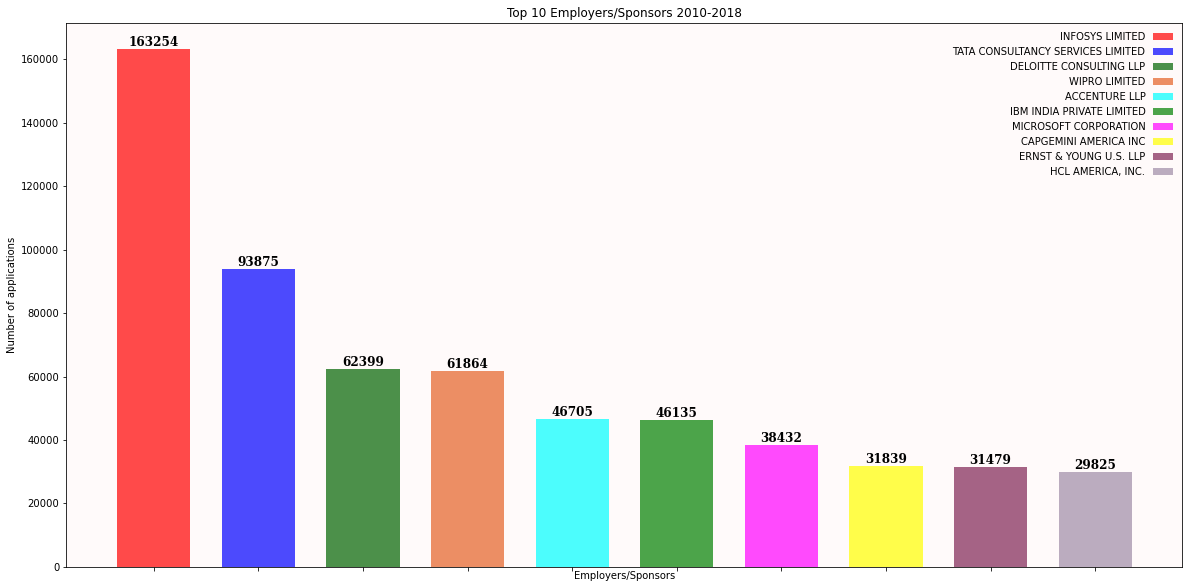

In [90]:
#Let's represent above information in a bar chart
x = H1BVisa20102018_df.reset_index()[['case_number', 'employer_name']].groupby('employer_name').case_number.nunique().sort_values(ascending = False).head(10).index
y = H1BVisa20102018_df.reset_index()[['case_number', 'employer_name']].groupby('employer_name').case_number.nunique().sort_values(ascending = False).head(10).values

width = 0.7       # the width of the bars
opacity = 0.7

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x, y, width, alpha=opacity, align='center', 
                color = ['red', 'blue', 'darkgreen', '#E56124', 'cyan', 'green', 'magenta', 'yellow', '#7F2353', '#9F8CA6'])

#We do not want any label below the bars
plt.setp(ax.get_xticklabels(), visible=False)
ax.set_title('Top 10 Employers/Sponsors 2010-2018')
ax.set_xlabel('Employers/Sponsors')
ax.set_ylabel('Number of applications')
ax.set_facecolor('snow')

ax.legend(rects1,x, frameon = False, markerfirst = False)#rects1 = matplotlib.container.BarContainer rects1[0] = matplotlib.patches.Rectangle

font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12}

bars = ax.patches

for bar, label in zip(bars, y):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, str(label), #we divide by 2, to put the text in the top middle of the bar
            ha='center', va='bottom', fontdict = font)

plt.show()

**Let's do a little bit fancier bar chart and learn more by using a different code and more detail settings**

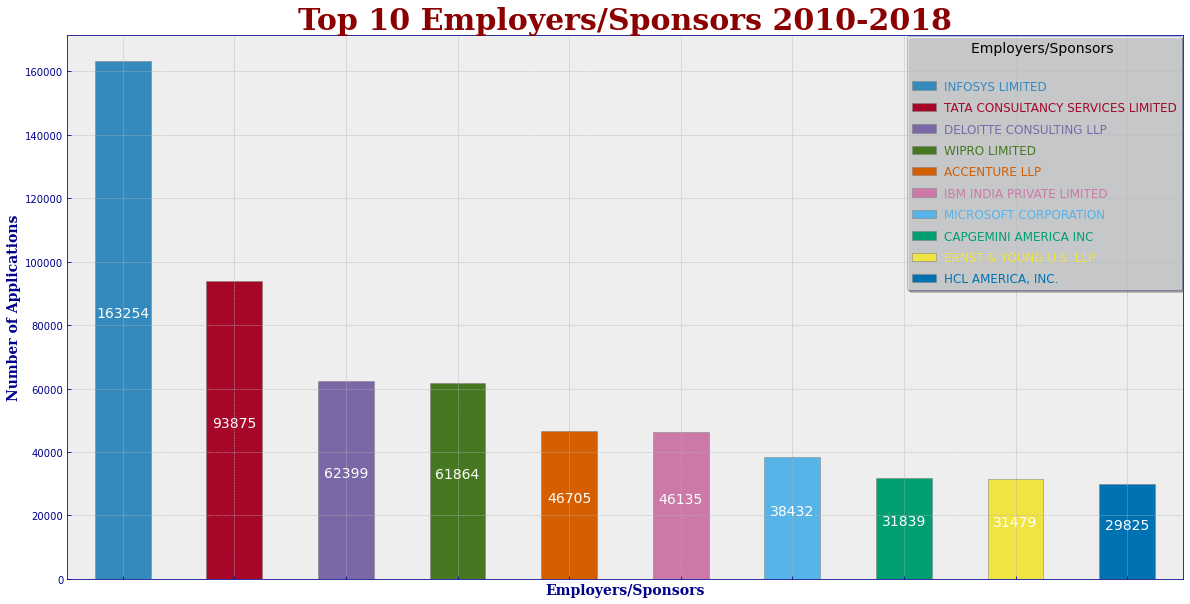

In [91]:
import matplotlib.style
import matplotlib as mpl
from cycler import cycler
mpl.style.use('bmh')#print(plt.style.available)
    
x = H1BVisa20102018_df.reset_index()[['case_number', 'employer_name']].groupby('employer_name').case_number.nunique().sort_values(ascending = False).head(10).index
y = pd.Series(H1BVisa20102018_df.reset_index()[['case_number', 'employer_name']].groupby('employer_name').case_number.nunique().sort_values(ascending = False).head(10).values)

# Plot the figure.
#Default properties via rc parameters
#plt.rc('ytick', color='darkblue', labelsize='large', direction='out')
#plt.rc('xtick', color='darkblue')
#plt.rc('font', family='Arial')

fig = plt.figure(figsize=(20,10), edgecolor='red', frameon=False)

ax = y.plot(kind='bar', edgecolor = 'grey')
#ax.set_facecolor('azure') #this code is to change the background color of the Fig
#We do not want any label below the bars
plt.setp(ax.get_xticklabels(), visible=False)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 30 }
ax.set_title('Top 10 Employers/Sponsors 2010-2018', fontdict = font)

font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 14}
ax.set_xlabel('Employers/Sponsors', fontdict = font)
ax.set_ylabel('Number of Applications',fontdict = font)

#Set the borders to a given color
ax.tick_params(color='darkblue', labelcolor='darkblue')
for spine in ax.spines.values():
    spine.set_edgecolor('darkblue')

bars = ax.patches
bar_colors = []
for bar, label in zip(bars, y.values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height/2, str(label), #we divide height by 2, to put the text in the middle of the bar
            ha='center', va='bottom', fontdict = {'size': 14, 'color':  'white'} )
    bar_colors.append(bar.get_facecolor()) #get the color of the bars
#bars = <matplotlib.patches.Rectangle>
leg = ax.legend(bars, x, shadow=True, fontsize='large', facecolor = '#f2f4f7', fancybox = True, labelspacing = 0.7,
         frameon = True, title ='Employers/Sponsors \n', title_fontsize = 14, handletextpad = 0.7,
         borderaxespad = 0.1, edgecolor = 'darkblue', framealpha = 0.5)
#this code works as well, in case we want to put background color in the legend
#ax.legend(bars, x).get_frame().set_facecolor('lightgrey')

for bar_color,text in zip(bar_colors,leg.get_texts()):
    #text.set_color(bar_color) #use the same color of the bars
    #this is the same as the above code
    plt.setp(text, color = bar_color)
    
#to refresh the plot after modifying properties!
fig.canvas.draw()
plt.ioff()
#reset to default color style, so other charts are not affected
mpl.rcParams.update(mpl.rcParamsDefault)

**Now let's represent the top 10 H-1B visa applications employers by Year**

In [92]:
cases_num_by_year_employer_df = H1BVisa20102018_df.reset_index()[['year', 'employer_name', 'case_number']]
cases_num_by_year_employer_df[cases_num_by_year_employer_df.year ==2010].reset_index()[['year', 'employer_name', 'case_number']].groupby(['year', 'employer_name']).agg({'case_number': 'nunique'}).nlargest(10, 'case_number')
#this code below give the same result, just that here is being filtered by the index
#H1BVisa20102018_df[H1BVisa20102018_df.index.get_level_values('year')==2010].reset_index()[['year', 'employer_name', 'case_number']].groupby(['year', 'employer_name']).agg({'case_number': 'nunique'}).nlargest(10, 'case_number')

case_number
year employer_name                                               
2010 MICROSOFT CORPORATION                                   4449
     WIPRO LIMITED                                           3025
     DELOITTE CONSULTING LLP                                 2342
     INFOSYS TECHNOLOGIES LIMITED                            2182
     FUJITSU AMERICA, INC.                                   1714
     IBM INDIA PRIVATE LIMITED                               1495
     COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION         1483
     INTEL CORPORATION                                       1253
     IBM CORPORATION                                         1226
     LARSEN & TOUBRO INFOTECH LIMITED                        1193

It is a good idea to create one df with all the top 10 by year

In [93]:
cases_num_by_year_employer_l = []
for n_year in range (2010,2019):
    cases_num_by_year_employer_l.append(cases_num_by_year_employer_df[cases_num_by_year_employer_df.year ==n_year].reset_index()[['year', 'employer_name', 'case_number']].groupby(['year', 'employer_name']).agg({'case_number': 'nunique'}).nlargest(10, 'case_number'))

#Let's consolidate in one dataframe
cases_num_by_year_employer_df = pd.concat(cases_num_by_year_employer_l, axis=0)
    
display(cases_num_by_year_employer_df.head(10))
display(cases_num_by_year_employer_df.tail(10))

case_number
year employer_name                                               
2010 MICROSOFT CORPORATION                                   4449
     WIPRO LIMITED                                           3025
     DELOITTE CONSULTING LLP                                 2342
     INFOSYS TECHNOLOGIES LIMITED                            2182
     FUJITSU AMERICA, INC.                                   1714
     IBM INDIA PRIVATE LIMITED                               1495
     COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION         1483
     INTEL CORPORATION                                       1253
     IBM CORPORATION                                         1226
     LARSEN & TOUBRO INFOTECH LIMITED                        1193

case_number
year employer_name                                      
2018 DELOITTE CONSULTING LLP                       16140
     TATA CONSULTANCY SERVICES LIMITED             14604
     INFOSYS LIMITED                               11591
     COGNIZANT TECHNOLOGY SOLUTIONS US CORP        11086
     ERNST & YOUNG U.S. LLP                         6892
     ACCENTURE LLP                                  6381
     WIPRO LIMITED                                  6306
     GOOGLE LLC                                     6099
     CAPGEMINI AMERICA INC                          6064
     TECH MAHINDRA (AMERICAS),INC.                  5835

In [94]:
def select_year_top10_emp(year, style):
    mpl.style.use(style)
    
    x = cases_num_by_year_employer_df[cases_num_by_year_employer_df.index.get_level_values('year')==year].reset_index().employer_name
    y = cases_num_by_year_employer_df[cases_num_by_year_employer_df.index.get_level_values('year')==year].reset_index().case_number

    fig = plt.figure(figsize=(20,10), edgecolor='red', frameon=False)

    ax = y.plot(kind='bar', edgecolor = 'grey')
    plt.setp(ax.get_xticklabels(), visible=False)

    font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'bold',
            'size': 30 }
    ax.set_title('Top 10 Employers/Sponsors ' + str(year), fontdict = font)

    font = {'family': 'serif',
            'color':  'darkblue',
            'weight': 'bold',
            'size': 14}
    ax.set_xlabel('Employers/Sponsors', fontdict = font)
    ax.set_ylabel('Number of Applications',fontdict = font)

    #Set the borders to a given color
    ax.tick_params(color='darkblue', labelcolor='darkblue')
    for spine in ax.spines.values():
        spine.set_edgecolor('darkblue')

    bars = ax.patches
    bar_colors = []
    for bar, label in zip(bars, y.values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height/2, str(label),
                ha='center', va='bottom', fontdict = {'size': 14, 'color':  'white'} )
        bar_colors.append(bar.get_facecolor()) #get the color of the bars

    leg = ax.legend(bars, x, shadow=True, fontsize='large', facecolor = '#f2f4f7', fancybox = True, labelspacing = 0.7,
             frameon = True, title ='Employers/Sponsors \n', title_fontsize = 14, handletextpad = 0.7,
             borderaxespad = 0.1, edgecolor = 'darkblue', framealpha = 0.5)

    for bar_color,text in zip(bar_colors,leg.get_texts()):
        plt.setp(text, color = bar_color)
        
    fig.canvas.draw()
    plt.ioff()

    mpl.rcParams.update(mpl.rcParamsDefault)

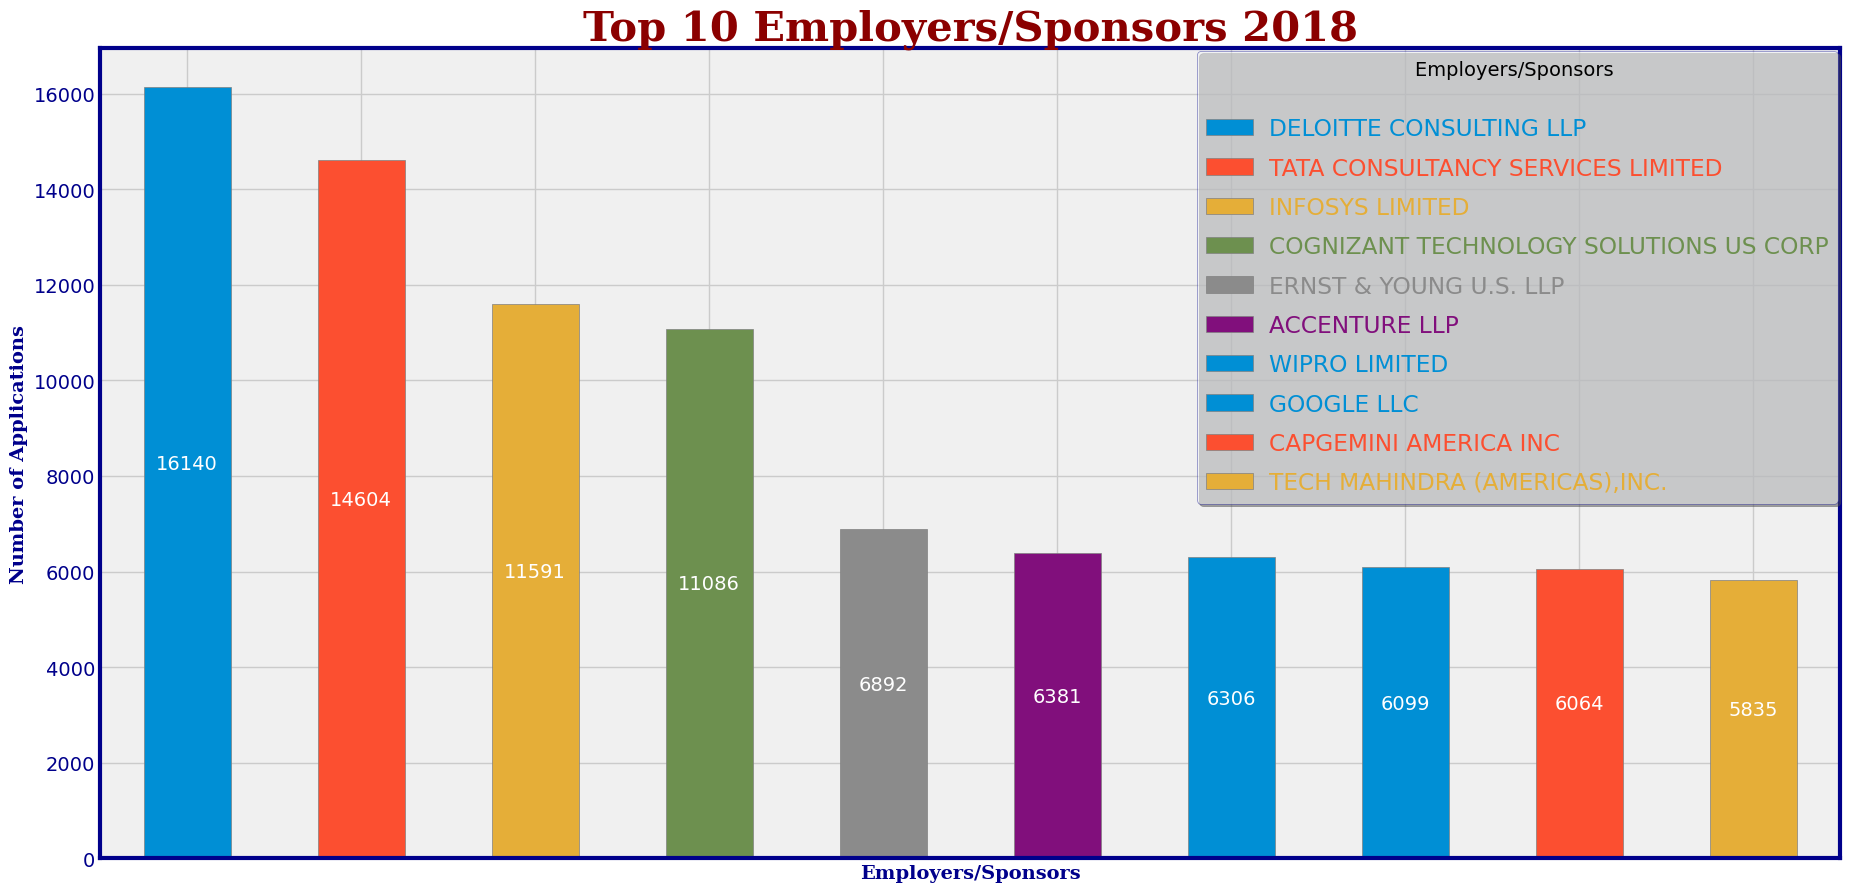

In [95]:
#this function allow us to select the year that we want to see
select_year_top10_emp(2018, 'fivethirtyeight')

**Now let's focus our attention to the top 10 H-1B visa applications professions by Year**

In [96]:
soc_name_by_year_df = H1BVisa20102018_df.reset_index()[['year','soc_name']]
soc_name_by_year_l = []
for n_year in range (2010,2019):
    soc_name_by_year_l.append(soc_name_by_year_df[soc_name_by_year_df.year ==n_year].reset_index()[['year','soc_name']].groupby(['year','soc_name']).agg({'soc_name': 'count'}).nlargest(10, 'soc_name'))

#Let's consolidate in one dataframe
soc_name_by_year_df = pd.concat(soc_name_by_year_l, axis=0)
soc_name_by_year_df.index.names = ['year', 'profession']
#rename column name
soc_name_by_year_df.rename(columns={'soc_name':'prof_number'}, inplace=True)
soc_name_by_year_df.head()                        

prof_number
year profession                                    
2010 SOFTWARE DEVELOPERS, APPLICATIONS        52261
     COMPUTER PROGRAMMERS                     40262
     COMPUTER SYSTEMS ANALYSTS                37181
     FINANCIAL ANALYSTS                        8065
     MARKET RESEARCH ANALYSTS                  7649

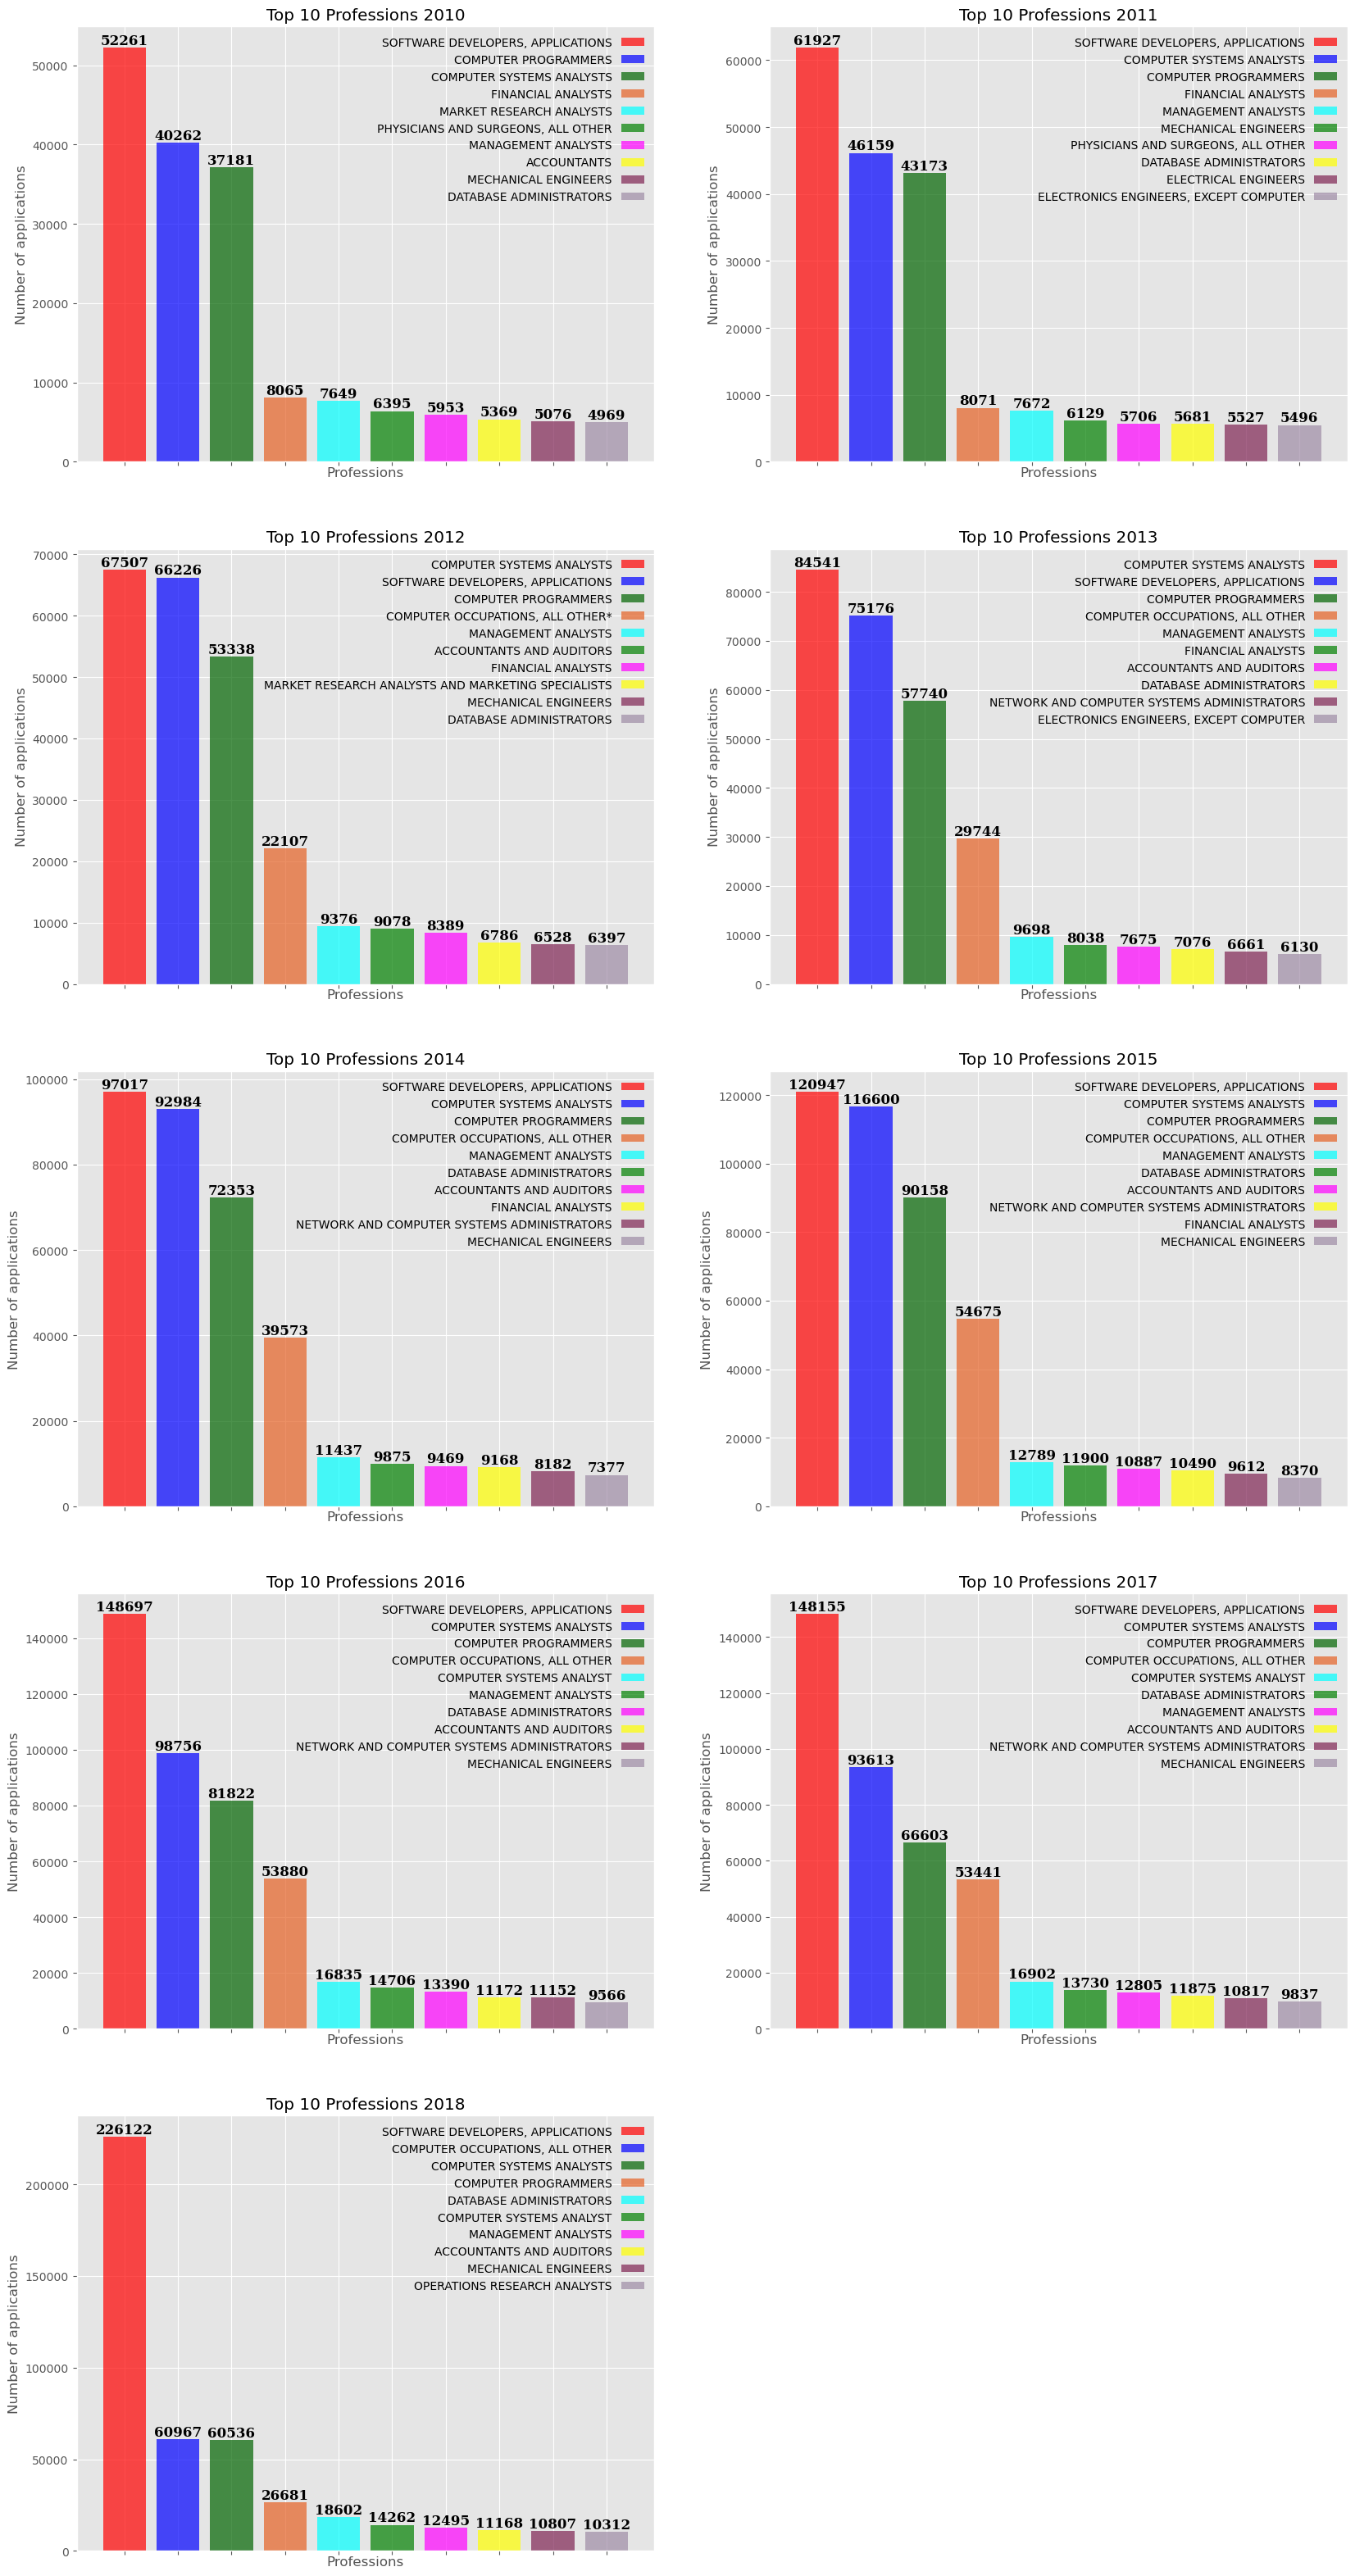

In [97]:
def add_subplot(nrows, ncols, index, year, style):
    mpl.style.use(style)
    ax = plt.subplot(nrows,ncols,index)
    
    x = soc_name_by_year_df[soc_name_by_year_df.index.get_level_values('year')==year].reset_index().profession
    y = soc_name_by_year_df[soc_name_by_year_df.index.get_level_values('year')==year].reset_index().prof_number

    plt.bar(x, y, alpha=opacity, align='center', 
            color = ['red', 'blue', 'darkgreen', '#E56124', 'cyan', 'green', 'magenta', 'yellow', '#7F2353', '#9F8CA6'])

    #We do not want any label below the bars
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set_title('Top 10 Professions ' + str(year))
    ax.set_xlabel('Professions')
    ax.set_ylabel('Number of applications')

    ax.legend(rects1,x, frameon = False, markerfirst = False)

    font = {'family': 'serif',
            'color':  'black',
            'weight': 'bold',
            'size': 12}

    bars = ax.patches

    for bar, label in zip(bars, y):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, str(label),
                ha='center', va='bottom', fontdict = font)
        
plt.figure(figsize=(20,40))
style ='ggplot'
add_subplot(5, 2, 1,2010, style)
add_subplot(5, 2, 2,2011, style)
add_subplot(5, 2, 3,2012, style)
add_subplot(5, 2, 4,2013, style)
add_subplot(5, 2, 5,2014, style)
add_subplot(5, 2, 6,2015, style)
add_subplot(5, 2, 7,2016, style)
add_subplot(5, 2, 8,2017, style)
add_subplot(5, 2, 9,2018, style)

plt.show()
mpl.rcParams.update(mpl.rcParamsDefault)

**We want to find out the top 10 H-1B visa applications work state by year**

In [98]:
work_state_by_year_df = H1BVisa20102018_df.reset_index()[['year','work_loc_state']]
work_state_by_year_l = []
for n_year in range (2010,2019):
    work_state_by_year_l.append(work_state_by_year_df[work_state_by_year_df.year ==n_year].reset_index()[['year','work_loc_state']].groupby(['year','work_loc_state']).agg({'work_loc_state': 'count'}).nlargest(10, 'work_loc_state'))

#Let's consolidate in one dataframe
work_state_by_year_df = pd.concat(work_state_by_year_l, axis=0)
work_state_by_year_df.index.names = ['year', 'state']
#rename column name
work_state_by_year_df.rename(columns={'work_loc_state':'state_number'}, inplace=True)
work_state_by_year_df.head()     

state_number
year state              
2010 CA            61697
     NY            40973
     TX            28071
     NJ            22018
     IL            17178

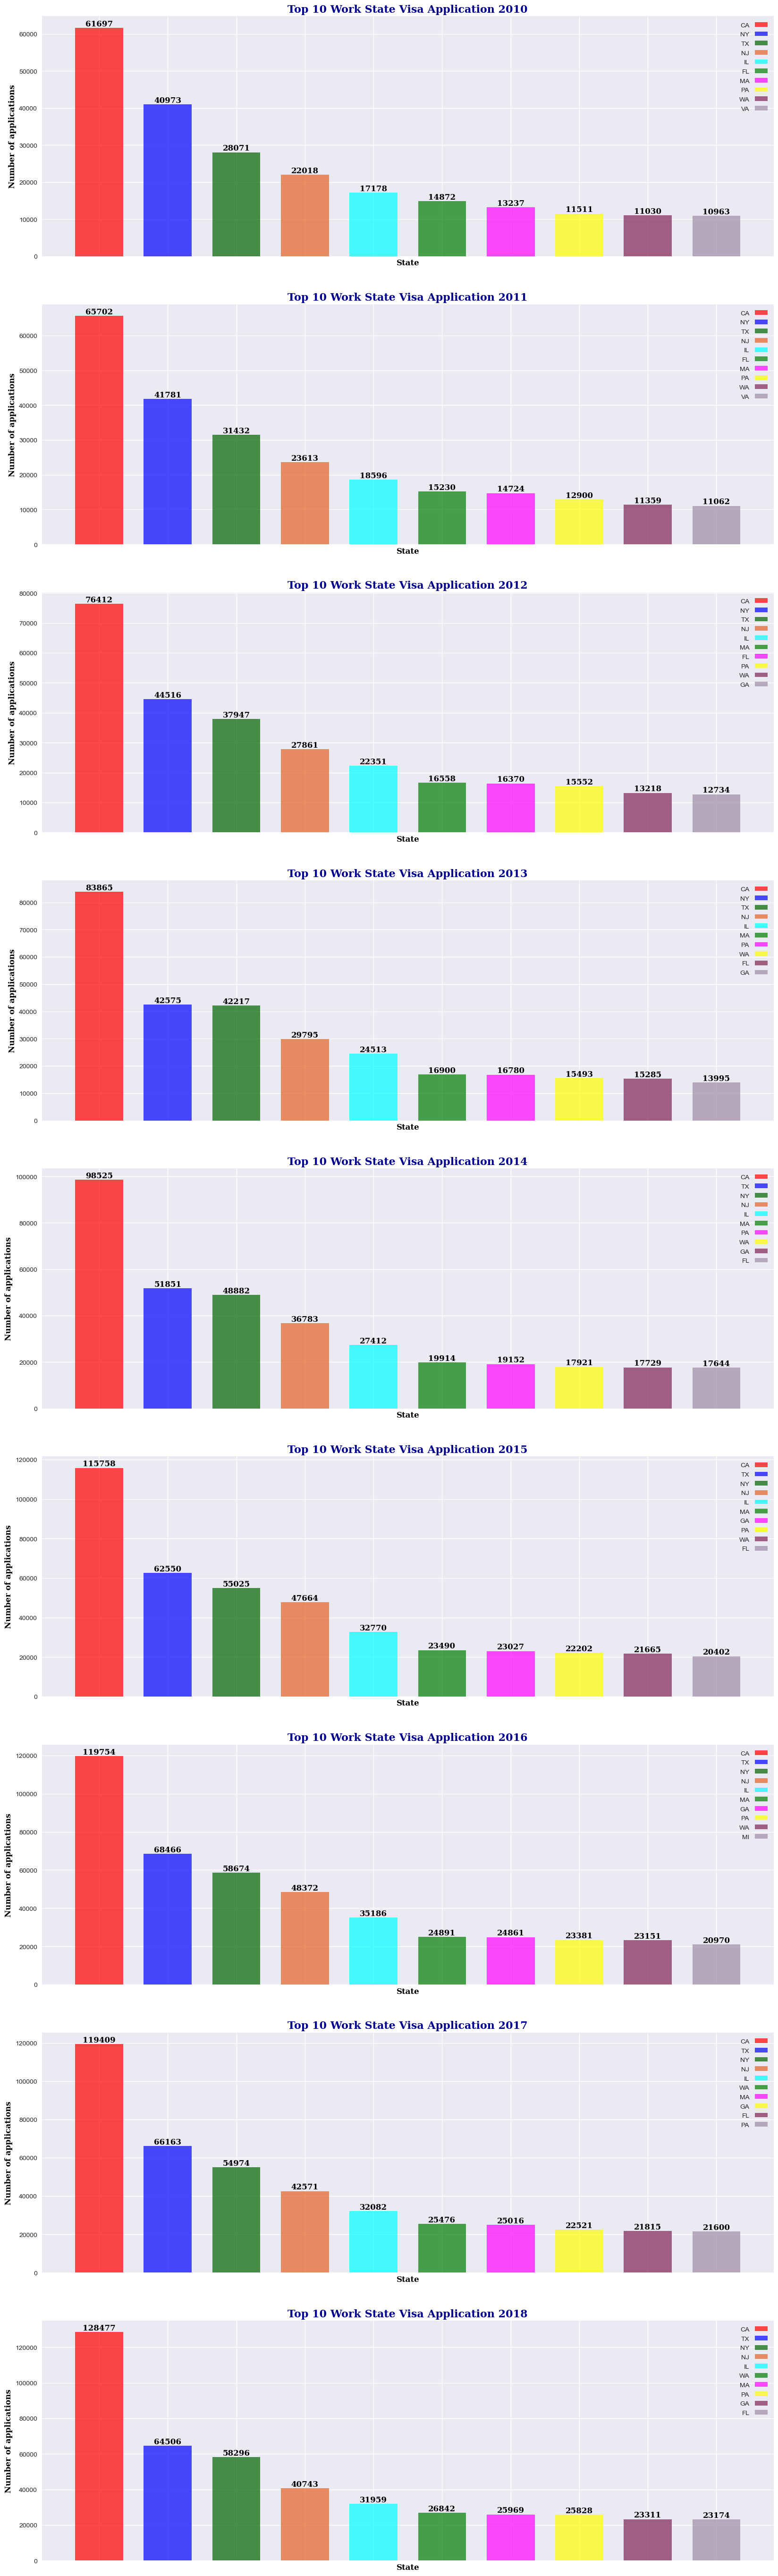

In [99]:
mpl.style.use('seaborn')
width = 0.7       # the width of the bars
opacity = 0.7
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12}
font_title = {'family': 'serif',
              'color':  'darkblue',
              'weight': 'bold',
              'size': 16}
    
years = soc_name_by_year_df.index.get_level_values('year').unique().values

fig, axes = plt.subplots(9, figsize=(20,70))
for ax, year in zip(axes, years):
    x = work_state_by_year_df[work_state_by_year_df.index.get_level_values('year')==year].reset_index().state
    y = work_state_by_year_df[work_state_by_year_df.index.get_level_values('year')==year].reset_index().state_number

    rects1 = ax.bar(x, y, width, alpha=opacity, align='center', 
            color = ['red', 'blue', 'darkgreen', '#E56124', 'cyan', 'green', 'magenta', 'yellow', '#7F2353', '#9F8CA6'])

    #We do not want any label below the bars
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set_title('Top 10 Work State Visa Application ' + str(year), fontdict = font_title)
    ax.set_xlabel('State', fontdict = font)
    ax.set_ylabel('Number of applications', fontdict = font)

    ax.legend(rects1,x, frameon = False, markerfirst = False)#rects1 = matplotlib.container.BarContainer rects1[0] = matplotlib.patches.Rectangle

    bars = ax.patches

    for bar, label in zip(bars, y):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, str(label), #we divide by 2, to put the text in the top middle of the bar
                ha='center', va='bottom', fontdict = font)

plt.show()
mpl.rcParams.update(mpl.rcParamsDefault)

In [100]:
H1BVisa20102018_df.status.unique()

[CERTIFIED, WITHDRAWN, CERTIFIED-WITHDRAWN, DENIED, REJECTED, INVALIDATED, PENDING QUALITY AND COMPLIANCE REVIEW - UNASSI..., VOIDED]
Categories (8, object): [CERTIFIED, WITHDRAWN, CERTIFIED-WITHDRAWN, DENIED, REJECTED, INVALIDATED, PENDING QUALITY AND COMPLIANCE REVIEW - UNASSI..., VOIDED]

In [101]:
for i in range(0,8):
    print(H1BVisa20102018_df.status.unique()[i])

CERTIFIED
WITHDRAWN
CERTIFIED-WITHDRAWN
DENIED
REJECTED
INVALIDATED
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED
VOIDED


In [102]:
H1BVisa20102018_Trend_df = H1BVisa20102018_df.copy()

H1BVisa20102018_Trend_df.reset_index(inplace = True)
H1BVisa20102018_Trend_df.set_index(['decision_date'], inplace = True)
H1BVisa20102018_Trend_df.loc[H1BVisa20102018_Trend_df.status.isin(['CERTIFIED', 'CERTIFIED-WITHDRAWN']), 'status'] = 'CERTIFIED'
H1BVisa20102018_Trend_df.loc[H1BVisa20102018_Trend_df.status.isin(['DENIED','WITHDRAWN','REJECTED','INVALIDATED','VOIDED','PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED']), 'status'] = 'DENIED'
H1BVisa20102018_Trend_df['decision_year'] = H1BVisa20102018_Trend_df.index.strftime('%Y').values
H1BVisa20102018_Trend_df.decision_year = H1BVisa20102018_Trend_df.decision_year.astype('int')
H1BVisa20102018_Trend_df.head()

,year,case_number,status,case_submit,employment_start_date,employment_end_date,employer_name,employer_address,employer_city,employer_state,employer_postal_code,soc_code,soc_name,job_title,wage_rate_from,wage_rate_to,wage_rate_unit,full_time_pos,total_workers,work_loc_city,work_loc_state,pay_wage,pay_wage_unit,pay_wage_source,pay_wage_source_desc,year_pw_source_pub,year_submit,occupation,it_job,it_data_job,decision_year
decision_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-03-14,2018,I-200-18069-389598,CERTIFIED,2018-03-09 00:00:00,2018-09-06,2021-09-05,TATA CONSULTANCY SERVICES LIMITED,9201 CORPORATE BOULEVARD,ROCKVILLE,MD,20850,15-1199,"COMPUTER OCCUPATIONS, ALL OTHER",CONSULTANT,88317,88317,YEAR,Y,1,NEW YORK,NY,88317,YEAR,OES,OFLC ONLINE DATA CENTER,2017,2018,COMPUTER OCCUPATIONS,1,0,2018
2018-02-26,2018,I-200-18052-999937,CERTIFIED,2018-02-20 00:00:00,2018-08-02,2021-08-02,"KOHL'S DEPARTMENT STORES, INC.",N56 W17000 RIDGEWOOD DRIVE,MENOMONEE FALLS,WI,53051,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",SENIOR SOFTWARE ENGINEER,98322,98322,YEAR,Y,1,MENOMONEE FALLS,WI,98322,YEAR,OES,OFLC ONLINE DATA CENTER,2017,2018,COMPUTER OCCUPATIONS,1,0,2018
2018-03-07,2018,I-200-18061-129235,CERTIFIED,2018-03-01 00:00:00,2018-08-27,2021-08-26,"ANS CONSULTANTS, INC.",4405 SOUTH CLINTON AVE.,SOUTH PLAINFIELD,NJ,07080,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",SOFTWARE DEVELOPER,72000,72000,YEAR,Y,1,SOUTH PLAINFIELD,NJ,72000,YEAR,OTHER,ONLINE WAGE LIBRARY,2017,2018,COMPUTER OCCUPATIONS,1,0,2018
2018-04-16,2018,I-200-18101-272140,CERTIFIED,2018-04-10 00:00:00,2018-04-10,2021-04-10,INSPIRAGE LLC,600 108TH AVE NE,BELLEVUE,WA,98004,17-2112,INDUSTRIAL ENGINEERS,PRINCIPAL CONSULTANT,110000,110000,YEAR,Y,1,WARREN,MI,110000,YEAR,OES,OFLC ONLINE DATA CENTER,2017,2018,ARCHITECTURE & ENGINEERING,0,0,2018
2018-03-11,2018,I-200-18067-019506,DENIED,2018-03-07 00:00:00,2018-09-04,2021-09-03,GREENFIELD WORLD TRADE,3355 ENTERPRISE AVENUE,FORT LAUDERDALE,FL,33331,17-2199,"ENGINEERS, ALL OTHER",MANUFACTURING ENGINEER,62000,62000,YEAR,Y,1,SACRAMENTO,CA,62000,YEAR,OTHER,OFLC ONLINE DATA CENTER,2018,2018,ARCHITECTURE & ENGINEERING,0,0,2018


**How many H-1B Visa applications have been approved beetween 2010-2018, and check if the Donald Trump Administration has influence visa approvals**

In [103]:
H1BVisa20102018_Trend_df[H1BVisa20102018_Trend_df.status =='CERTIFIED'].groupby('decision_year').agg({'case_number': 'nunique'}).nlargest(10, 'case_number')

,case_number
decision_year,
2016,613271
2017,592741
2015,587276
2018,536599
2014,497723
2013,425750
2012,361840
2011,338576
2010,291420


In [104]:
#year in which the decision was made
x = H1BVisa20102018_Trend_df.index.strftime('%Y').unique().sort_values(ascending = True).values
#x = H1BVisa20102018_Trend_df.decision_year.unique()

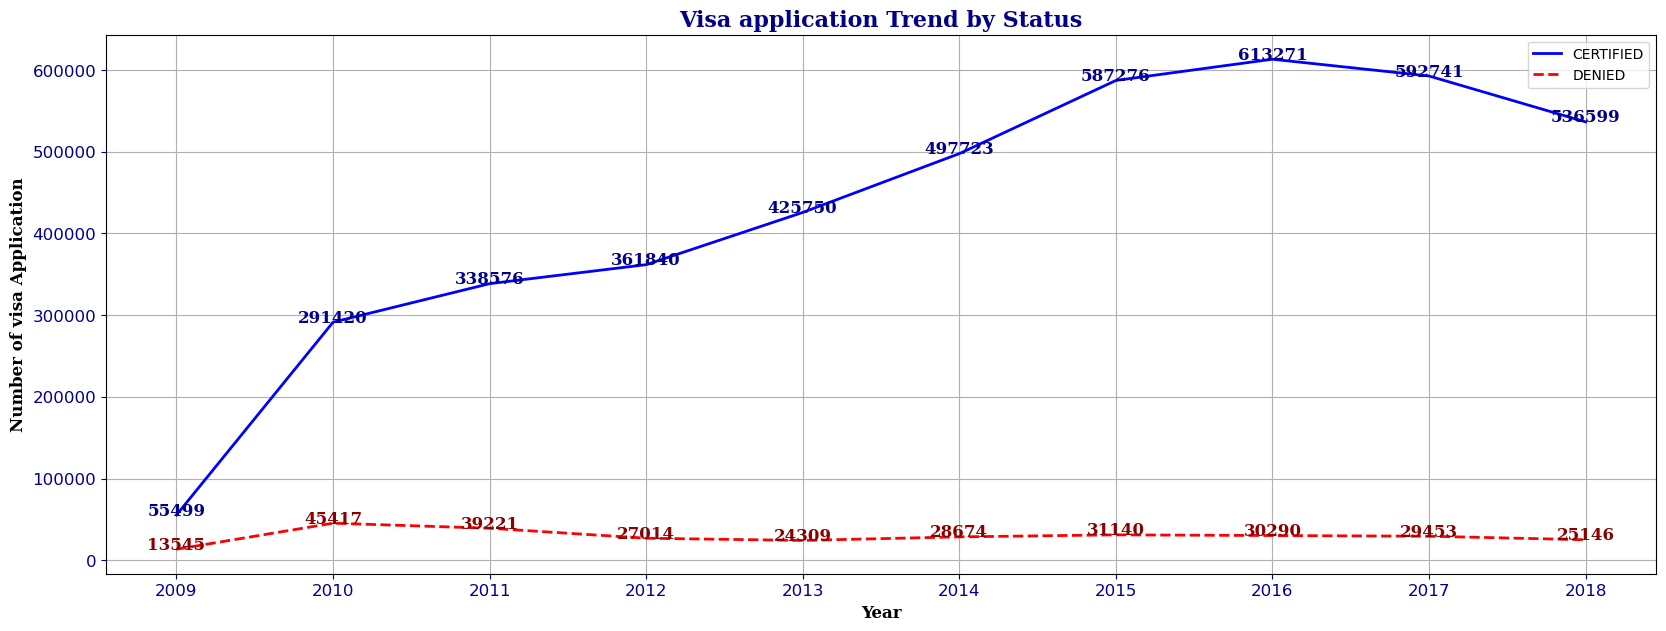

In [105]:
y1 = H1BVisa20102018_Trend_df[H1BVisa20102018_Trend_df.status =='CERTIFIED'].groupby('decision_year', sort=True).case_number.nunique().values
y2 = H1BVisa20102018_Trend_df[H1BVisa20102018_Trend_df.status =='DENIED'].groupby('decision_year', sort=True).case_number.nunique().values
plt.figure(figsize=(20,7))
plt.plot(x, y1, label = 'CERTIFIED', linewidth = 2, color='blue')
plt.plot(x, y2, label = 'DENIED', linewidth = 2, color='red', linestyle = '--')

font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12}
font_title = {'family': 'serif',
              'color':  'darkblue',
              'weight': 'bold',
              'size': 16}

plt.xlabel('Year', fontdict = font)
plt.ylabel('Number of visa Application', fontdict = font)
plt.title('Visa application Trend by Status', fontdict = font_title)
plt.tick_params(color='darkblue', labelcolor='darkblue', labelsize = 'large')

for i in range(0,10):
    plt.text(i,y1[i],str(y1[i]), ha='center', color='darkblue', fontdict = font)
    plt.text(i,y2[i],str(y2[i]), ha='center', color='darkred', fontdict = font)

plt.legend()
plt.grid()

**Now Let's see the comparison between CERTIFIED visa applications and DENIED visa applications 2010-2018 with a pie chart**

In [106]:
#We are removing unsed categories, so that we can draw our pie char
H1BVisa20102018_Trend_df.status.cat.remove_unused_categories(inplace=True)

In [107]:
#Percentage of CERTIFIED visa applications
#certified_p =(pie_chart_df.groupby(level=1).Number_of_cases.sum()[0]/pie_chart_df.groupby(level=0).Number_of_cases.sum().values[0])*100
#Percentage of DENIED visa applications
#denied_p =(pie_chart_df.groupby(level=1).Number_of_cases.sum()[1]/pie_chart_df.groupby(level=0).Number_of_cases.sum().values[0])*100

status
CERTIFIED    4168901
DENIED        294179
Name: case_number, dtype: int64

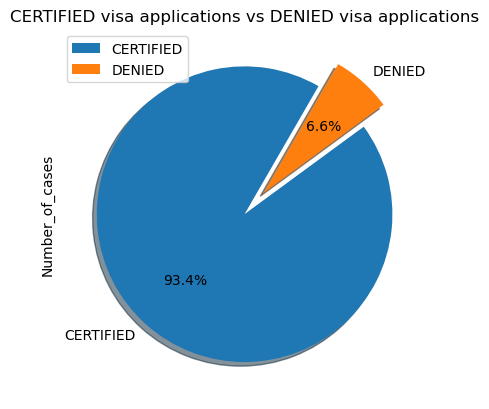

In [108]:
display(H1BVisa20102018_Trend_df.groupby(['status']).case_number.nunique())
explode = (0, 0.2)
pie_chart_df = pd.DataFrame(H1BVisa20102018_Trend_df.groupby(['status']).case_number.nunique())
pie_chart_df.rename(columns={'case_number':'Number_of_cases'}, inplace=True)
pie_chart_df.plot(y='Number_of_cases',kind='pie', autopct='%1.1f%%',shadow=True, startangle=60, explode=explode,
                  title='CERTIFIED visa applications vs DENIED visa applications') 

**Now Let's see the comparison between CERTIFIED visa applications and DENIED visa applications by year with a pie chart**


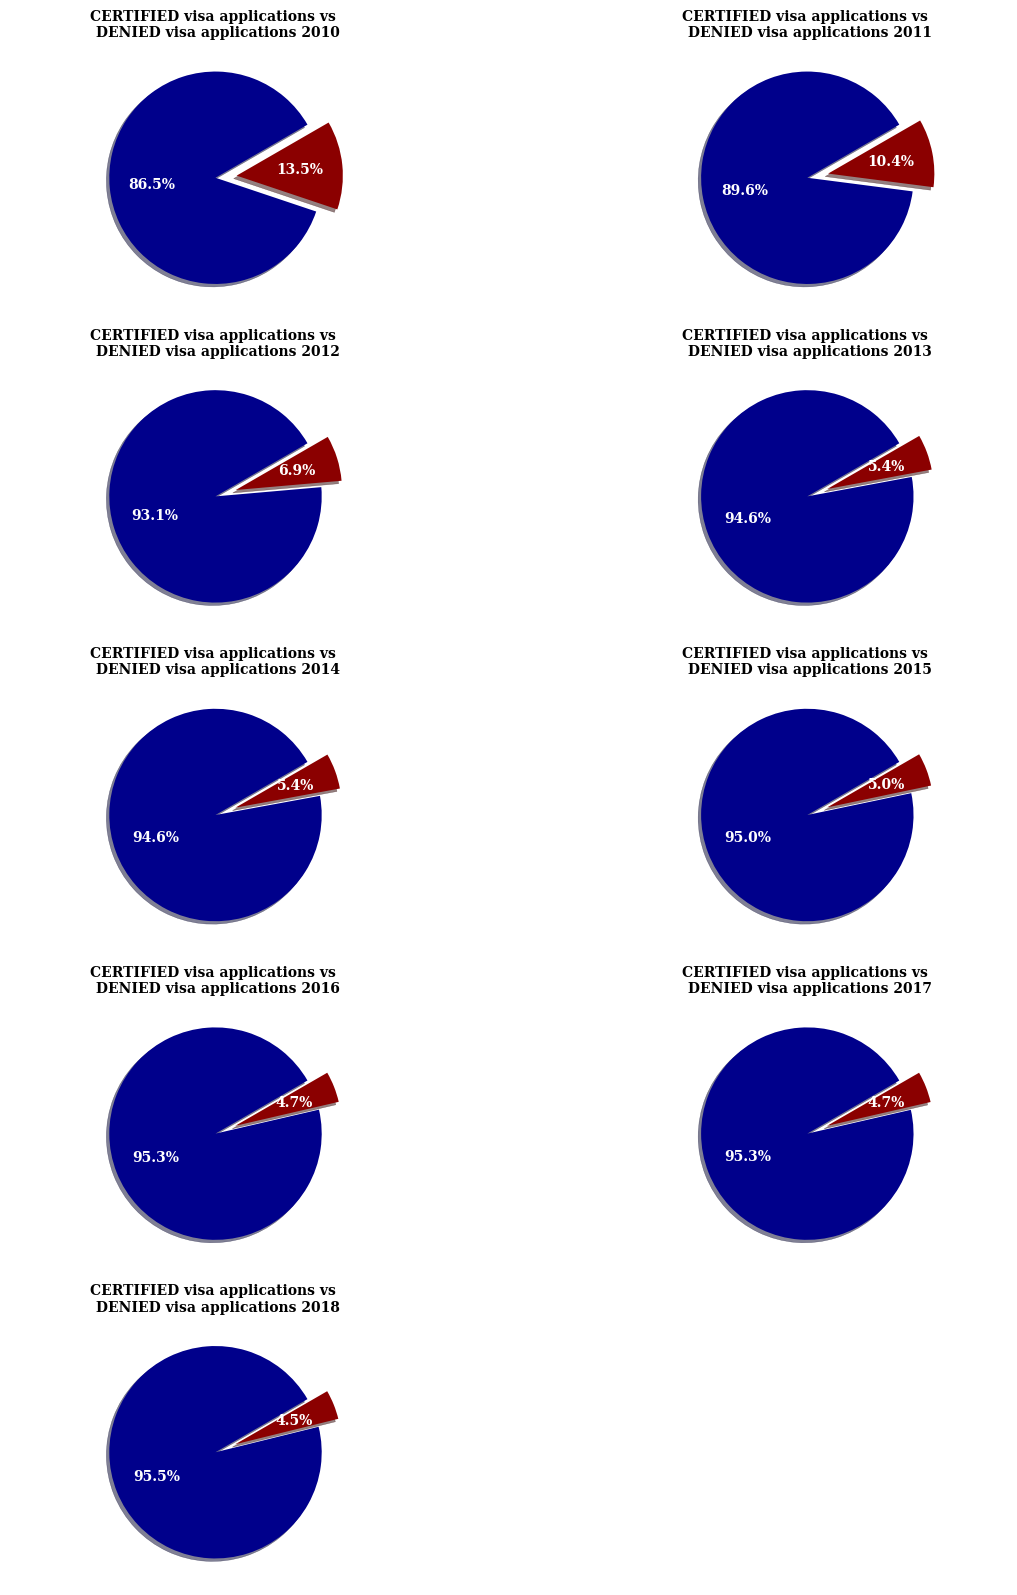

In [109]:
def add_subplot(nrows, ncols, index, year, style):
    mpl.style.use(style)
    explode = (0, 0.2)
    ax = plt.subplot(nrows,ncols,index)
 
    font_tiltle = {'family': 'serif',
                    'color':  'black',
                    'weight': 'bold',
                    'size': 10}
    font = {'family': 'serif',
            'color': 'white',
            'weight': 'bold',
            'size': 10}

    y = H1BVisa20102018_Trend_df[H1BVisa20102018_Trend_df.decision_year ==year].groupby(['decision_year', 'status']).case_number.nunique()
    
    plt.pie(y, labels = pie_chart_df.index.get_level_values('status'), autopct='%1.1f%%', explode=explode,
            shadow=True, startangle=30, colors=['darkblue', 'darkred'], textprops =font)
    
    ax.set_title('CERTIFIED visa applications vs \n DENIED visa applications ' + str(year), fontdict = font_tiltle)

plt.figure(figsize=(14,20))
style ='seaborn'
add_subplot(5, 2, 1,2010, style)
add_subplot(5, 2, 2,2011, style)
add_subplot(5, 2, 3,2012, style)
add_subplot(5, 2, 4,2013, style)
add_subplot(5, 2, 5,2014, style)
add_subplot(5, 2, 6,2015, style)
add_subplot(5, 2, 7,2016, style)
add_subplot(5, 2, 8,2017, style)
add_subplot(5, 2, 9,2018, style)
plt.show()
mpl.rcParams.update(mpl.rcParamsDefault)

**Now let's see the trend for IT and Data Jobs in Certified Visa Applications**

We can see that the Trump administration slightly impacted the number of visa application (Trump started his presidency on Jan-2017)

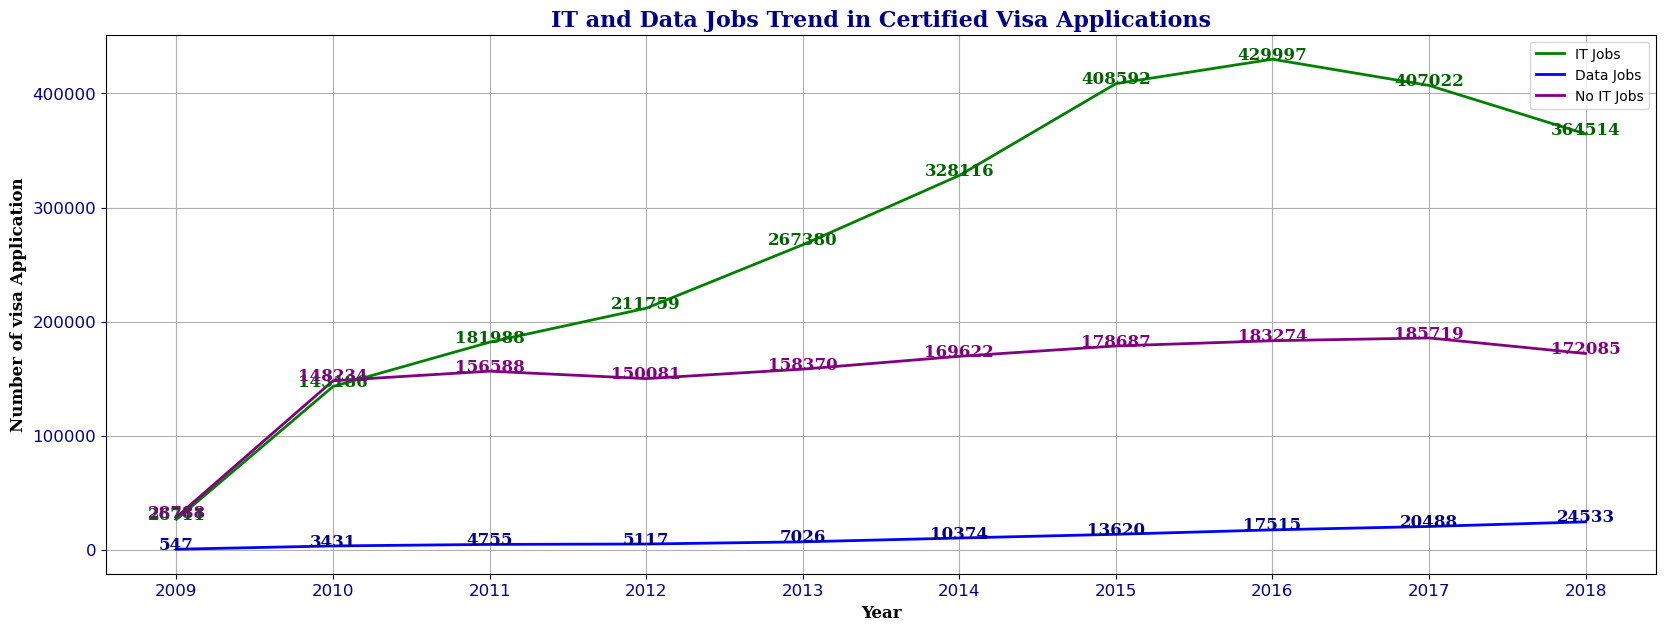

In [110]:
y1 = H1BVisa20102018_Trend_df[(H1BVisa20102018_Trend_df.status =='CERTIFIED') & (H1BVisa20102018_Trend_df.it_job ==1)].groupby('decision_year', sort=True).case_number.nunique().values
y2 = H1BVisa20102018_Trend_df[(H1BVisa20102018_Trend_df.status =='CERTIFIED') & (H1BVisa20102018_Trend_df.it_data_job ==1)].groupby('decision_year', sort=True).case_number.nunique().values
y3 = H1BVisa20102018_Trend_df[(H1BVisa20102018_Trend_df.status =='CERTIFIED') & (H1BVisa20102018_Trend_df.it_job !=1)].groupby('decision_year', sort=True).case_number.nunique().values
plt.figure(figsize=(20,7))
plt.plot(x, y1, label = 'IT Jobs', linewidth = 2, color='green')
plt.plot(x, y2, label = 'Data Jobs', linewidth = 2, color='blue')
plt.plot(x, y3, label = 'No IT Jobs', linewidth = 2, color='purple')

font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12}
font_title = {'family': 'serif',
              'color':  'darkblue',
              'weight': 'bold',
              'size': 16}

plt.xlabel('Year', fontdict = font)
plt.ylabel('Number of visa Application', fontdict = font)
plt.title('IT and Data Jobs Trend in Certified Visa Applications', fontdict = font_title)
plt.tick_params(color='darkblue', labelcolor='darkblue', labelsize = 'large')

for i in range(0,10):
    plt.text(i,y1[i],str(y1[i]), ha='center', color='darkgreen', fontdict = font)
    plt.text(i,y2[i],str(y2[i]), ha='center', color='darkblue', fontdict = font)
    plt.text(i,y3[i],str(y3[i]), ha='center', color='purple', fontdict = font)

plt.legend()
plt.grid()

In [111]:
it_job_v = H1BVisa20102018_Trend_df[(H1BVisa20102018_Trend_df.decision_year ==2018) & (H1BVisa20102018_Trend_df.status =='CERTIFIED') 
                         & (H1BVisa20102018_Trend_df.it_job ==1)].groupby('decision_year').case_number.nunique().values

it_data_job_v = H1BVisa20102018_Trend_df[(H1BVisa20102018_Trend_df.decision_year ==2018) & (H1BVisa20102018_Trend_df.status =='CERTIFIED') 
                         & (H1BVisa20102018_Trend_df.it_data_job ==1)].groupby('decision_year').case_number.nunique().values

no_it_job_v = H1BVisa20102018_Trend_df[(H1BVisa20102018_Trend_df.decision_year ==2018) & (H1BVisa20102018_Trend_df.status =='CERTIFIED') 
                         & (H1BVisa20102018_Trend_df.it_job !=1)].groupby('decision_year').case_number.nunique().values

job_type_labels = 'No IT Jobs', 'IT Jobs'
it_and_data_job_labels = 'IT Jobs', 'Data Jobs'

job_type_l = [no_it_job_v, it_job_v]
it_and_data_job_l = [it_job_v - it_data_job_v, it_data_job_v]
explode = (0, 0.1)

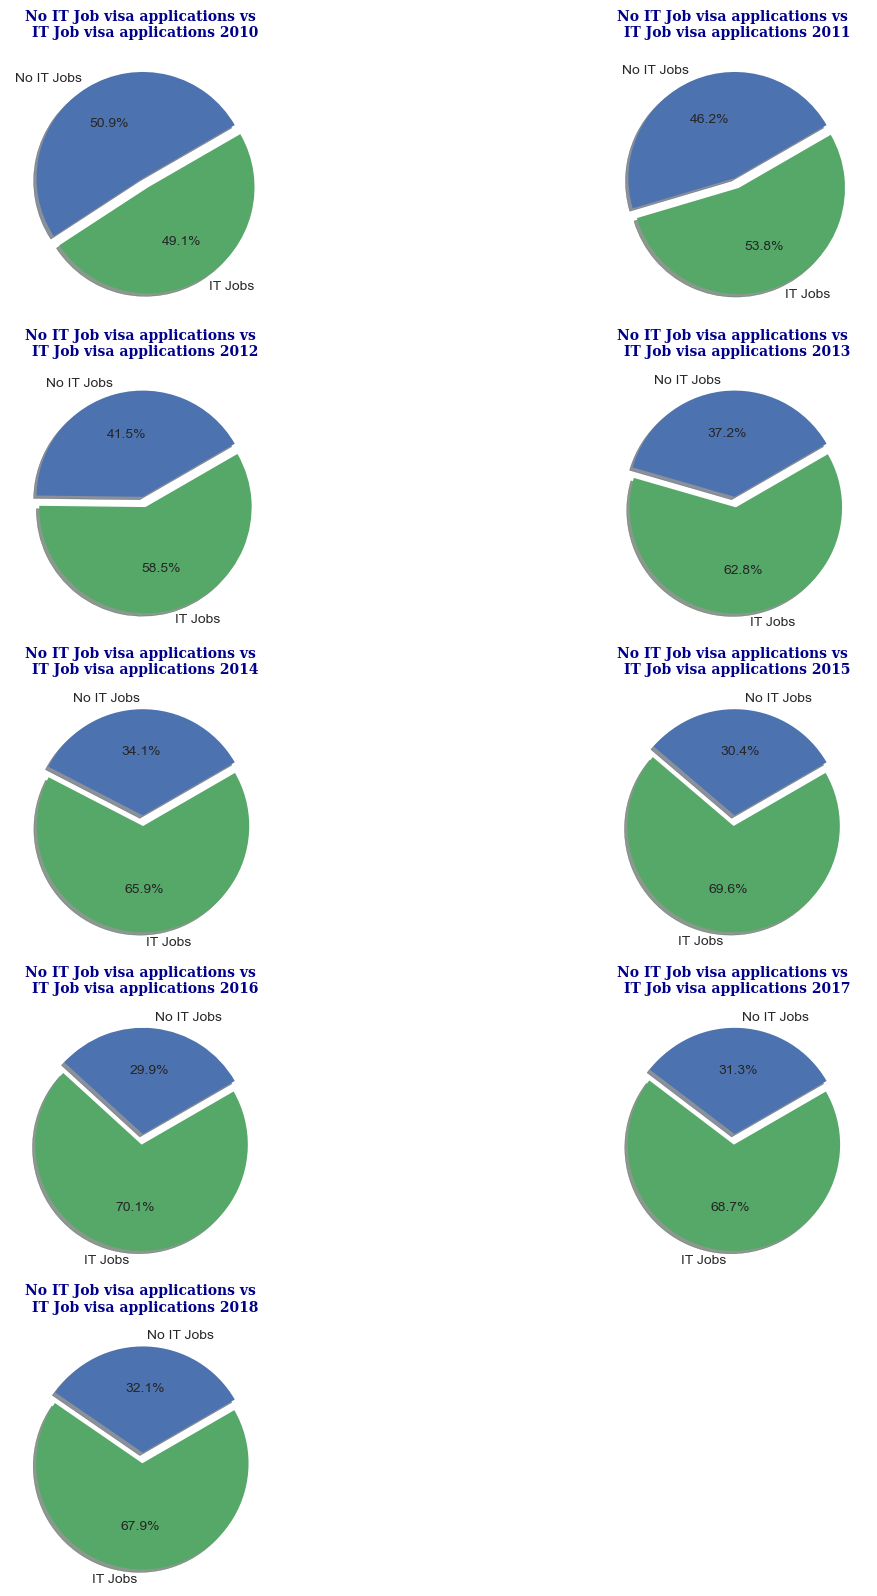

In [112]:
def add_subplot(nrows, ncols, index, year, style):
    mpl.style.use(style)
    explode = (0, 0.1)
    ax = plt.subplot(nrows,ncols,index)
 
    font = {'family': 'serif',
            'color':  'darkblue',
            'weight': 'bold',
            'size': 10}
    
    job_type_labels = 'No IT Jobs', 'IT Jobs'
    
    it_job_v = H1BVisa20102018_Trend_df[(H1BVisa20102018_Trend_df.decision_year ==year) & (H1BVisa20102018_Trend_df.status =='CERTIFIED') 
                         & (H1BVisa20102018_Trend_df.it_job ==1)].groupby('decision_year').case_number.nunique().values

    no_it_job_v = H1BVisa20102018_Trend_df[(H1BVisa20102018_Trend_df.decision_year ==year) & (H1BVisa20102018_Trend_df.status =='CERTIFIED') 
                             & (H1BVisa20102018_Trend_df.it_job !=1)].groupby('decision_year').case_number.nunique().values

    job_type_l = [no_it_job_v[0], it_job_v[0]]
    y = job_type_l
    
    plt.pie(y, labels = job_type_labels, autopct='%1.1f%%', explode=explode, shadow=True, startangle=30)
    
    ax.set_title('No IT Job visa applications vs \n IT Job visa applications ' + str(year), fontdict = font)

plt.figure(figsize=(14,20))
style ='seaborn'
add_subplot(5, 2, 1,2010, style)
add_subplot(5, 2, 2,2011, style)
add_subplot(5, 2, 3,2012, style)
add_subplot(5, 2, 4,2013, style)
add_subplot(5, 2, 5,2014, style)
add_subplot(5, 2, 6,2015, style)
add_subplot(5, 2, 7,2016, style)
add_subplot(5, 2, 8,2017, style)
add_subplot(5, 2, 9,2018, style)
plt.show()
mpl.rcParams.update(mpl.rcParamsDefault)

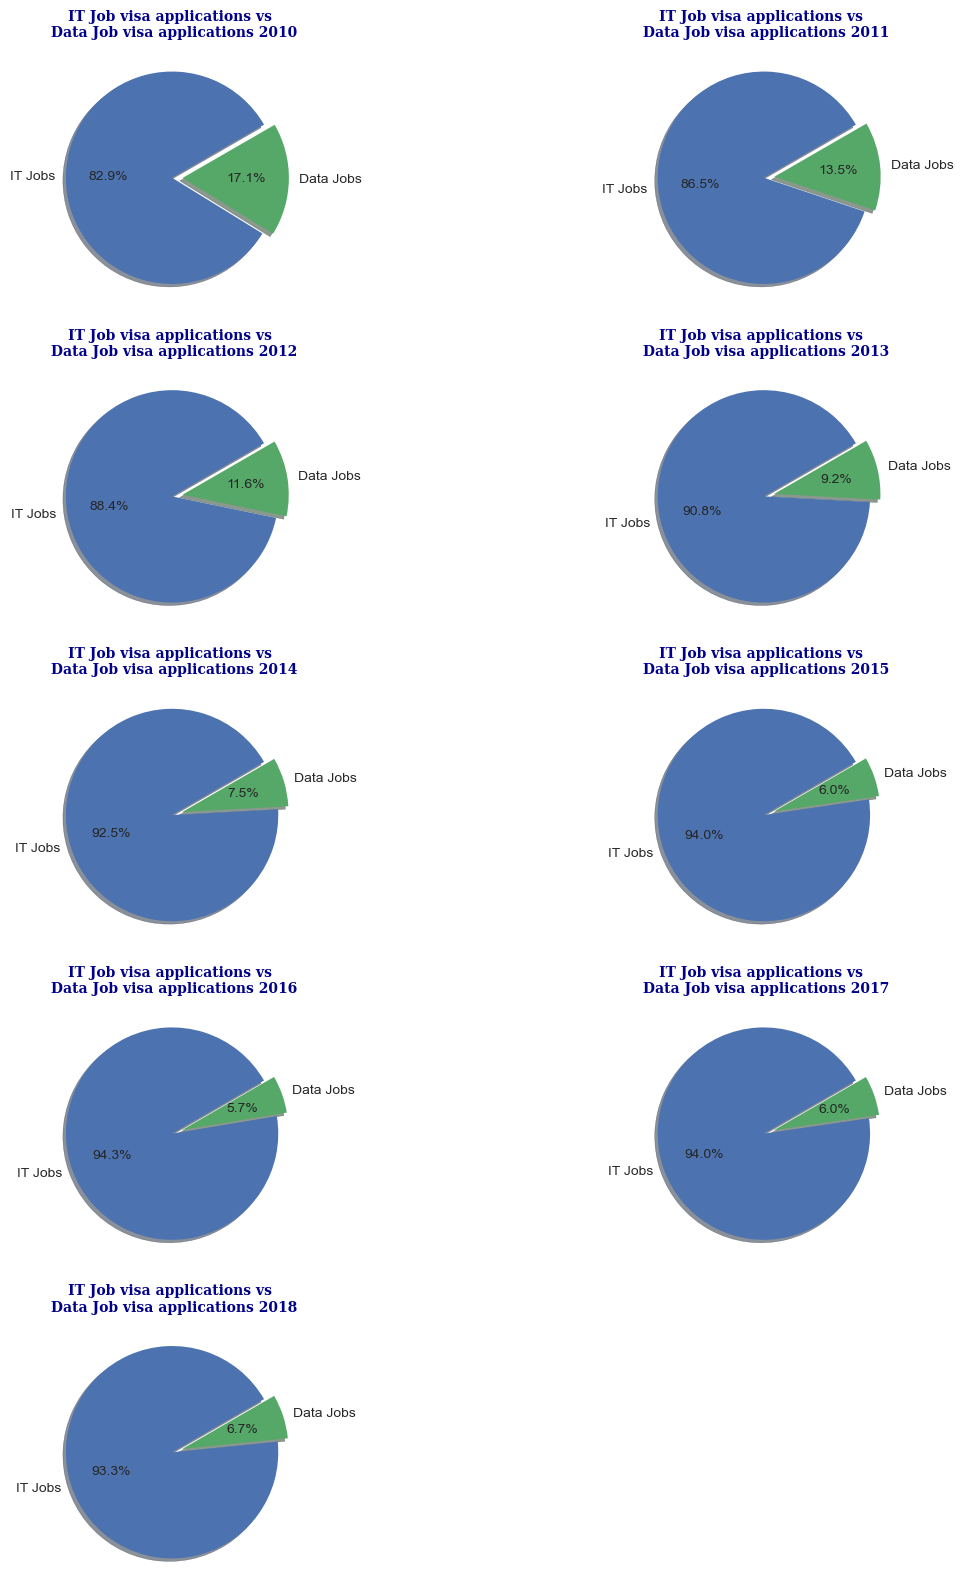

In [113]:
def add_subplot(nrows, ncols, index, year, style):
    mpl.style.use(style)
    explode = (0, 0.1)
    ax = plt.subplot(nrows,ncols,index)
 
    font = {'family': 'serif',
            'color':  'darkblue',
            'weight': 'bold',
            'size': 10}
    
    it_and_data_job_labels = 'IT Jobs', 'Data Jobs'
    
    it_job_v = H1BVisa20102018_Trend_df[(H1BVisa20102018_Trend_df.decision_year ==year) & (H1BVisa20102018_Trend_df.status =='CERTIFIED') 
                         & (H1BVisa20102018_Trend_df.it_job ==1)].groupby('decision_year').case_number.nunique().values

    it_data_job_v = H1BVisa20102018_Trend_df[(H1BVisa20102018_Trend_df.decision_year ==2018) & (H1BVisa20102018_Trend_df.status =='CERTIFIED') 
                         & (H1BVisa20102018_Trend_df.it_data_job ==1)].groupby('decision_year').case_number.nunique().values

    it_and_data_job_l = [it_job_v[0] - it_data_job_v[0], it_data_job_v[0]]
    y = it_and_data_job_l
    
    plt.pie(y, labels = it_and_data_job_labels, autopct='%1.1f%%', explode=explode, shadow=True, startangle=30)
    
    ax.set_title('IT Job visa applications vs \n Data Job visa applications ' + str(year), fontdict = font)

plt.figure(figsize=(14,20))
style ='seaborn'
add_subplot(5, 2, 1,2010, style)
add_subplot(5, 2, 2,2011, style)
add_subplot(5, 2, 3,2012, style)
add_subplot(5, 2, 4,2013, style)
add_subplot(5, 2, 5,2014, style)
add_subplot(5, 2, 6,2015, style)
add_subplot(5, 2, 7,2016, style)
add_subplot(5, 2, 8,2017, style)
add_subplot(5, 2, 9,2018, style)
plt.show()
mpl.rcParams.update(mpl.rcParamsDefault)

# Conclusions
## We could see some general insights and answering some questions

**1. We discovered the top employers that submit most of the H-1B visa applications**
<br>
**2. This was not a surprise that most of the H-1B visa applications correspond to IT jobs throughout the years (Top 10)**
<br>
**3. As expected, California and New York are in the top 10 H-1B visa application submissions throughout the years**
<br>
**4. It looks like that maybe the change of the US government administration impacted in the approvals of H-1B visa applications**
<br>
**5. We could find out that under the same case number can be associated with several workers with different Job positions**
<br>
**There are other questions to be answered, more detail information is needed and  patterns to be discovered**
<br>
**The final objective of this project is to do the whole Data Scient project cycle, finishing with machine learning with a classification algorithm to determine if a visa is going to be approved or not.**